# **Analysis report   Automatic Version**

## Imports

In [1]:
%load_ext autoreload
%autoreload 3
%run "Functions/general_setup.py"
%reload_ext autoreload

from Functions.general_setup import *
warnings.filterwarnings("ignore")
warnings.OUTDATED_IGNORE=1

c:\Users\baks_\.conda\envs\Baks\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


## Parameters

#### Data files

In [2]:
#Data files
Data_url = '' # Use a url or empty str ('')
Data_file = './Data/Parameter_evaluation_example.xlsx' # Use a file path or empty str ('')
data_to_pull = "Accuracy_w_rep" #Name of the sheet. if data is CSV this parameter is only use for folder creation purposes

#Norm files
Limits_url = '' # Use a url or empty str ('')
Limits_file = './Data/limits_parameter_example.xlsx' # Use a file path or empty str ('')
Limits_data_to_pull = 'Limit_parameters_test1' #Name of the sheet

#### Evaluation parameters

In [3]:
#Evaluation parameters 
Folder_1 = 'Test_validation' # Must have a str value
Folder_2 = '' # str value to create a sub folder or empty str ('')
Title_1 = 'Test_1' # Must have a str value
Title_2 = '' # str value to create a sub fold or empty str ('')
Date = str(date.today())
alpha = 0.05 #p-value alfa
CI = 95  #Confidence interval

#### Evaluation folder

In [4]:
#Evaluation Folder
fold = folder_creator(Folder_1, Folder_2, Title_1, Title_2, Date)

Results/Test_validation/Test_1/Test_1-2023-02-20


## Variables to analize

In [12]:
#Variables selection. Name the columns that have the variables data. 
list_variables = ['Parameter_1', 'Parameter_2','Parameter_3', 'Parameter_4',
                    'Parameter_5', 'Parameter_6','Parameter_7']


## Acceptance and rejection thresholds

In [13]:
#Simplify introduce standard dataframe 
df_limits = import_data(Spreadsheet_id=Limits_url, File_id=Limits_file, 
                        data_to_pull=Limits_data_to_pull)
df_limits

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Category         7 non-null      object 
 1   Limit_base       7 non-null      float64
 2   Limit_tolerance  7 non-null      float64
dtypes: float64(2), object(1)
memory usage: 296.0+ bytes
None


Category  Limit_base  Limit_tolerance
0  Parameter_1        85.0             80.0
1  Parameter_2         0.0              4.0
2  Parameter_3         0.5              1.0
3  Parameter_4         0.5              1.5
4  Parameter_5         0.0              0.5
5  Parameter_6         1.5              4.0
6  Parameter_7         0.0              0.0

# Analytics Report v4

## Repetibility, Accuracy, Accuracy with repetition, Methodological comparisons

Use this notebook in case of analysis or validations pre-establish. The option for each analysis or graph are preset inside the dictionary script.  
This notebook will analyze only the columns that are name inside the list 'list_variables' the rest of columns will be ignore or use for clasification or filter 

### Data

In [14]:
#Import raw data
df = import_data(Spreadsheet_id=Data_url, File_id=Data_file, data_to_pull=data_to_pull)
df.sample(n=5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Methodology  45 non-null     object 
 1   id           45 non-null     int64  
 2   Sample       45 non-null     int64  
 3   Rep          45 non-null     int64  
 4   Parameter_1  45 non-null     int64  
 5   Parameter_2  45 non-null     float64
 6   Parameter_3  45 non-null     float64
 7   Parameter_4  45 non-null     float64
 8   Parameter_5  45 non-null     float64
 9   Parameter_6  45 non-null     float64
 10  Parameter_7  45 non-null     int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 4.0+ KB
None


Methodology  id  Sample  Rep  Parameter_1  Parameter_2  Parameter_3  \
14    R_Method  15       5    3           87         13.5         18.6   
32    Method_2   3       1    3           83         71.6         32.4   
24    Method_1  10       4    1           87         10.1         82.7   
5     R_Method   6       2    3           76         32.6         41.1   
44    Method_2  15       5    3           82         90.8         50.1   

    Parameter_4  Parameter_5  Parameter_6  Parameter_7  
14         37.4         87.8         82.7           36  
32         42.3         20.6          2.1           48  
24          6.6          5.0         30.6           56  
5          32.1          2.2         65.0           45  
44         85.0         65.4         76.9           66

#### Data Check

In [15]:
eh.clasification_columns_check(dataframe=df, data_to_pull=data_to_pull)

Classification columns: []. Not found inside the columns of the dataframe.


In [16]:
df = eh.check_variable_columns(dataframe=df, data_to_pull=data_to_pull, 
                                variables=list_variables, drop=False)
df.head()

Methodology  id  Sample  Rep  Parameter_1  Parameter_2  Parameter_3  \
0    R_Method   1       1    1           71         73.4         48.2   
1    R_Method   2       1    2           90         96.1         16.6   
2    R_Method   3       1    3           81         11.5         35.5   
3    R_Method   4       2    1           88          6.1         25.7   
4    R_Method   5       2    2           90         21.3         76.2   

   Parameter_4  Parameter_5  Parameter_6  Parameter_7  
0          7.1         65.4         94.0           51  
1         59.7         85.7         39.5           93  
2         55.9         14.7         13.2           82  
3         68.5         97.5          1.1           89  
4         47.3         96.1         85.1           84

In [17]:
ds.balanced_dataset(data=df, classifier='Methodology')

No duplicated rows. Data is OK
Dataset is balanced


#### Data distribution

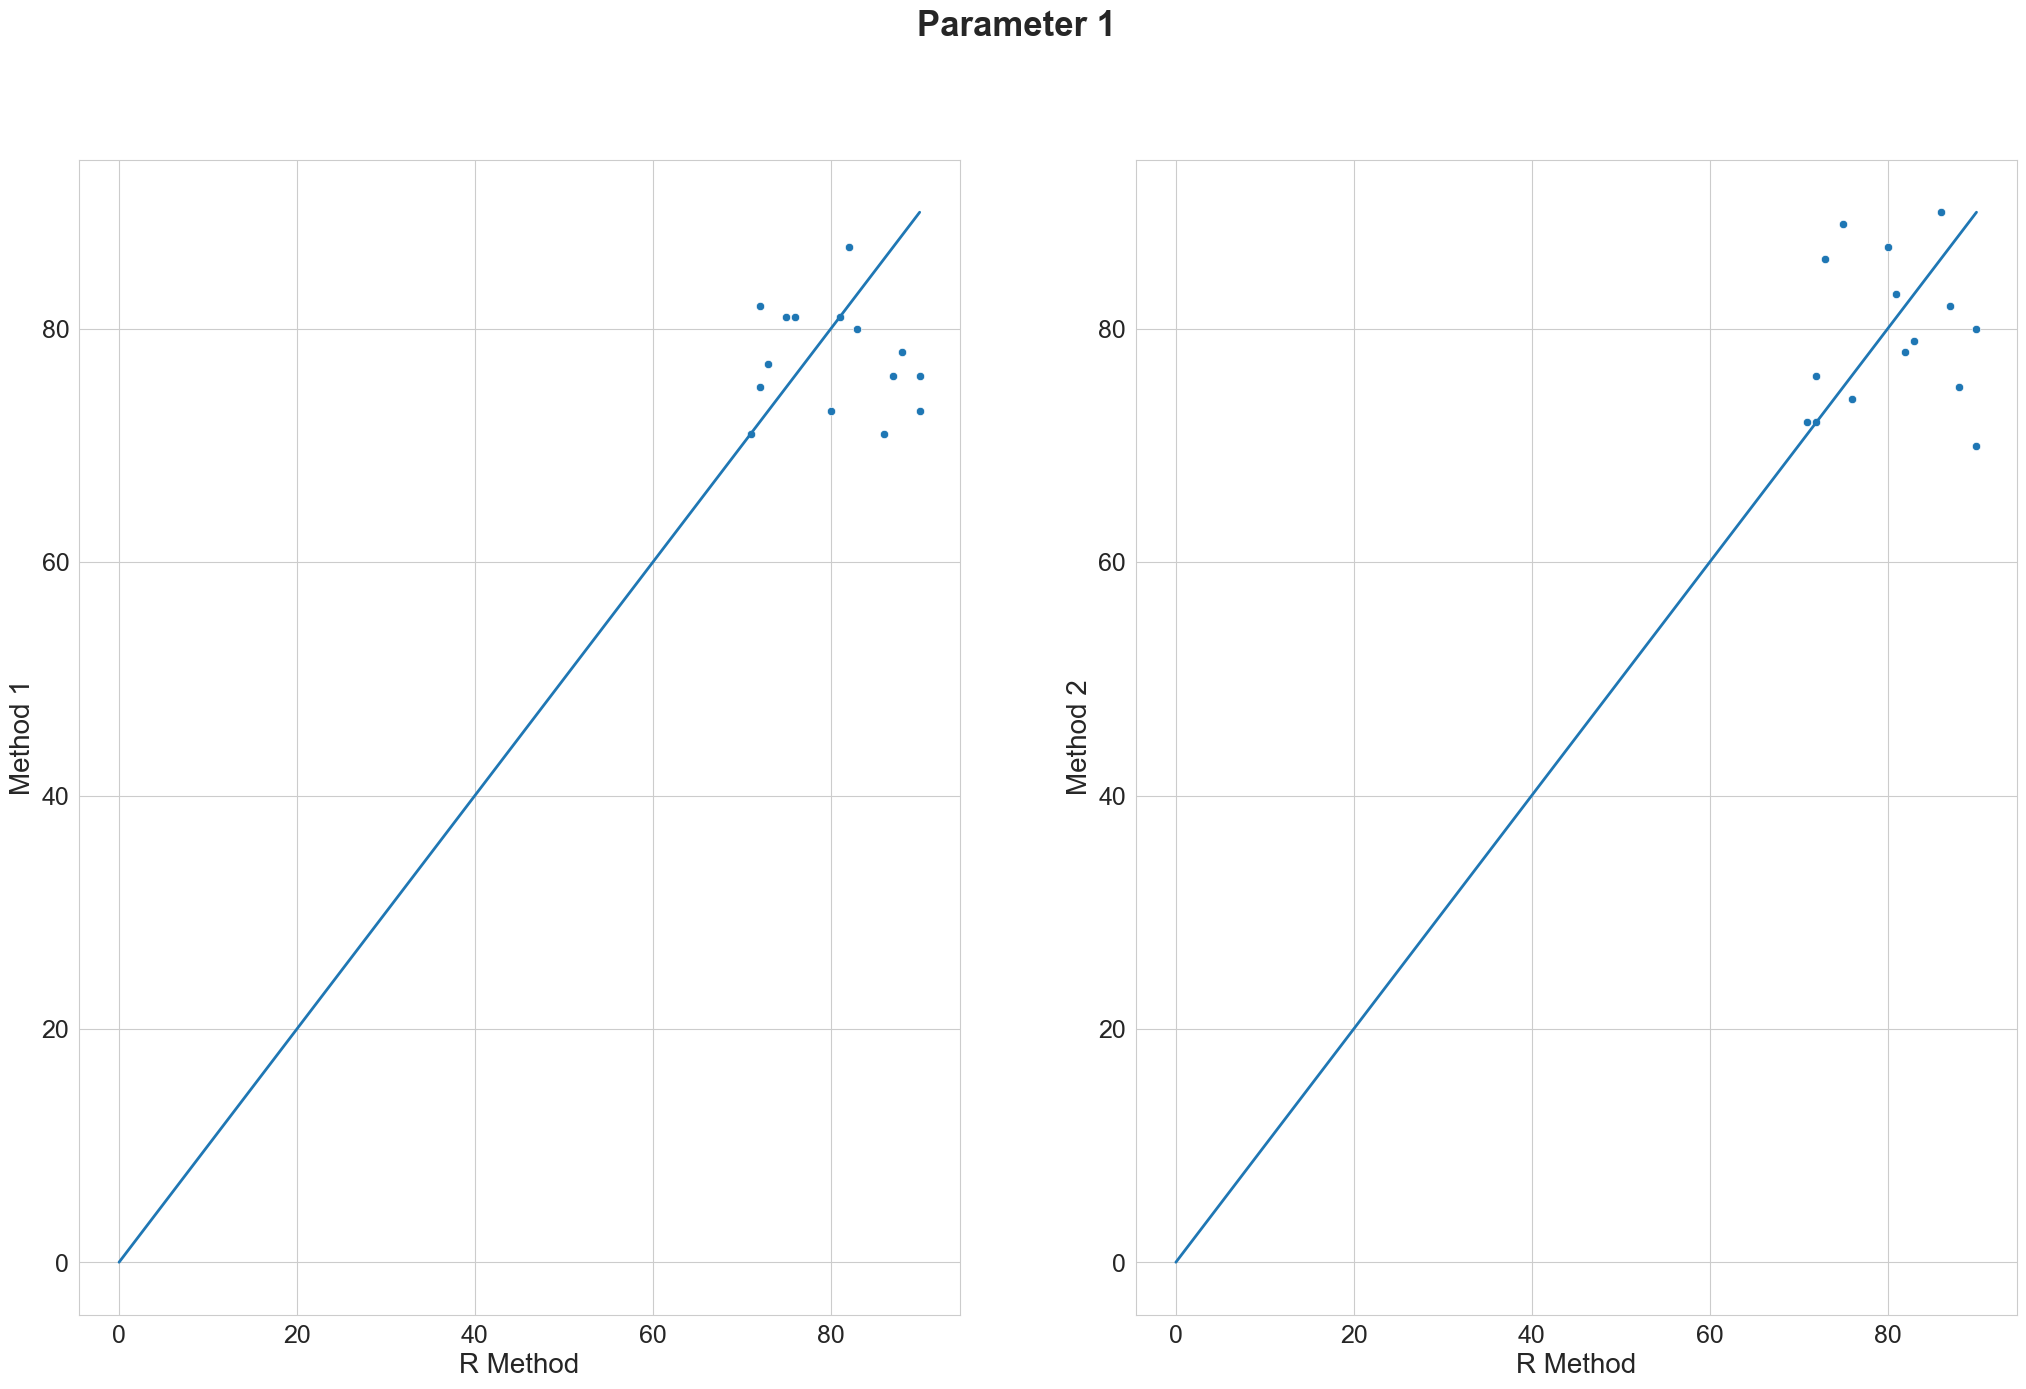

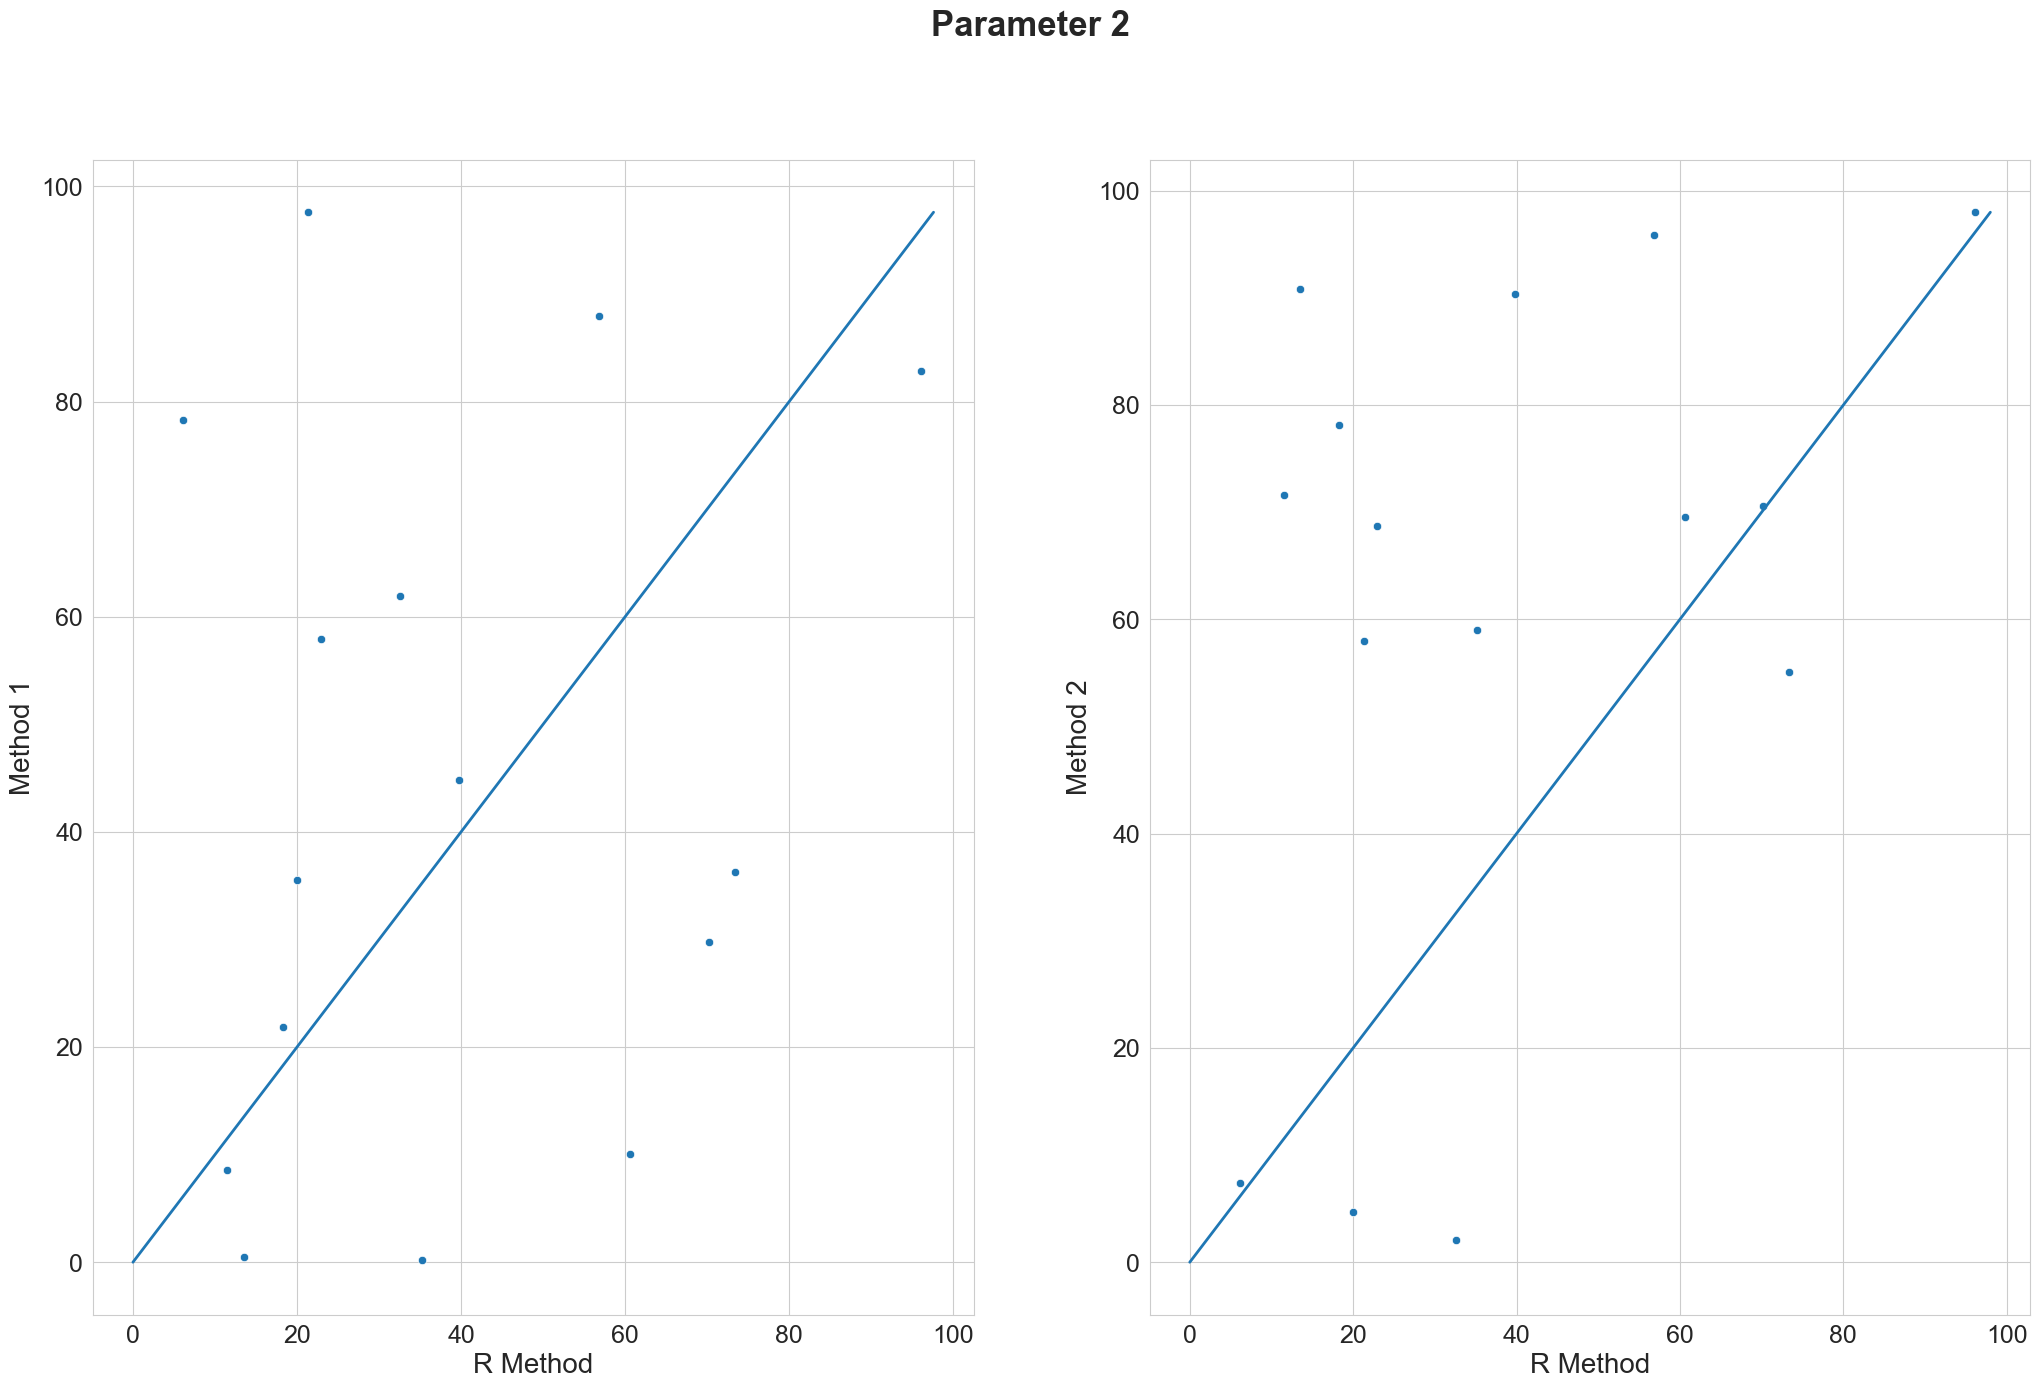

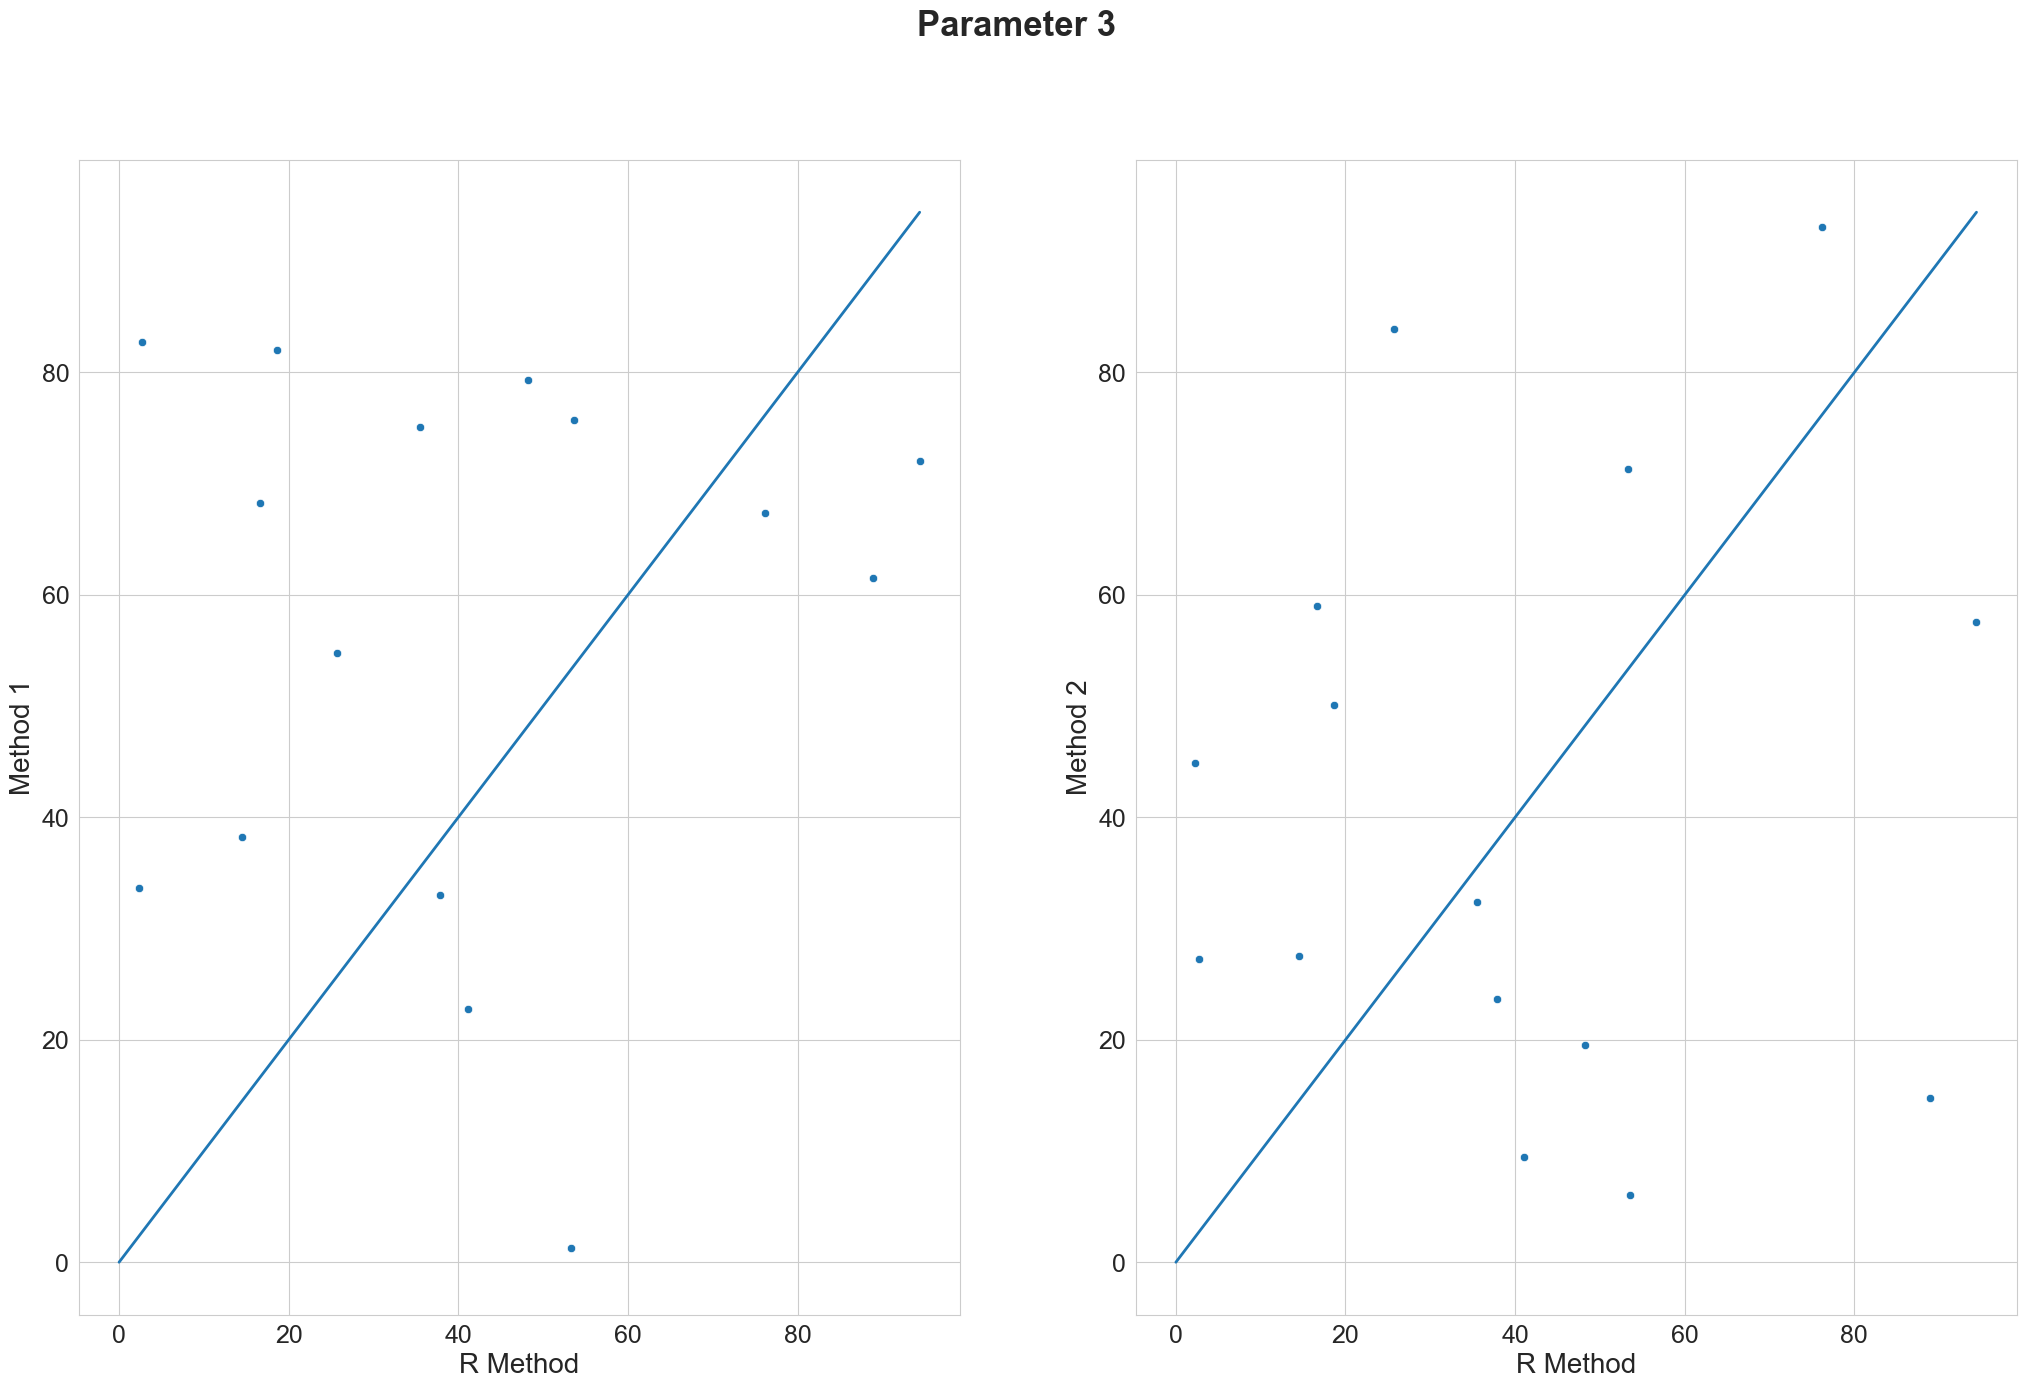

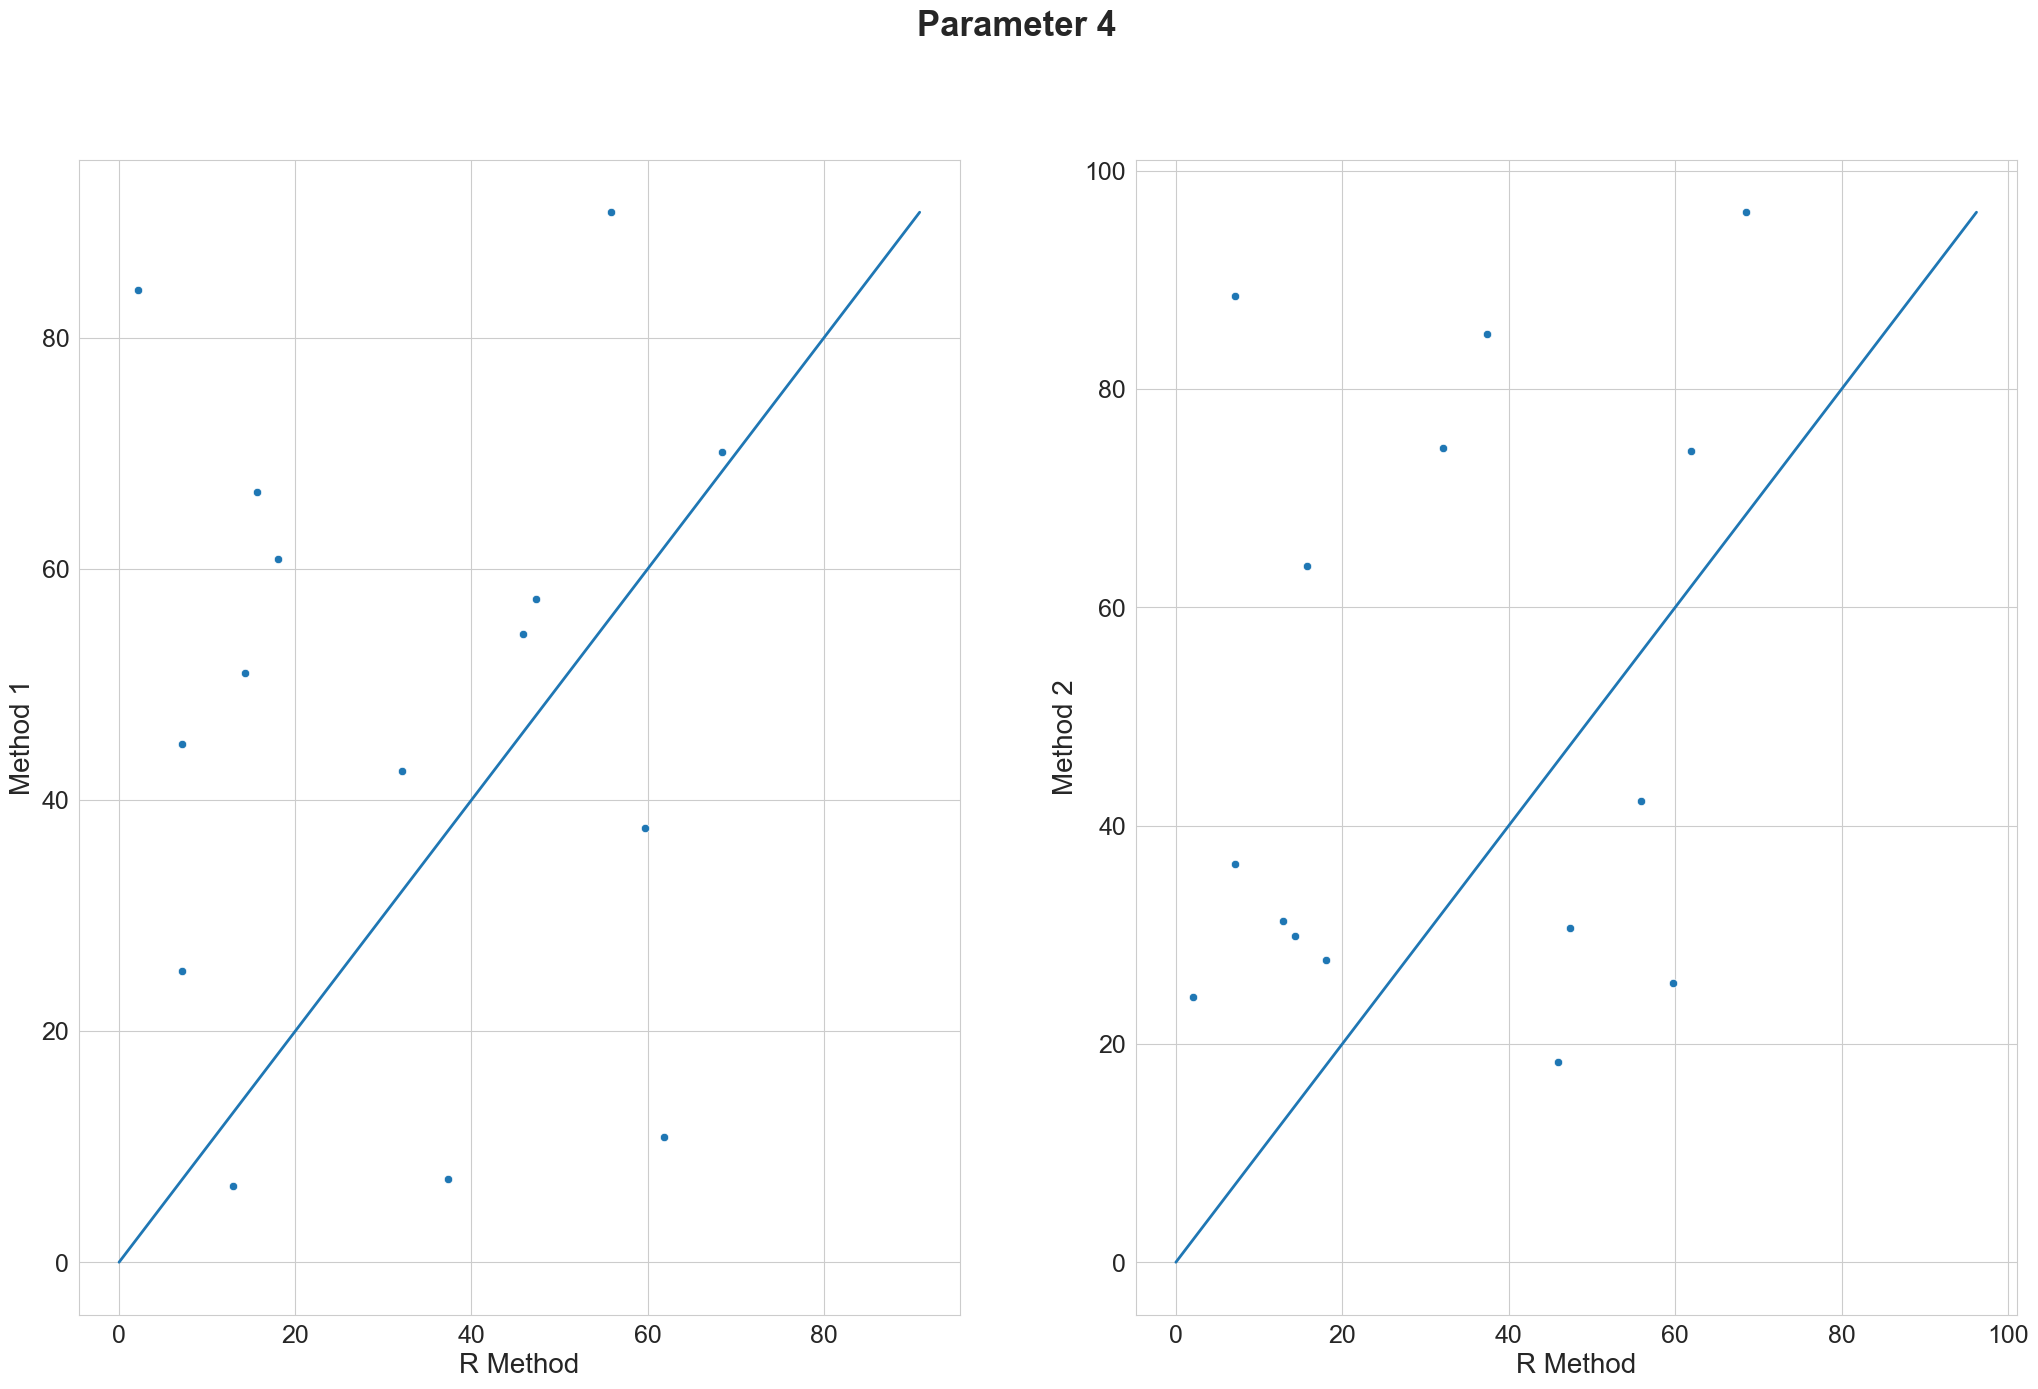

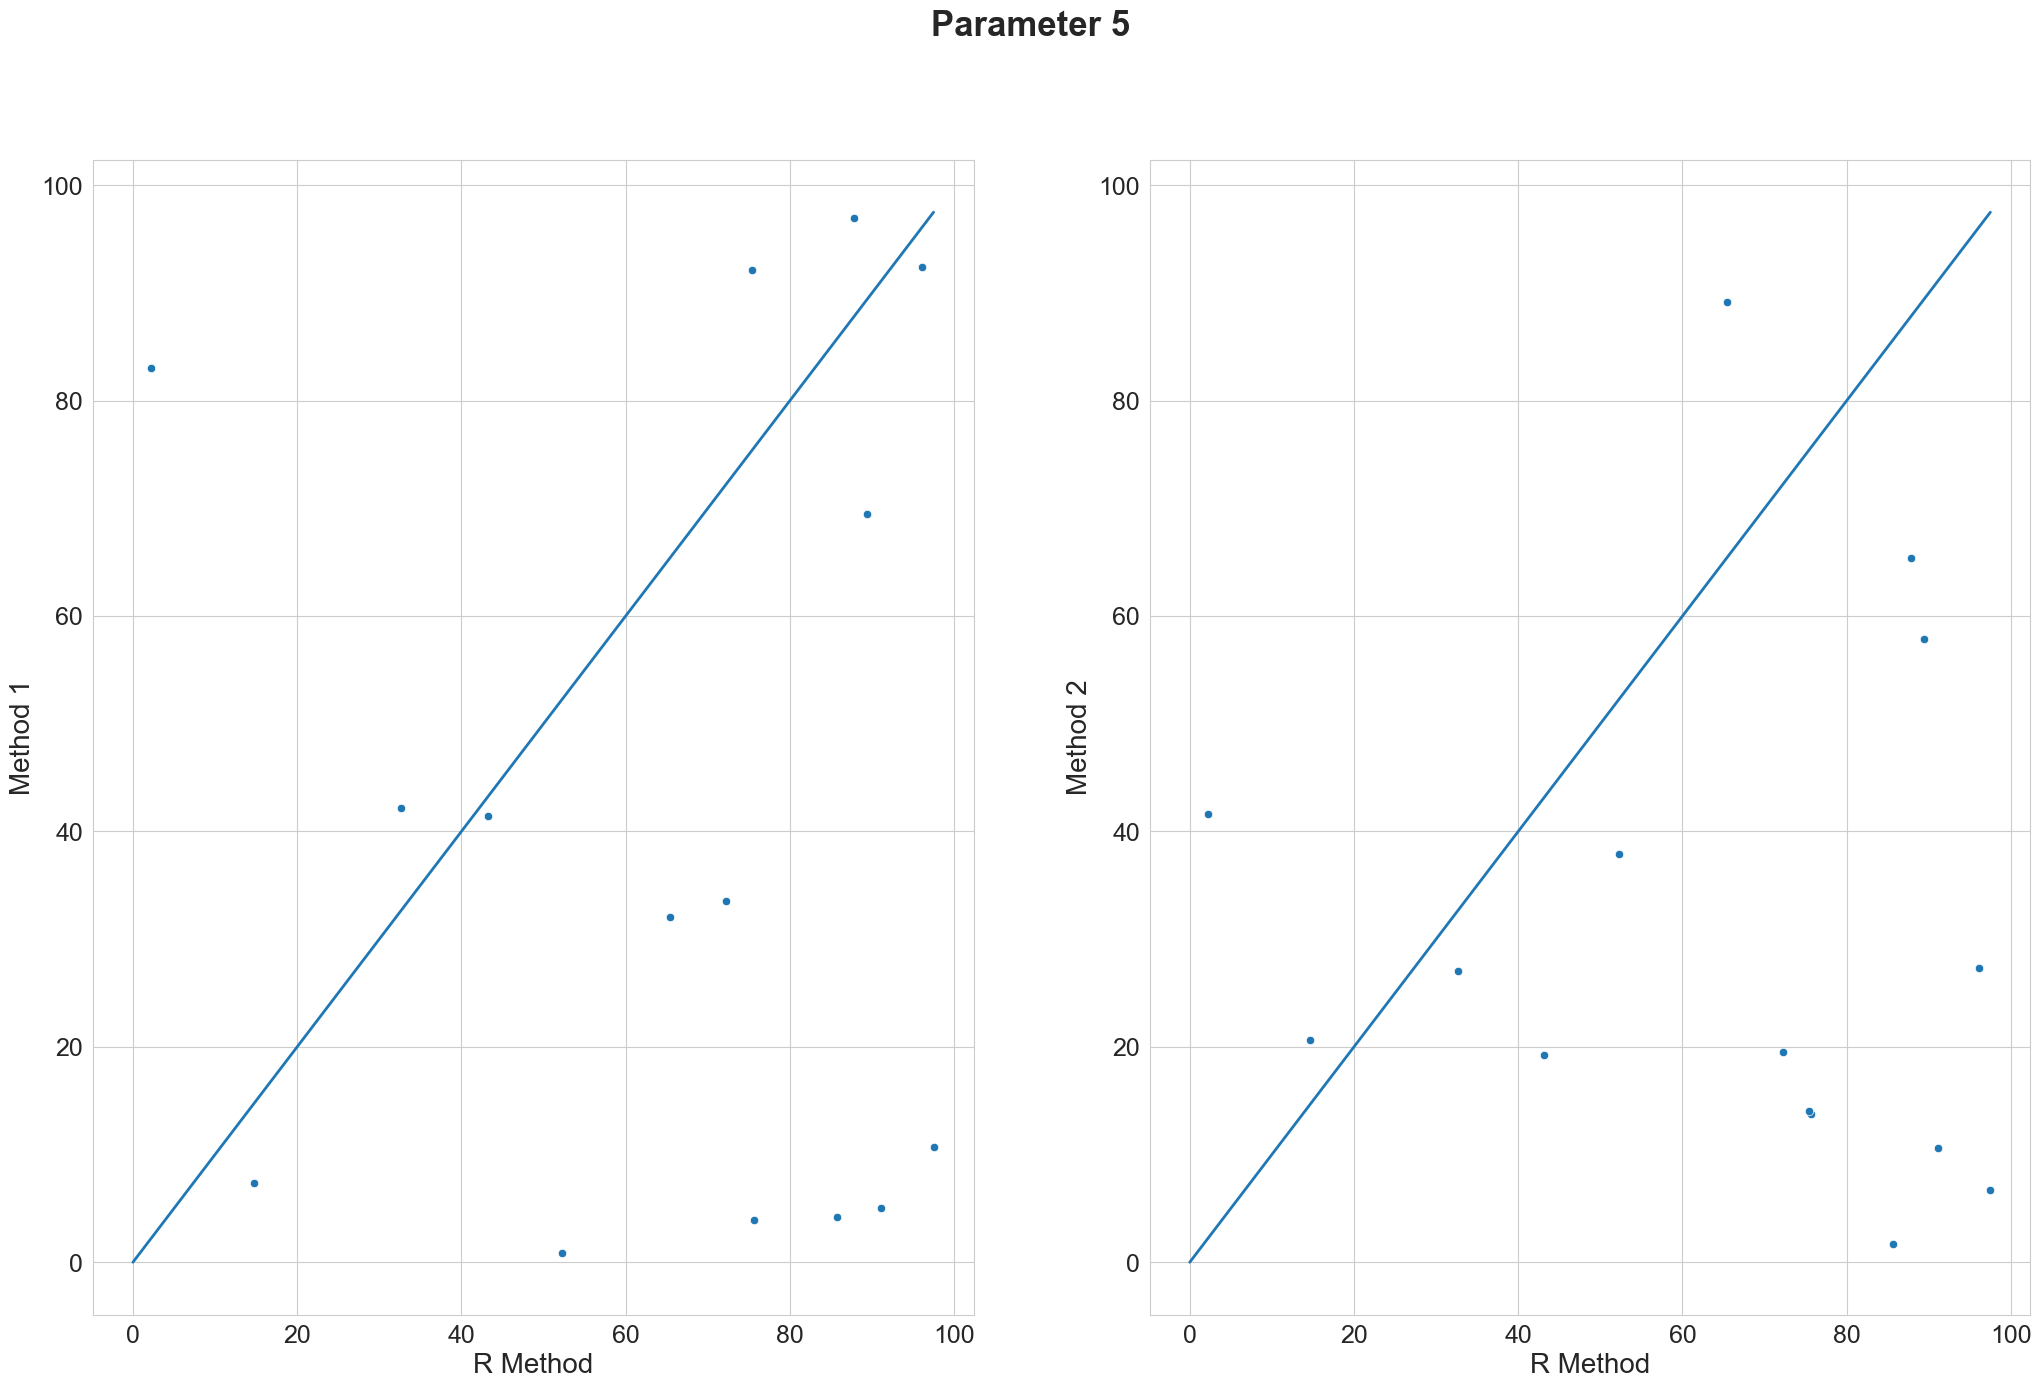

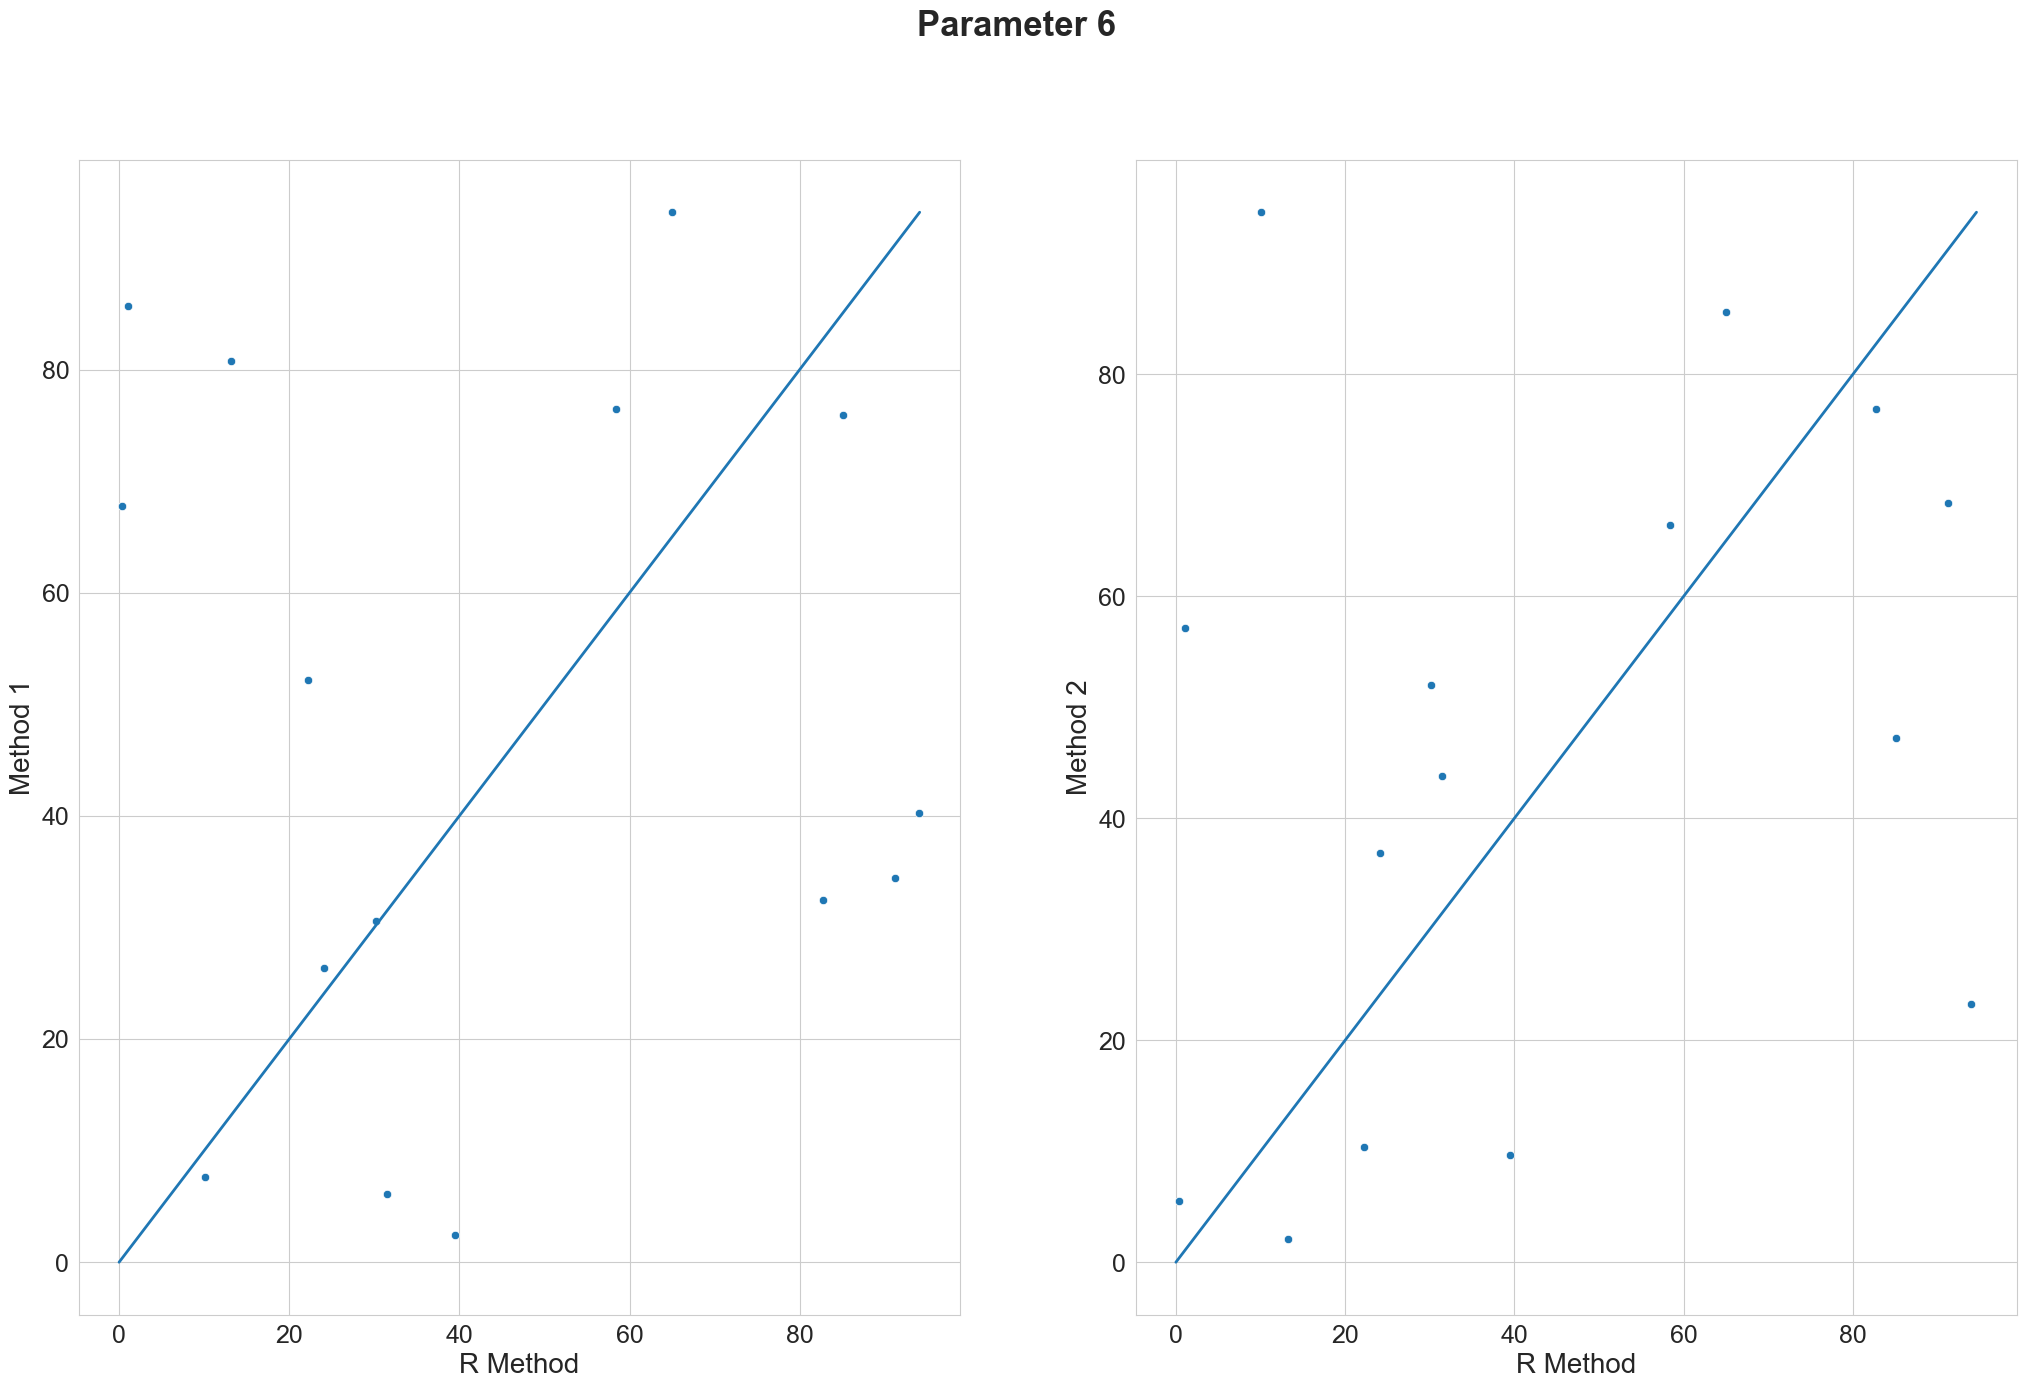

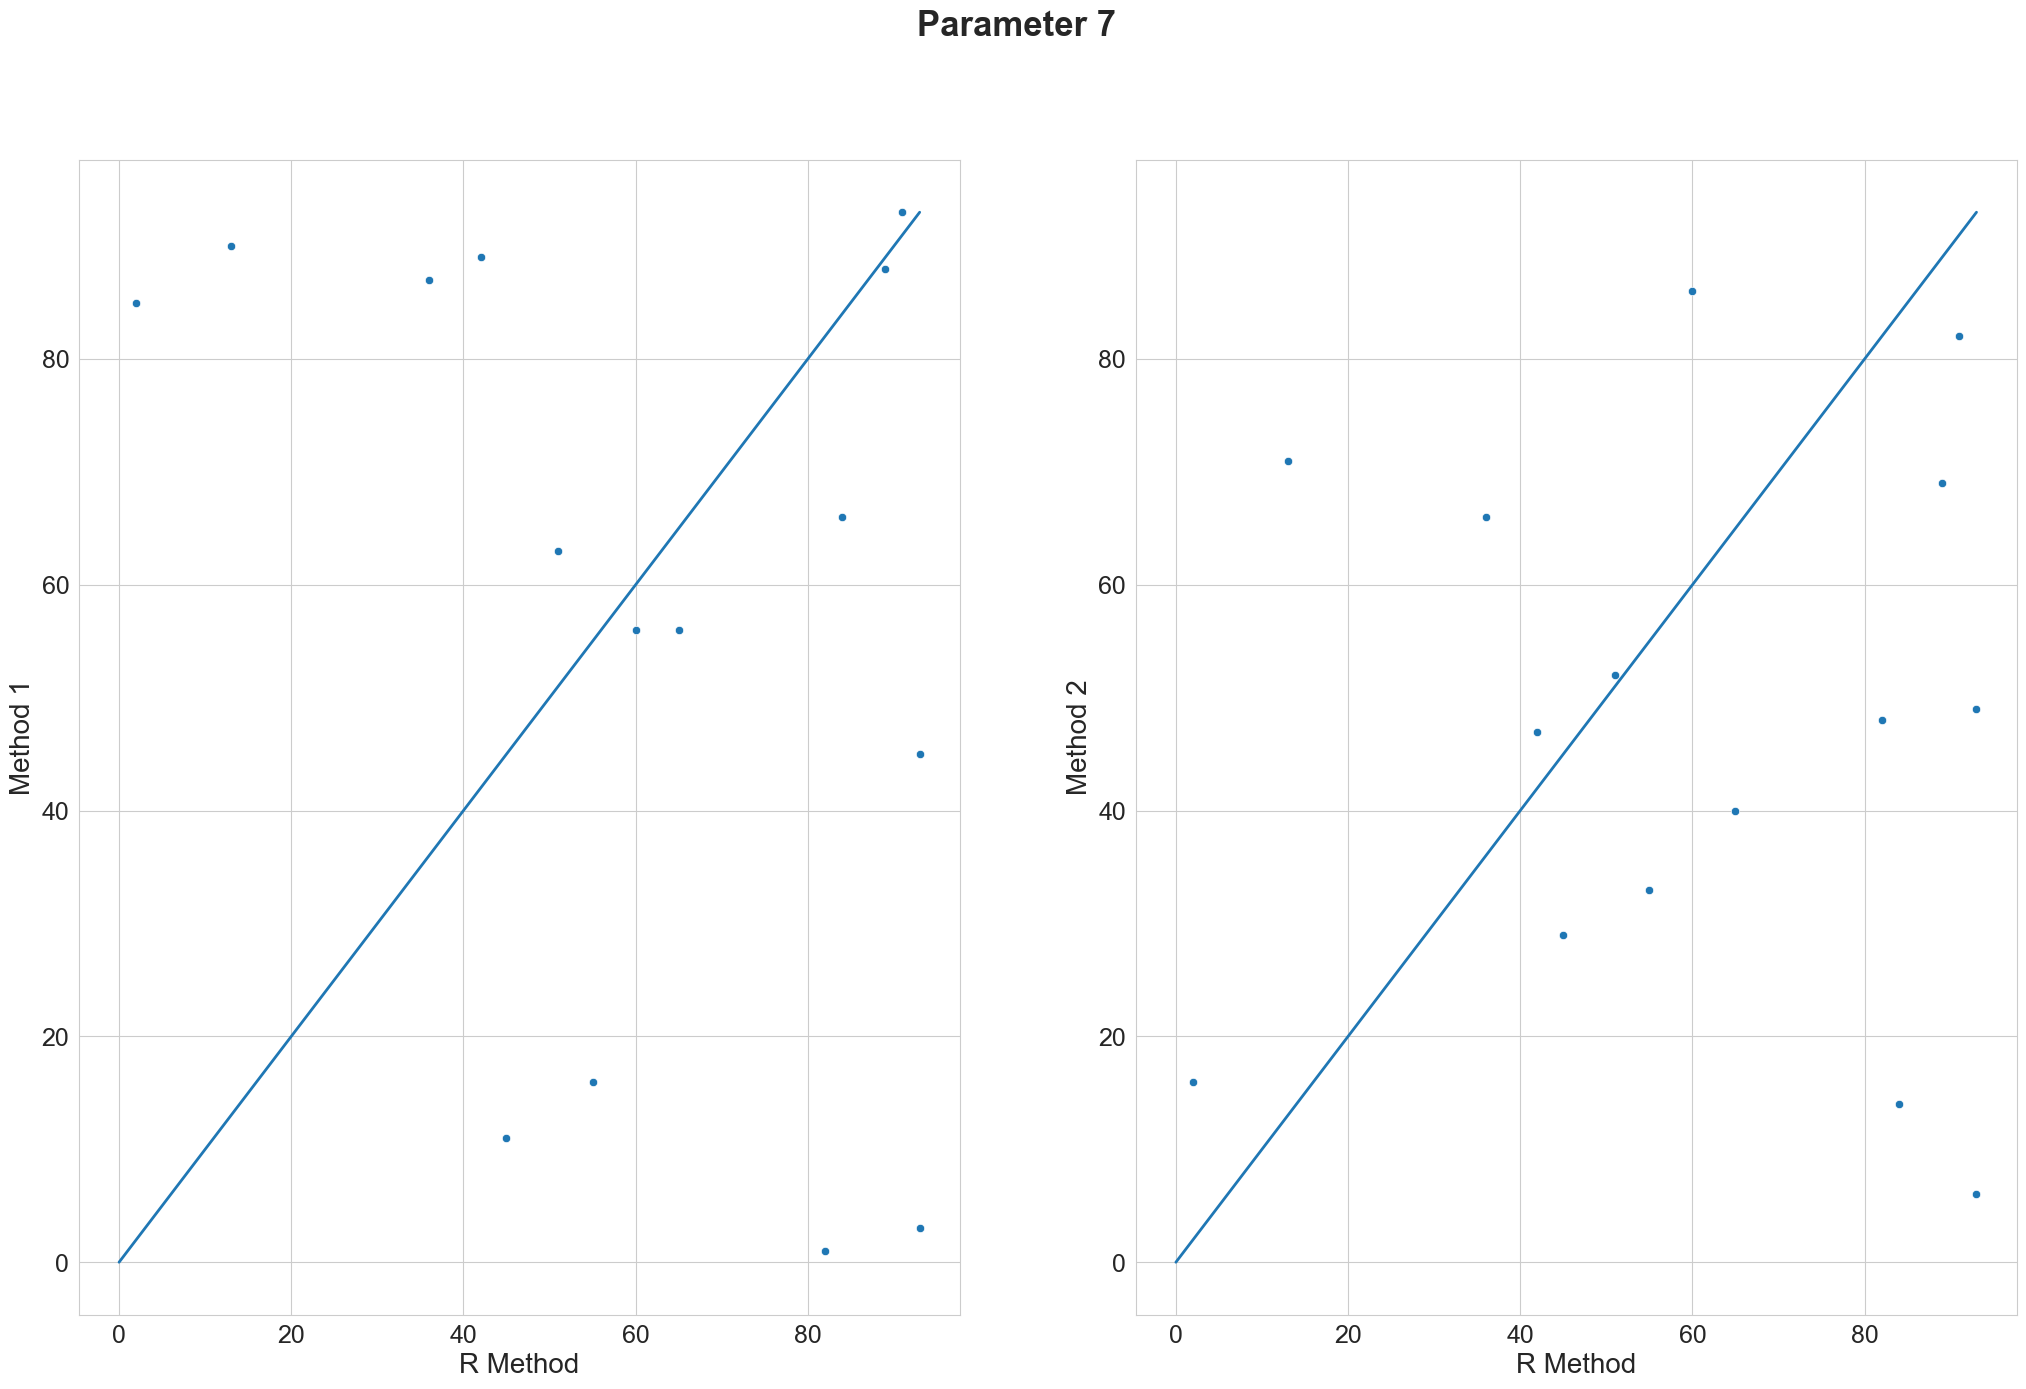

In [23]:
# use '' in include_comp for individual plot. otherwise identife there the variable method 
# that you wanna use a referenced method (R_Method)
dsg.qq_plot_report(data=df, classificators='Methodology', categories=list_variables, 
                include_comp='R_Method', hue=None, include=None, exclude=None,  
                save=True, folder=f'{fold}/{data_to_pull}/qq_plot')

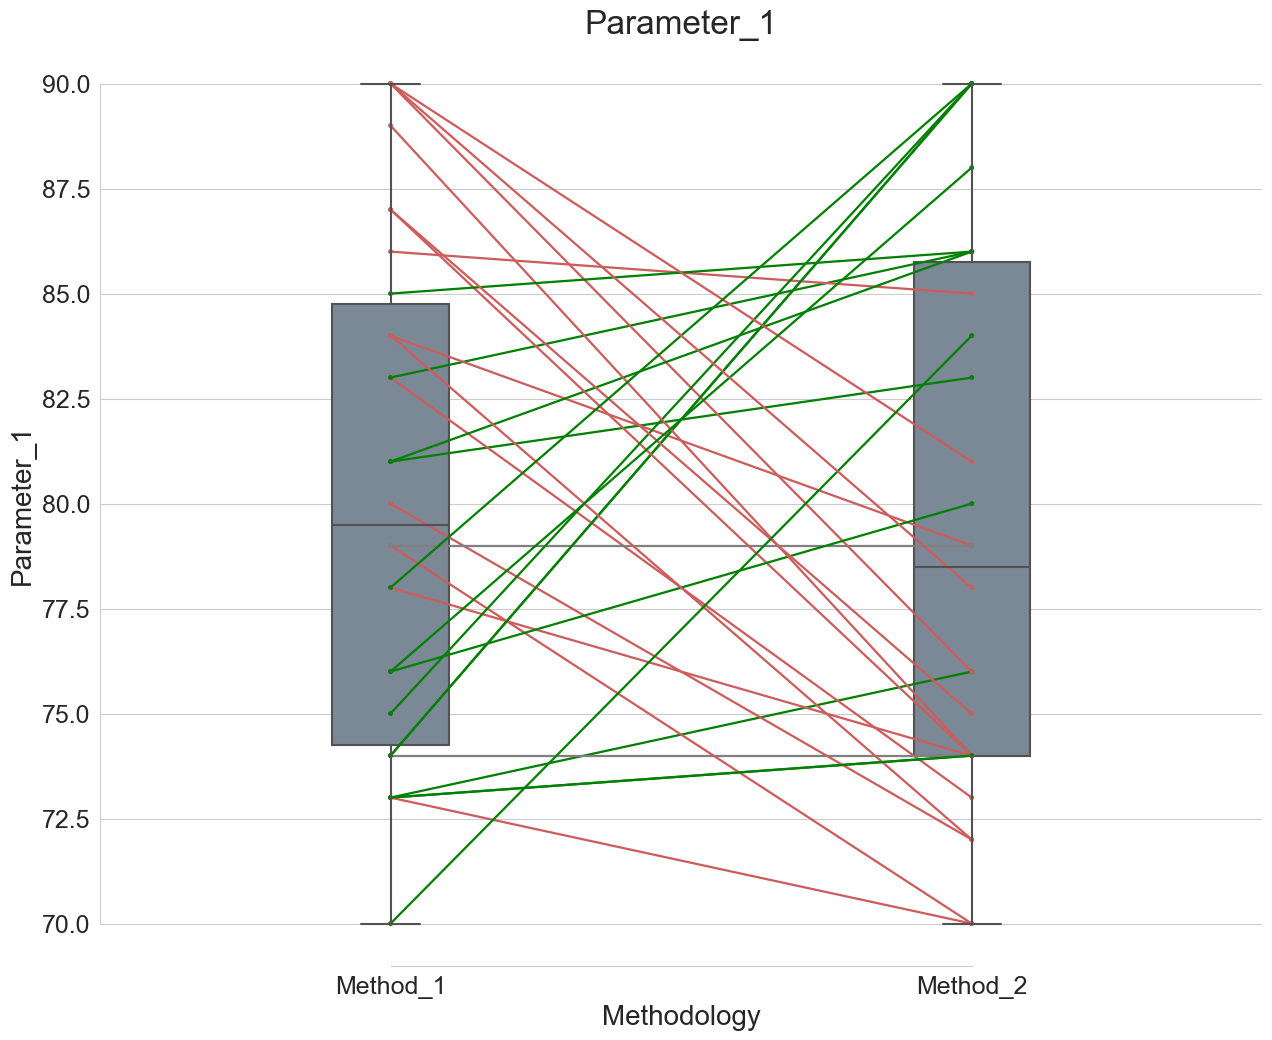

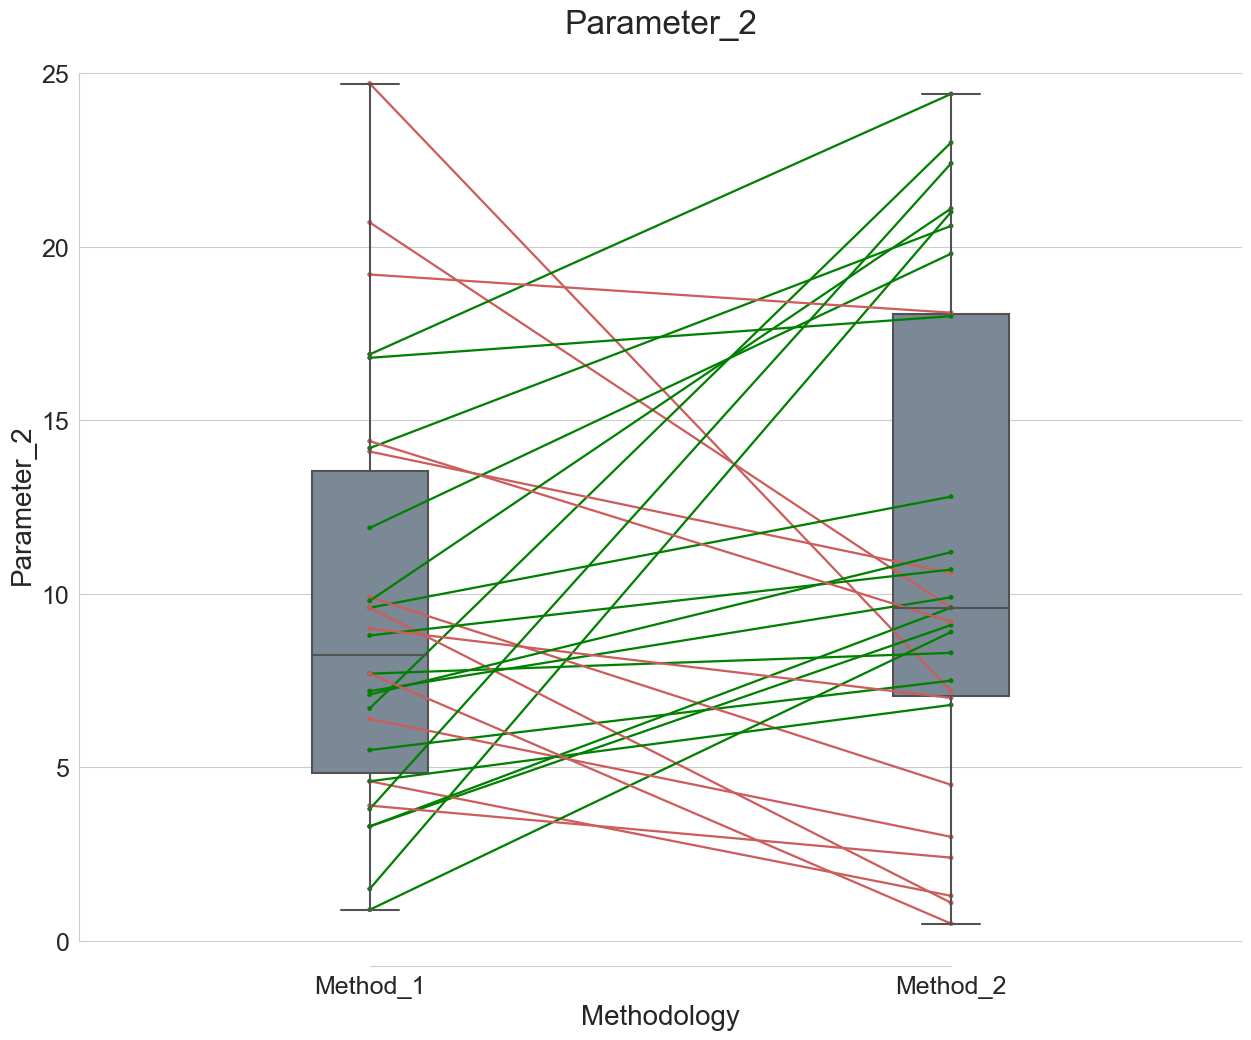

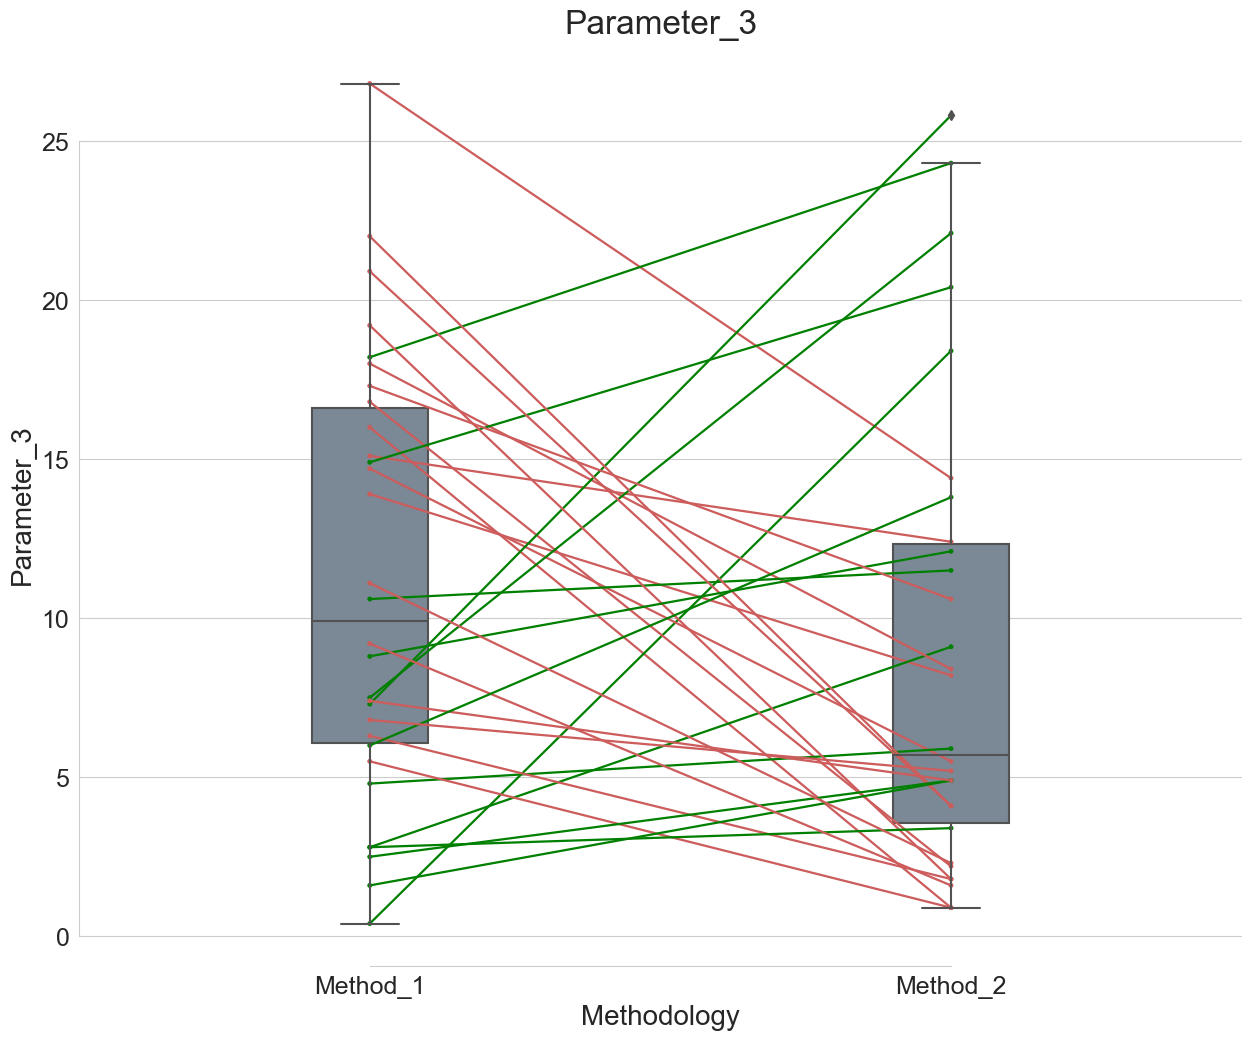

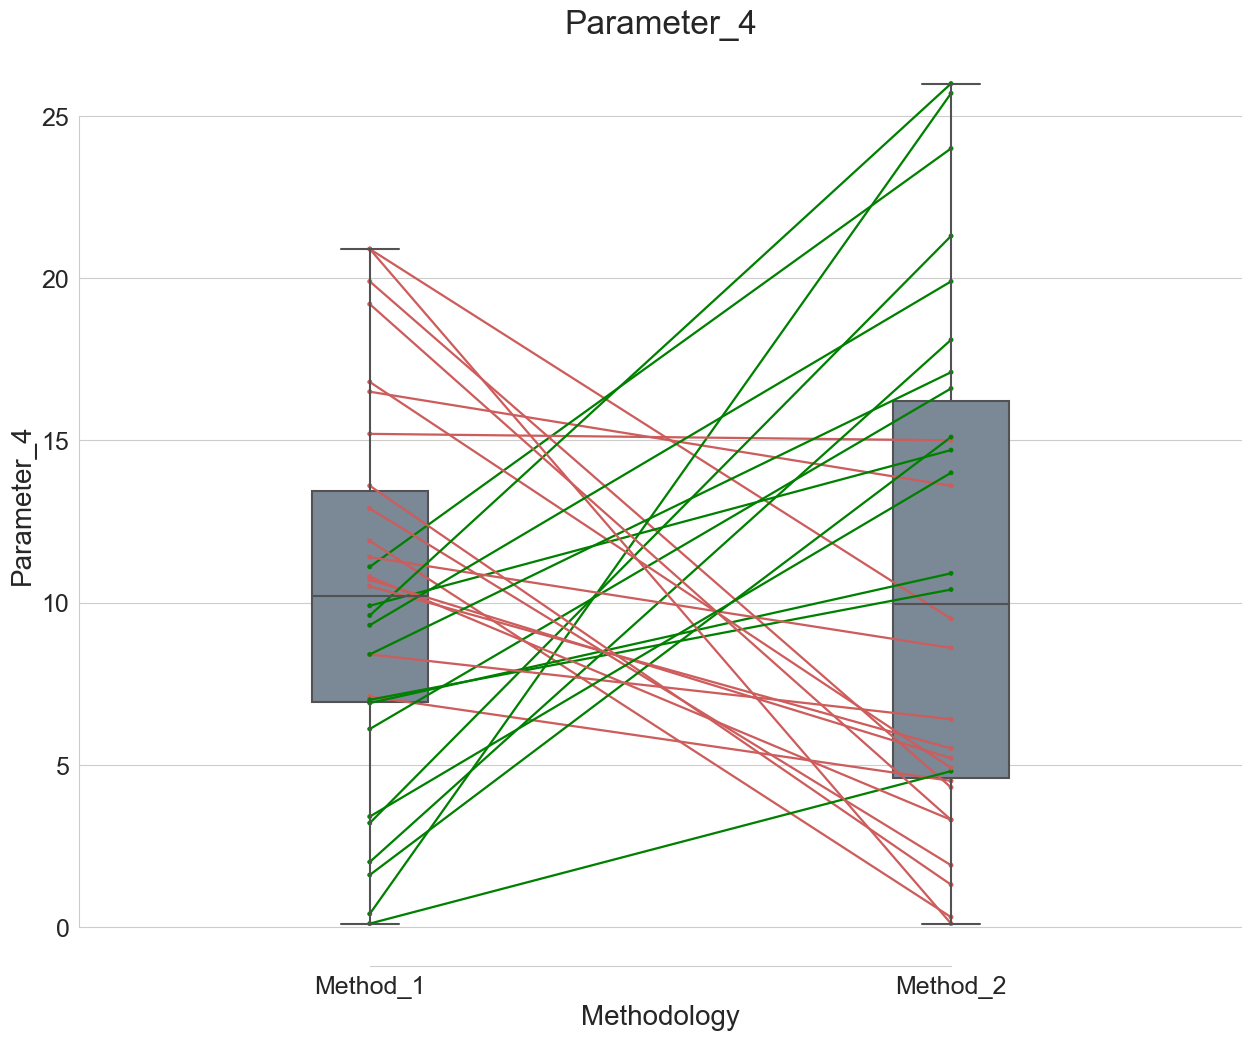

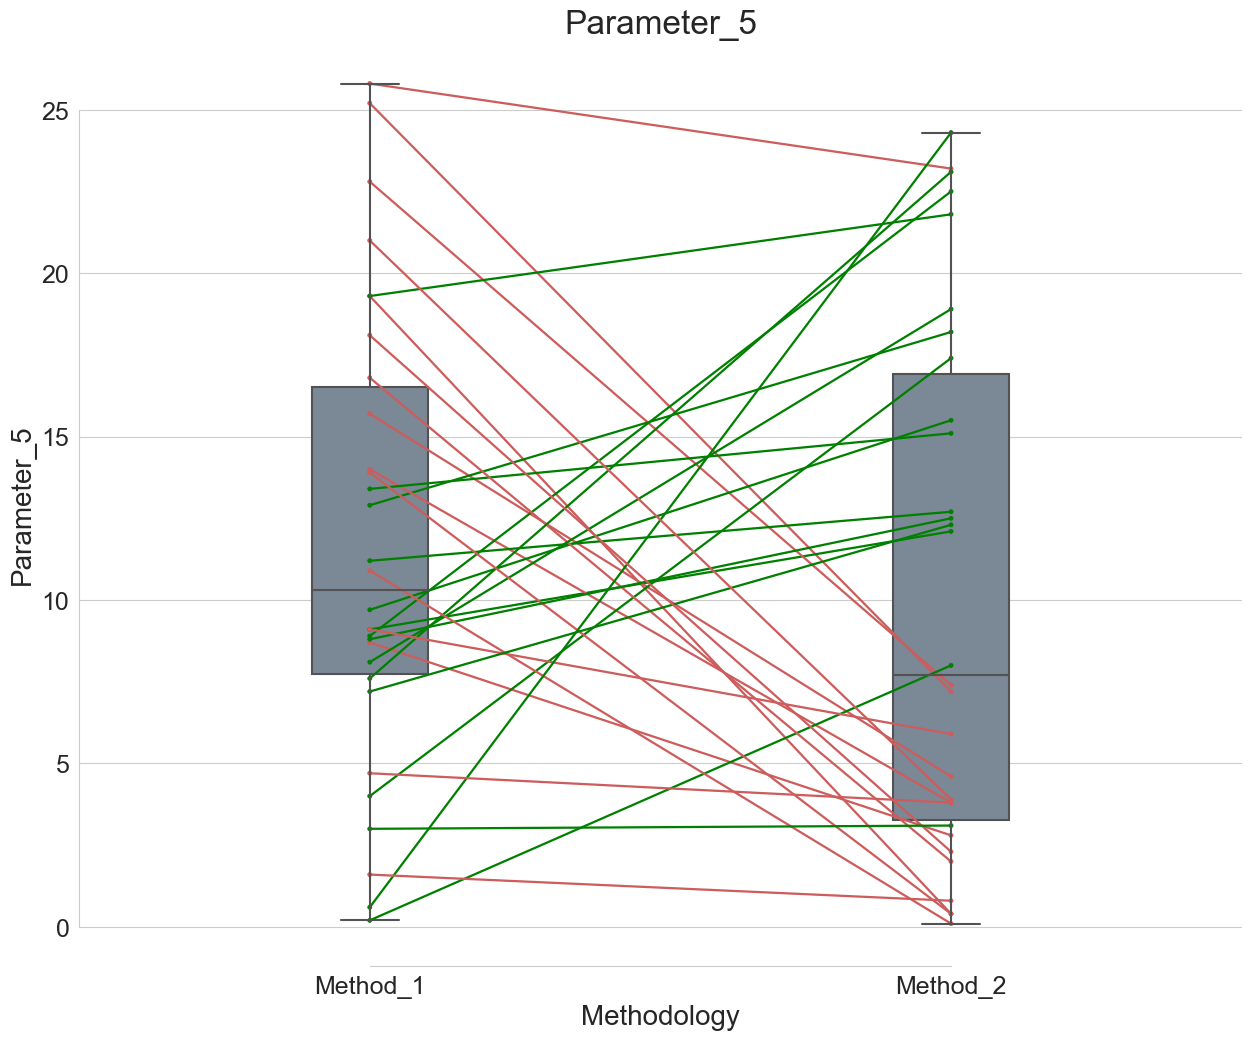

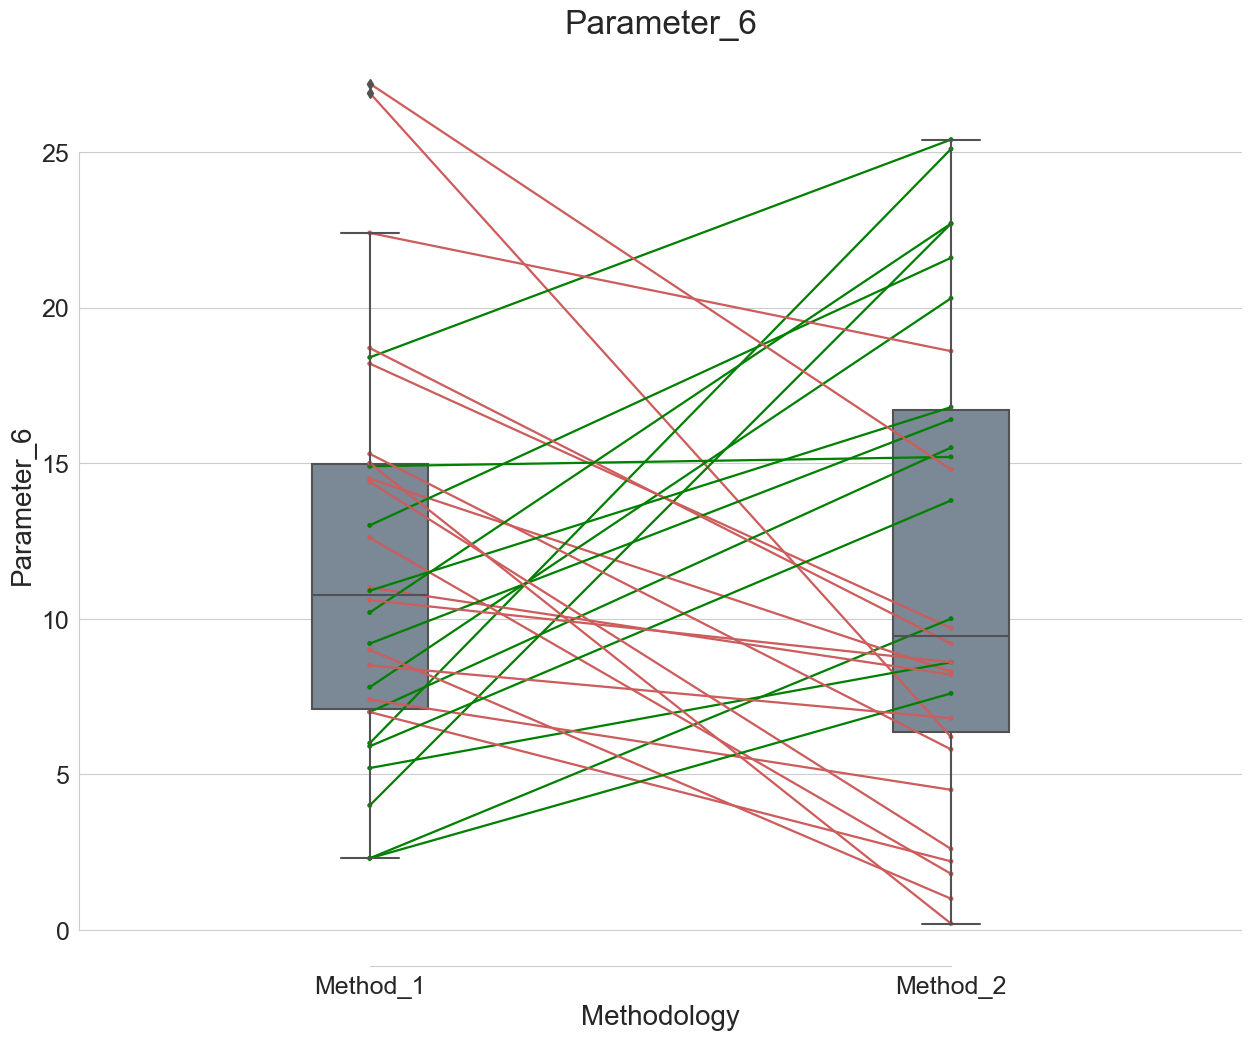

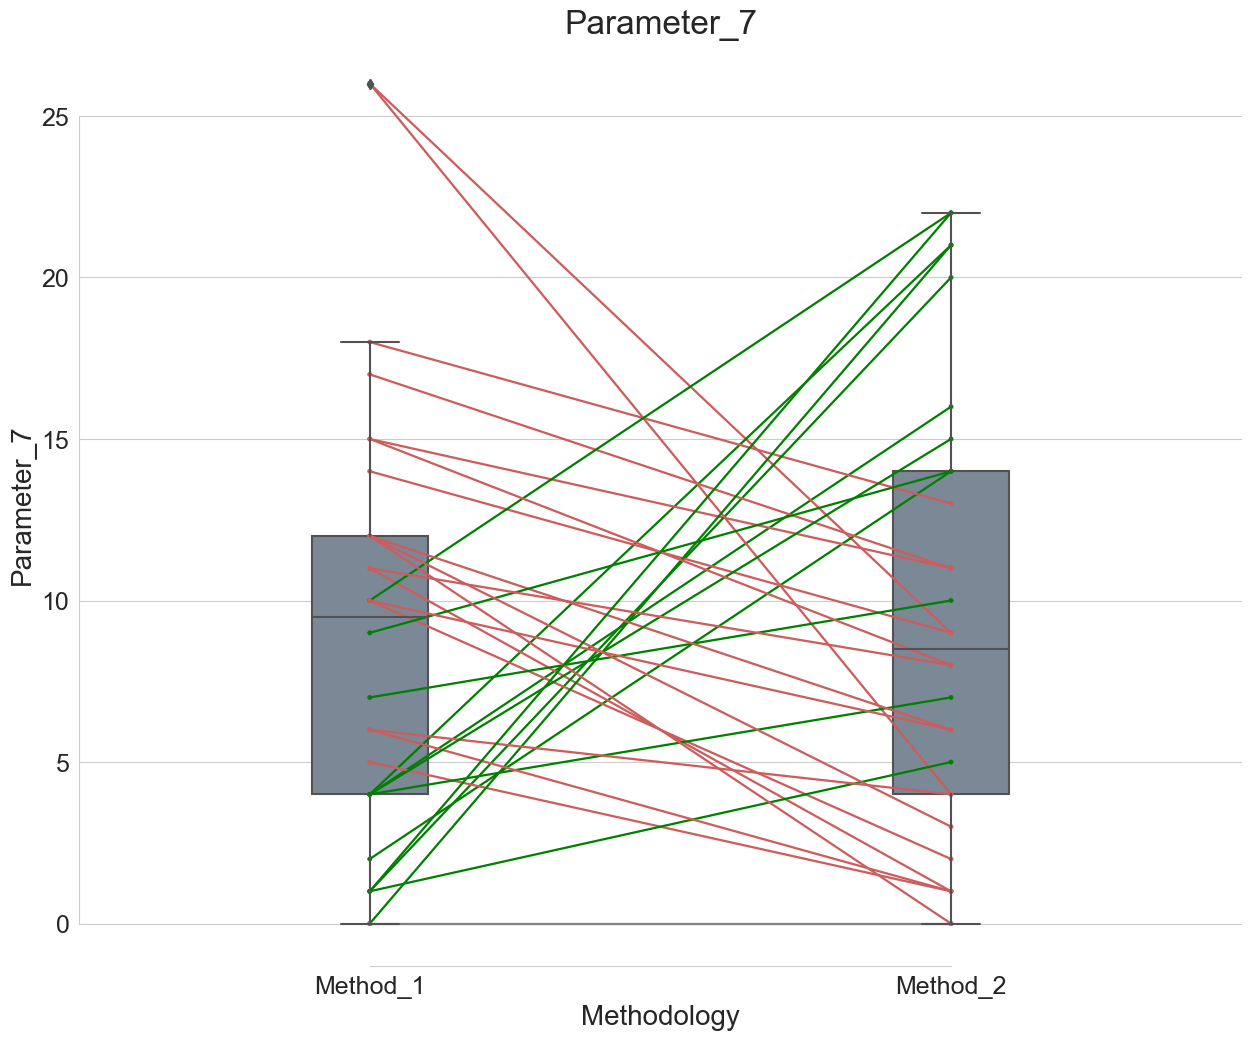

In [12]:
#Pair plot
dsg.pair_plot(data=df, x='Methodology', cat=list_variables, pair=ad.plot_pair[data_to_pull],
                save=True, folder=f'{fold}/{data_to_pull}/pair_plot')

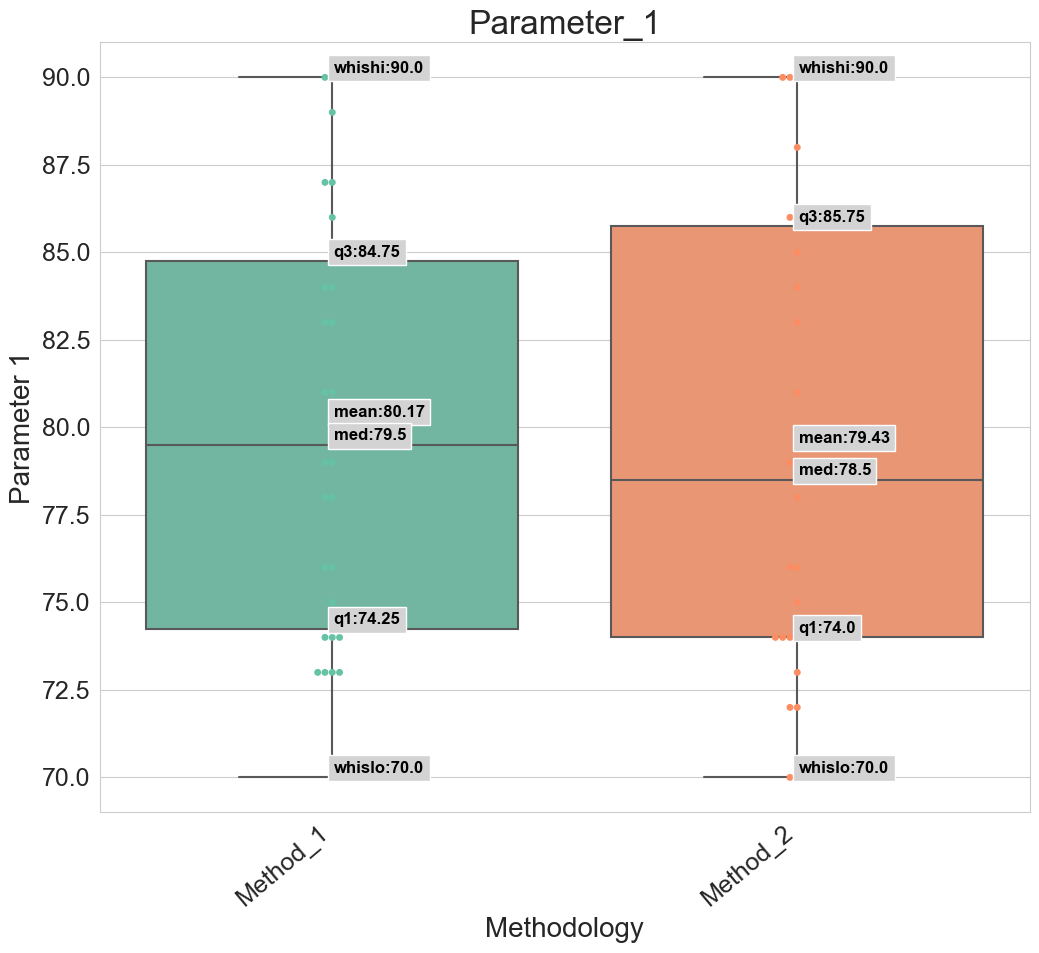

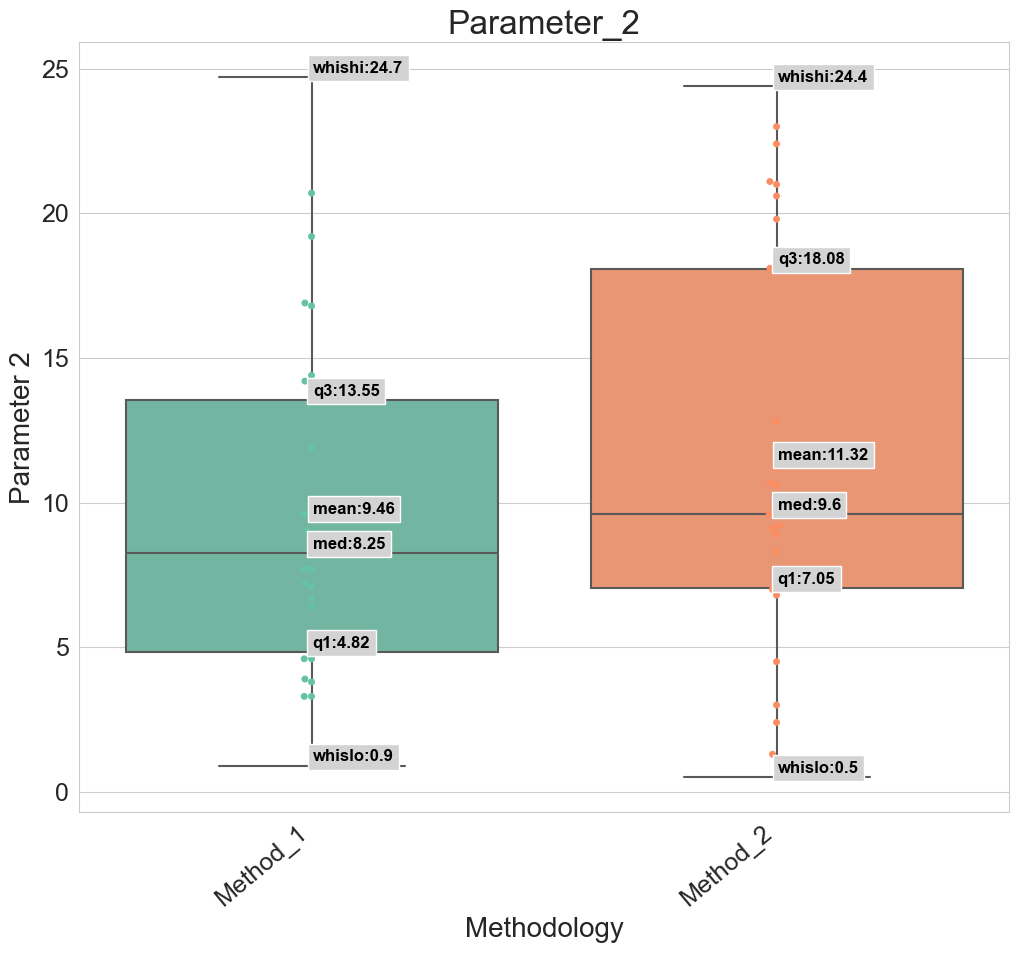

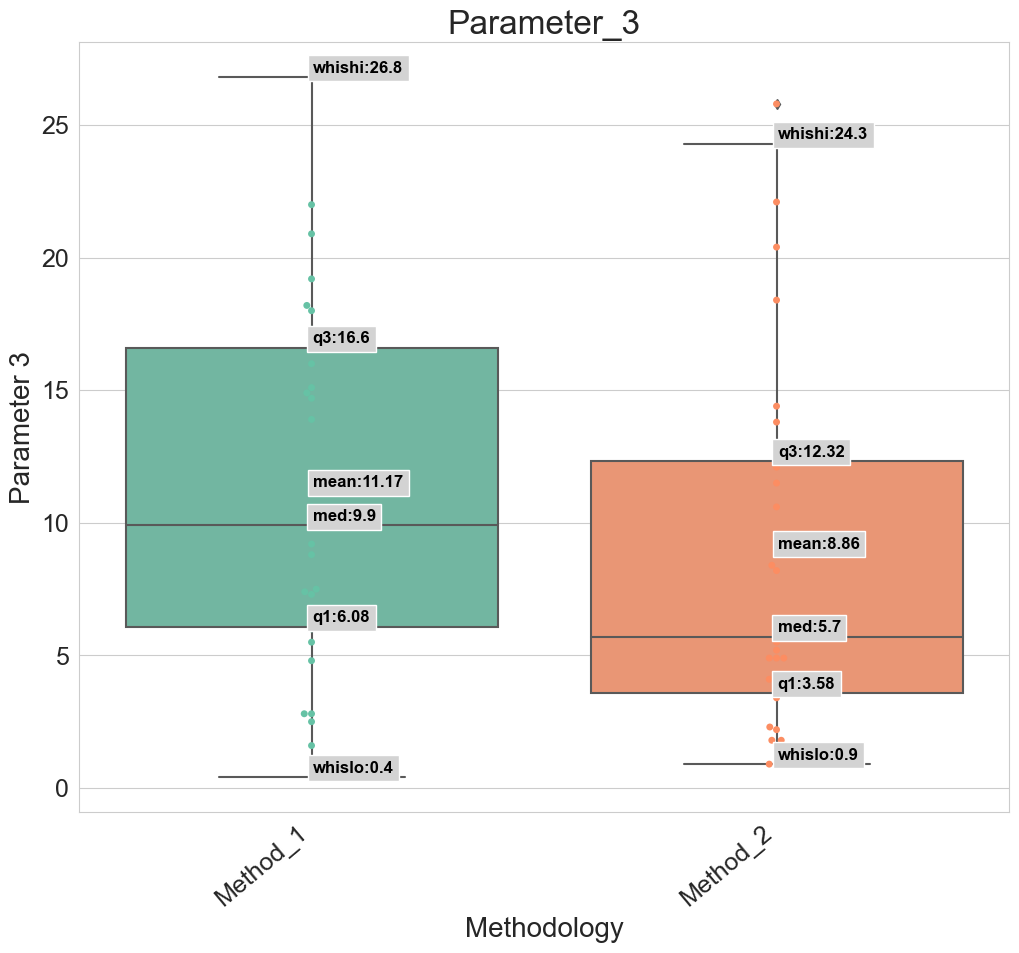

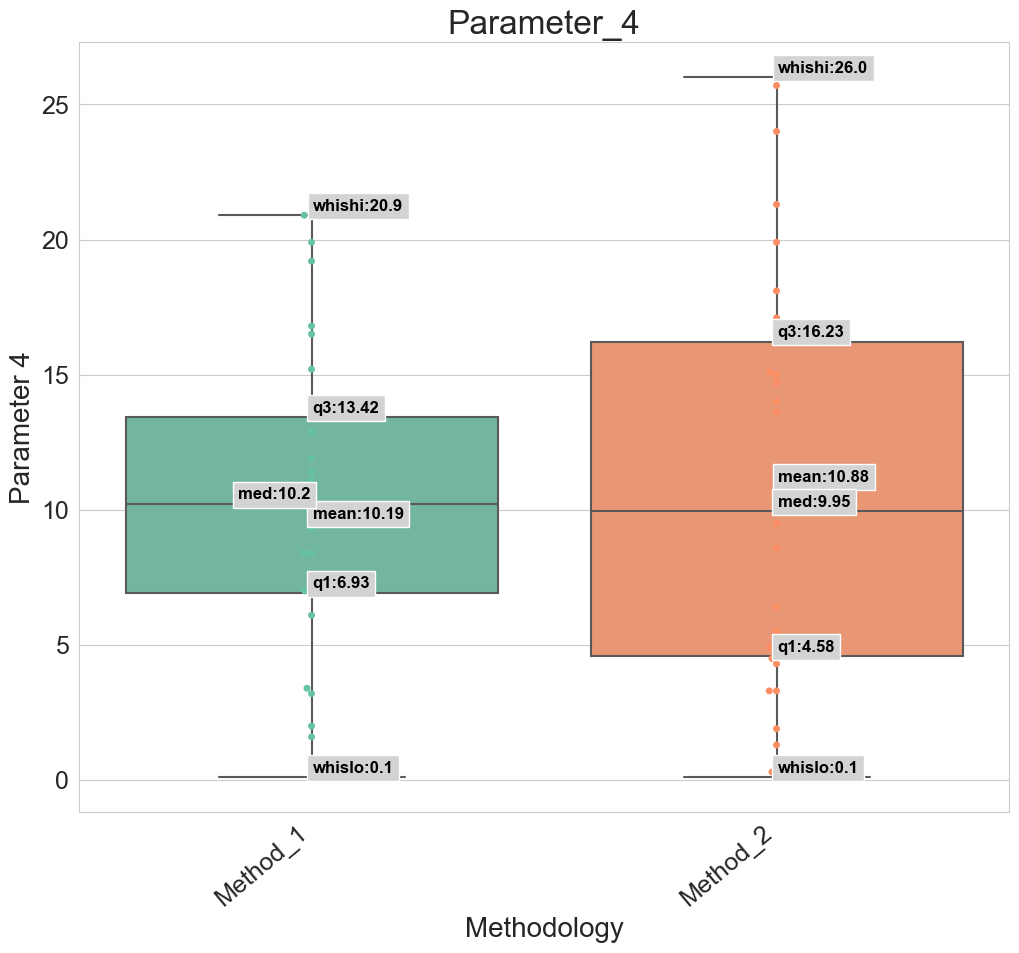

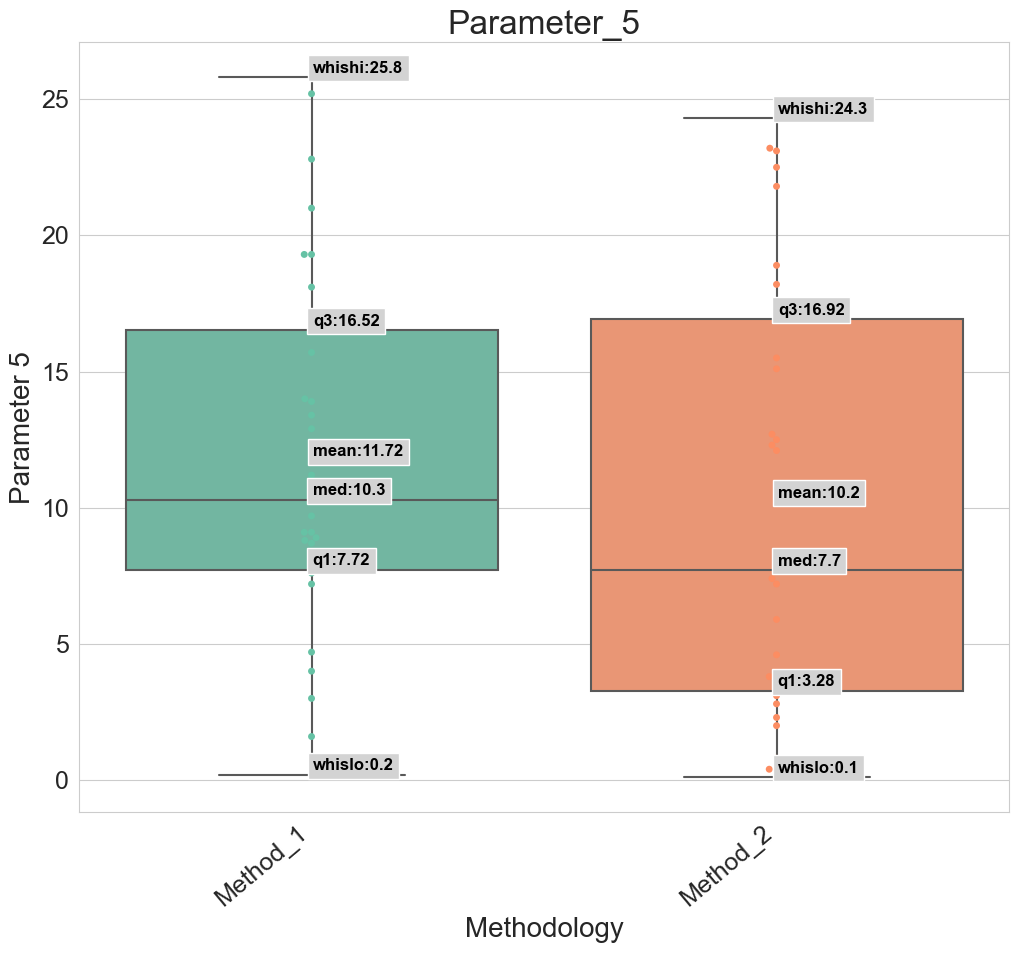

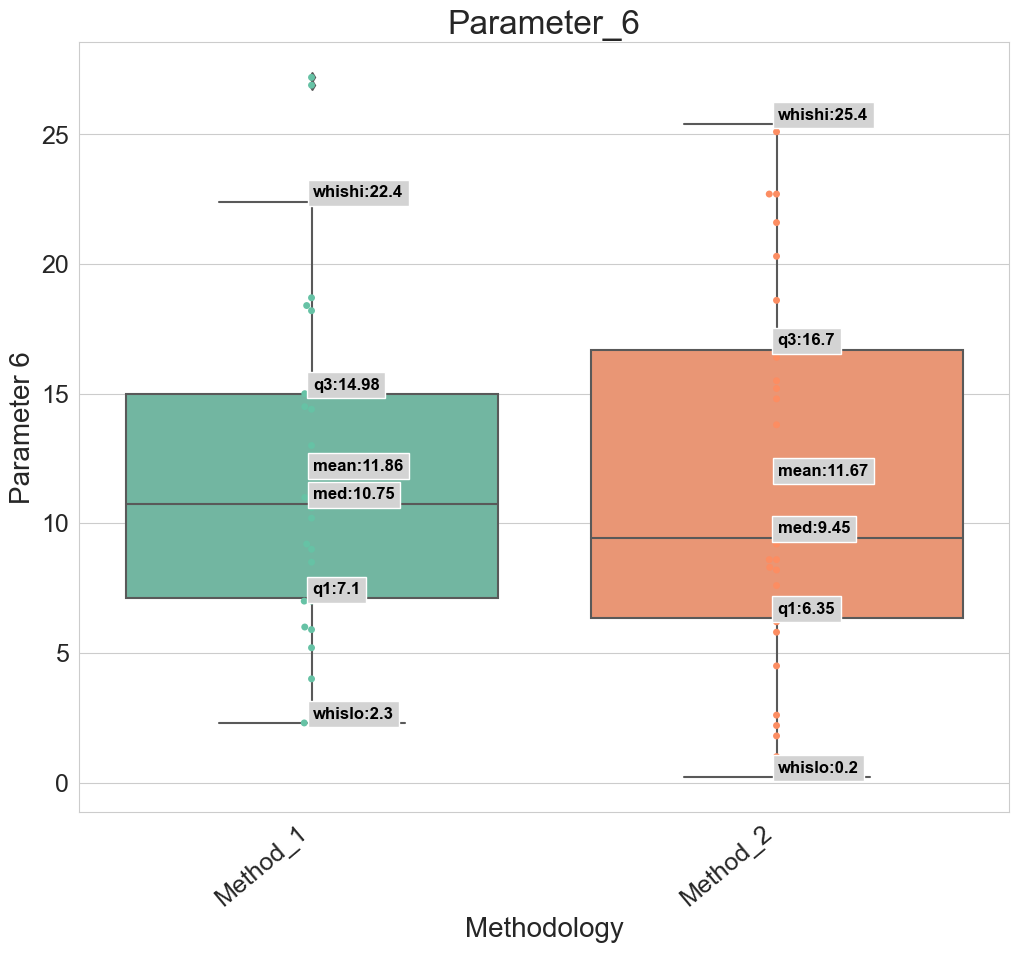

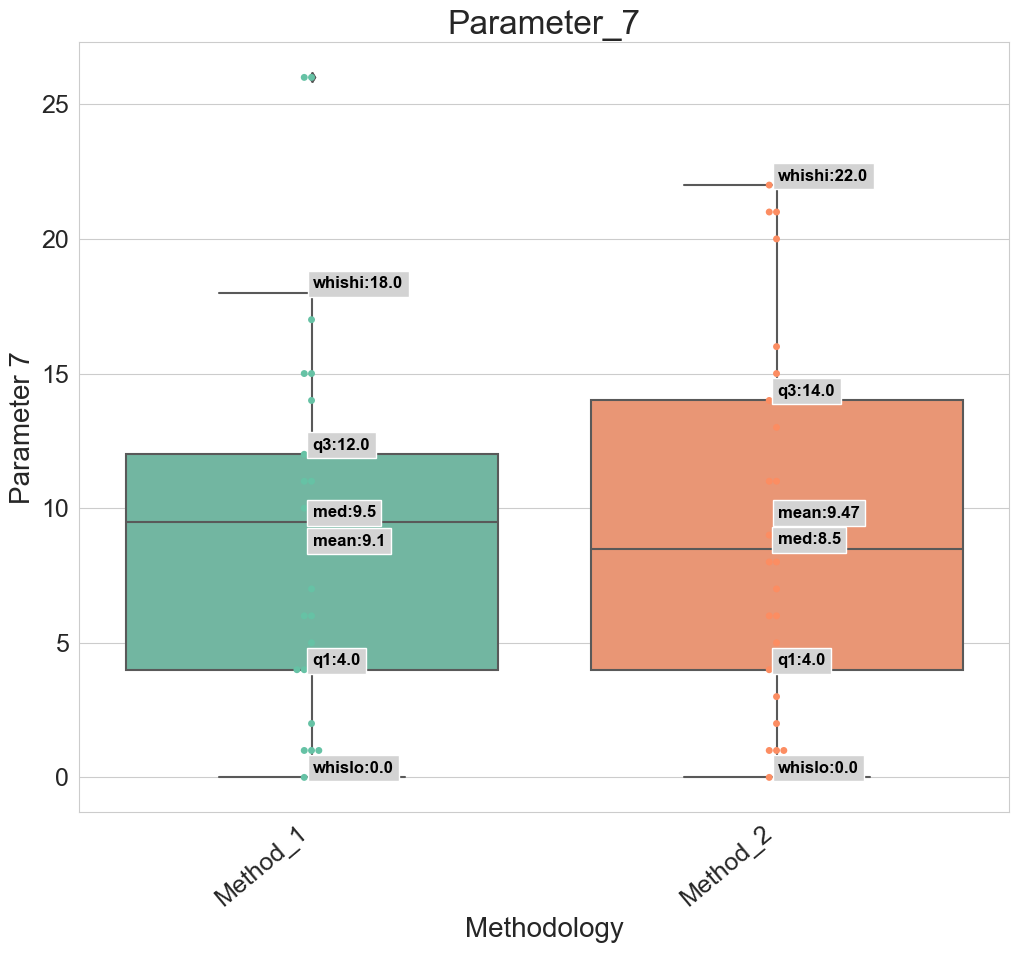

In [13]:
#Data dsitribution. in normal boxplot

Type_box_plot= '' # Use '' or 'broken'
#if your data have very high and low values 
# use broken plot and select the limits for the plots, 
# first higher limites and second for lower values

if Type_box_plot=='broken':
    dsg.box_plot_broken(lims=[[70,95],[0, 5]], data=df, x='Methodology', 
                    cat=list_variables, save=True, 
                    folder=f'{fold}/{data_to_pull}/box_plot_broken_data')
else:
    dsg.boxplot(data=df, x='Methodology', lims=None, mae_data=None,
                    categories=list_variables, save=True, 
                    folder=f'{fold}/{data_to_pull}/box_plot_data')

### Descriptive statistics analysis

#### Data

In [18]:
#General analisis of all samples
descrptive_stats_general = ds.descript_stats(data=df, dv=['Methodology'], di=list_variables, 
                                    param=['mean', 'std', 'count'], save=True, folder=f'{fold}/{data_to_pull}', 
                                    title=f'descript_stats-{data_to_pull}')
descrptive_stats_general

Methodology     Category Metric  Method_1  Method_2  R_Method
0            Parameter_1  count    15.000    15.000    15.000
1            Parameter_1   mean    77.467    79.533    80.400
2            Parameter_1    std     4.549     6.468     6.864
3            Parameter_2  count    15.000    15.000    15.000
4            Parameter_2   mean    43.613    61.333    38.553
5            Parameter_2    std    32.774    32.213    26.865
6            Parameter_3  count    15.000    15.000    15.000
7            Parameter_3   mean    56.513    41.373    40.633
8            Parameter_3    std    24.916    27.094    29.011
9            Parameter_4  count    15.000    15.000    15.000
10           Parameter_4   mean    47.360    49.927    32.393
11           Parameter_4    std    26.346    27.199    22.823
12           Parameter_5  count    15.000    15.000    15.000
13           Parameter_5   mean    41.020    30.160    65.420
14           Parameter_5    std    36.630    24.353    30.086
15           Parameter_6  count    15.000    15.000    15.000
16           Parameter_6   mean    47.553    45.327    43.247
17           Parameter_6    std    30.869    30.133    33.415
18           Parameter_7  count    15.000    15.000    15.000
19           Parameter_7   mean    56.600    47.200    60.067
20           Parameter_7    std    33.979    24.635    29.117

In [19]:
#Diff absolute values.
diff_abs = ds.difference_calculator(data=df, clasif='Methodology', sub_index=ad.ds_diff_sub_index[data_to_pull], abs=True,
                        save=True, folder=f'{fold}/{data_to_pull}', title=f'differences_abs-{data_to_pull}') 
diff_abs_stats = ds.descript_stats(data=diff_abs, dv=['Differences'], di=list_variables, 
                    param=['mean', 'std', 'count'], save=True, folder=f'{fold}/{data_to_pull}', 
                    title=f'descript_stats_diff_abs-{data_to_pull}')
diff_abs_stats


Differences     Category Metric  Method_1_vs_Method_2  R_Method_vs_Method_1  \
0            Parameter_1  count                15.000                15.000   
1            Parameter_1   mean                 6.333                 7.333   
2            Parameter_1    std                 5.010                 5.300   
3            Parameter_2  count                15.000                15.000   
4            Parameter_2   mean                44.533                30.687   
5            Parameter_2    std                24.140                22.964   
6            Parameter_3  count                15.000                15.000   
7            Parameter_3   mean                33.287                33.720   
8            Parameter_3    std                22.538                20.427   
9            Parameter_4  count                15.000                15.000   
10           Parameter_4   mean                35.767                29.593   
11           Parameter_4    std                22.307                21.893   
12           Parameter_5  count                15.000                15.000   
13           Parameter_5   mean                27.233                39.893   
14           Parameter_5    std                23.807                33.333   
15           Parameter_6  count                15.000                15.000   
16           Parameter_6   mean                34.533                35.627   
17           Parameter_6    std                25.040                26.797   
18           Parameter_7  count                15.000                15.000   
19           Parameter_7   mean                30.467                39.733   
20           Parameter_7    std                17.578                31.802   

Differences  R_Method_vs_Method_2  
0                          15.000  
1                           6.867  
2                           5.817  
3                          15.000  
4                          31.327  
5                          24.096  
6                          15.000  
7                          32.220  
8                          18.800  
9                          15.000  
10                         29.800  
11                         18.962  
12                         15.000  
13                         44.473  
14                         28.879  
15                         15.000  
16                         27.400  
17                         24.580  
18                         15.000  
19                         30.733  
20                         24.496

In [20]:
#Diff relative values.
diff = ds.difference_calculator(data=df, clasif='Methodology', sub_index=ad.ds_diff_sub_index[data_to_pull], abs=False,
                    save=True, folder=f'{fold}/{data_to_pull}', title=f'differences-{data_to_pull}') 
diff_stats = ds.descript_stats(data=diff, dv=['Differences'], di=list_variables, 
                    param=['mean', 'std', 'count'], save=True, 
                    folder=f'{fold}/{data_to_pull}', title=f'descript_stats_diff-{data_to_pull}')
diff_stats

Differences     Category Metric  Method_1_vs_Method_2  R_Method_vs_Method_1  \
0            Parameter_1  count                15.000                15.000   
1            Parameter_1   mean                -2.067                 2.933   
2            Parameter_1    std                 7.968                 8.746   
3            Parameter_2  count                15.000                15.000   
4            Parameter_2   mean               -17.720                -5.060   
5            Parameter_2    std                48.695                38.844   
6            Parameter_3  count                15.000                15.000   
7            Parameter_3   mean                15.140               -15.880   
8            Parameter_3    std                38.073                36.950   
9            Parameter_4  count                15.000                15.000   
10           Parameter_4   mean                -2.567               -14.967   
11           Parameter_4    std                43.142                34.316   
12           Parameter_5  count                15.000                15.000   
13           Parameter_5   mean                10.860                24.400   
14           Parameter_5    std                35.143                46.673   
15           Parameter_6  count                15.000                15.000   
16           Parameter_6   mean                 2.227                -4.307   
17           Parameter_6    std                43.582                45.367   
18           Parameter_7  count                15.000                15.000   
19           Parameter_7   mean                 9.400                 3.467   
20           Parameter_7    std                34.768                51.865   

Differences  R_Method_vs_Method_2  
0                          15.000  
1                           0.867  
2                           9.141  
3                          15.000  
4                         -22.780  
5                          32.804  
6                          15.000  
7                          -0.740  
8                          38.277  
9                          15.000  
10                        -17.533  
11                         31.331  
12                         15.000  
13                         35.260  
14                         40.263  
15                         15.000  
16                         -2.080  
17                         37.469  
18                         15.000  
19                         12.867  
20                         37.877

#### Graphical representation.

##### Data distribution

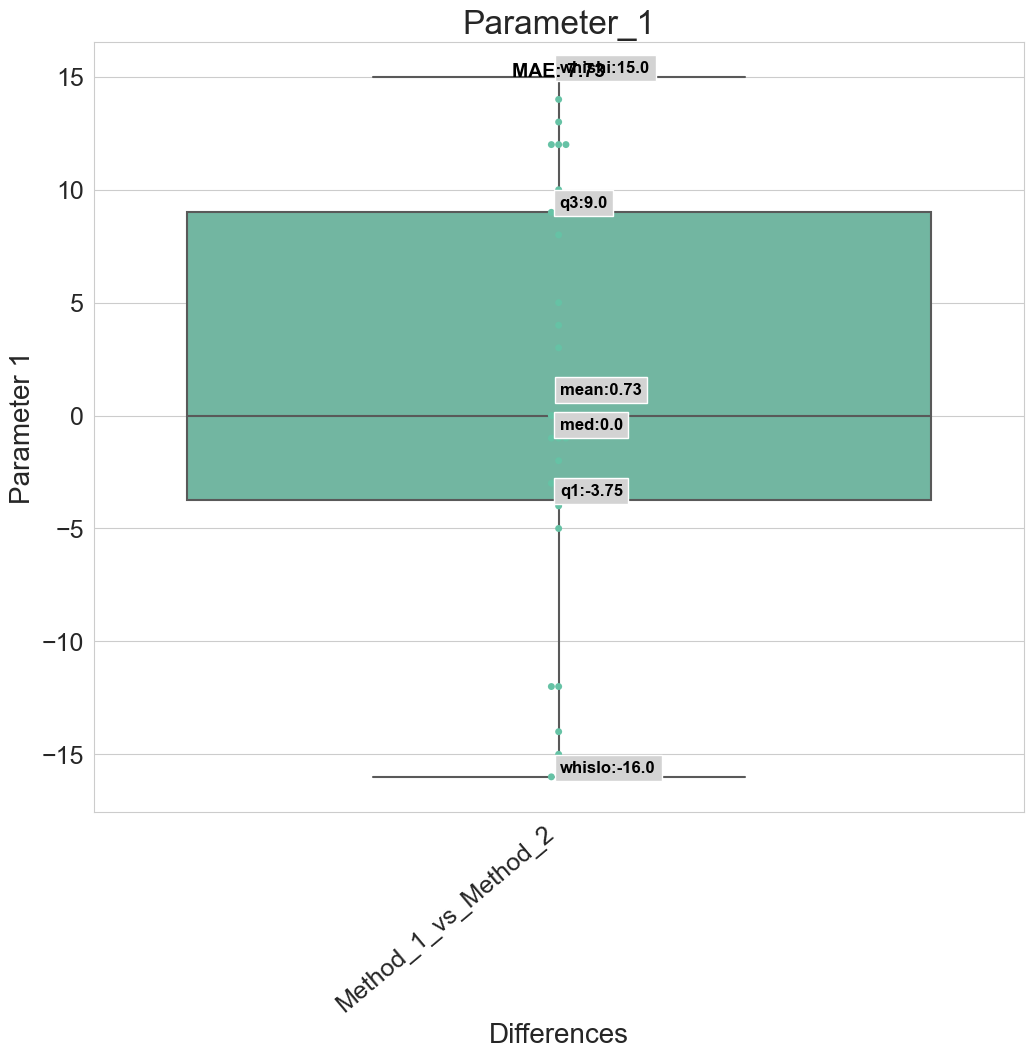

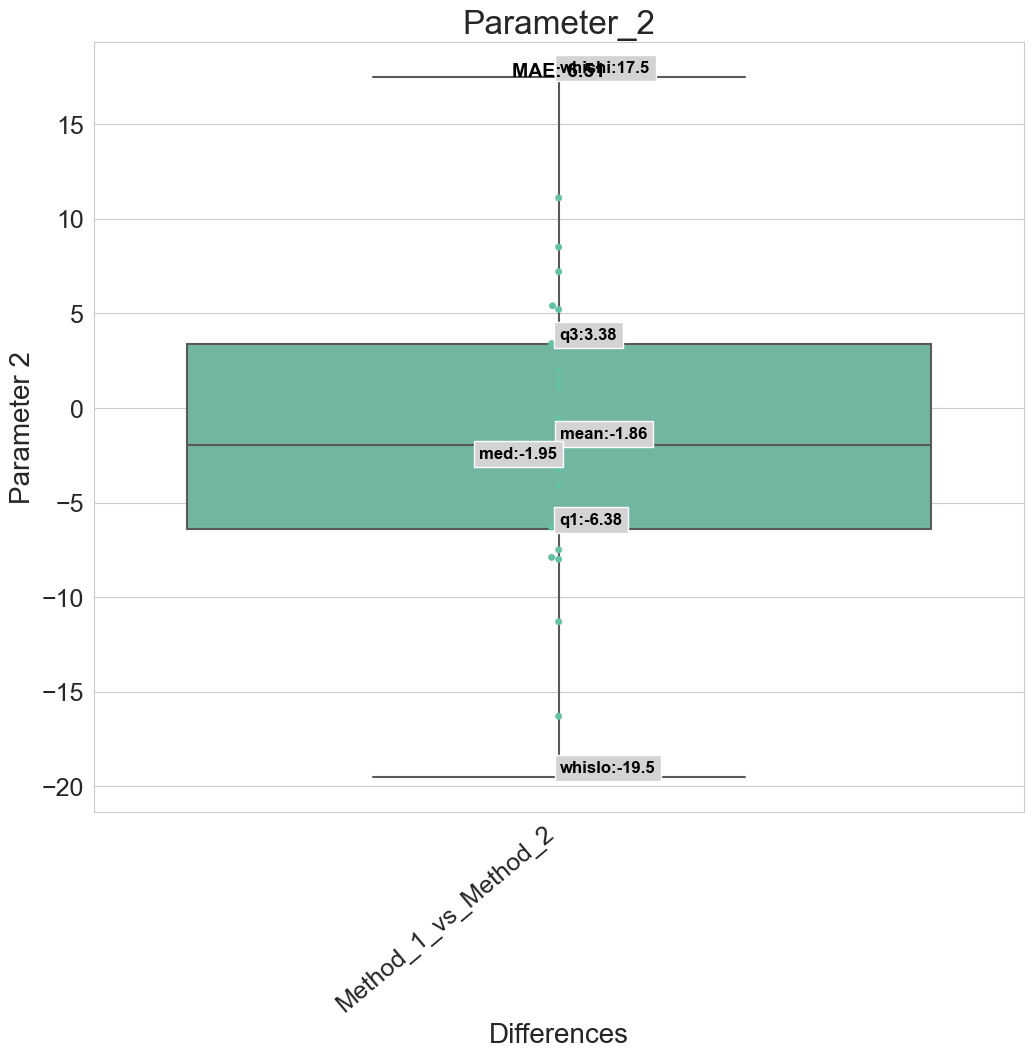

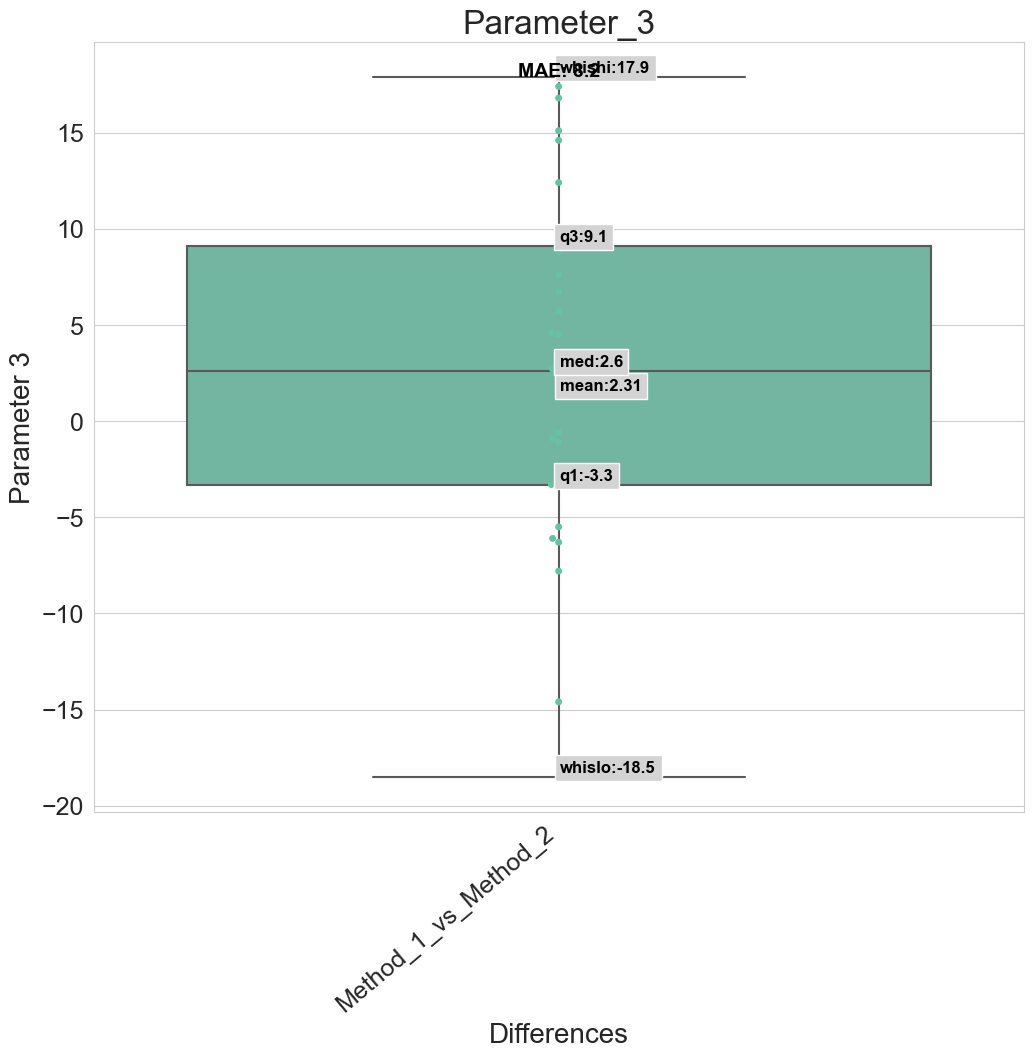

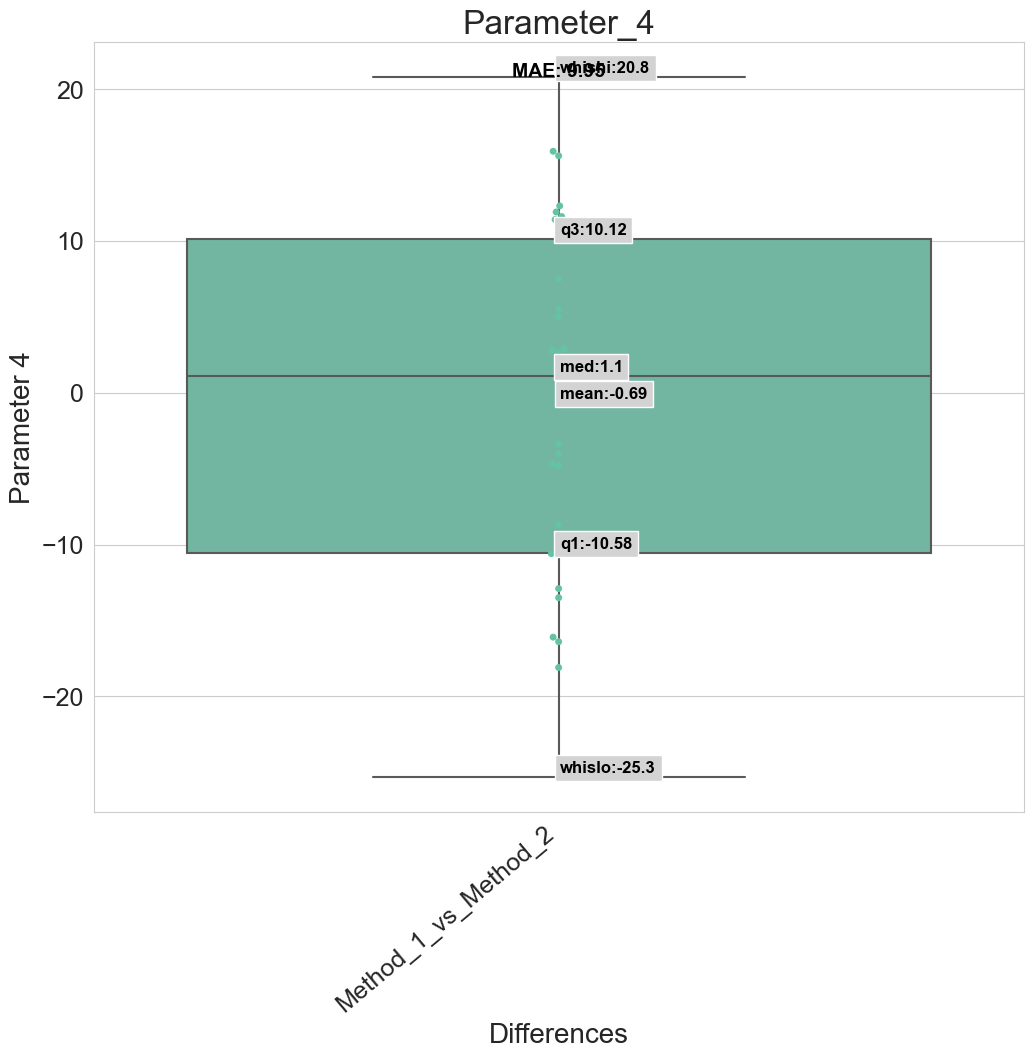

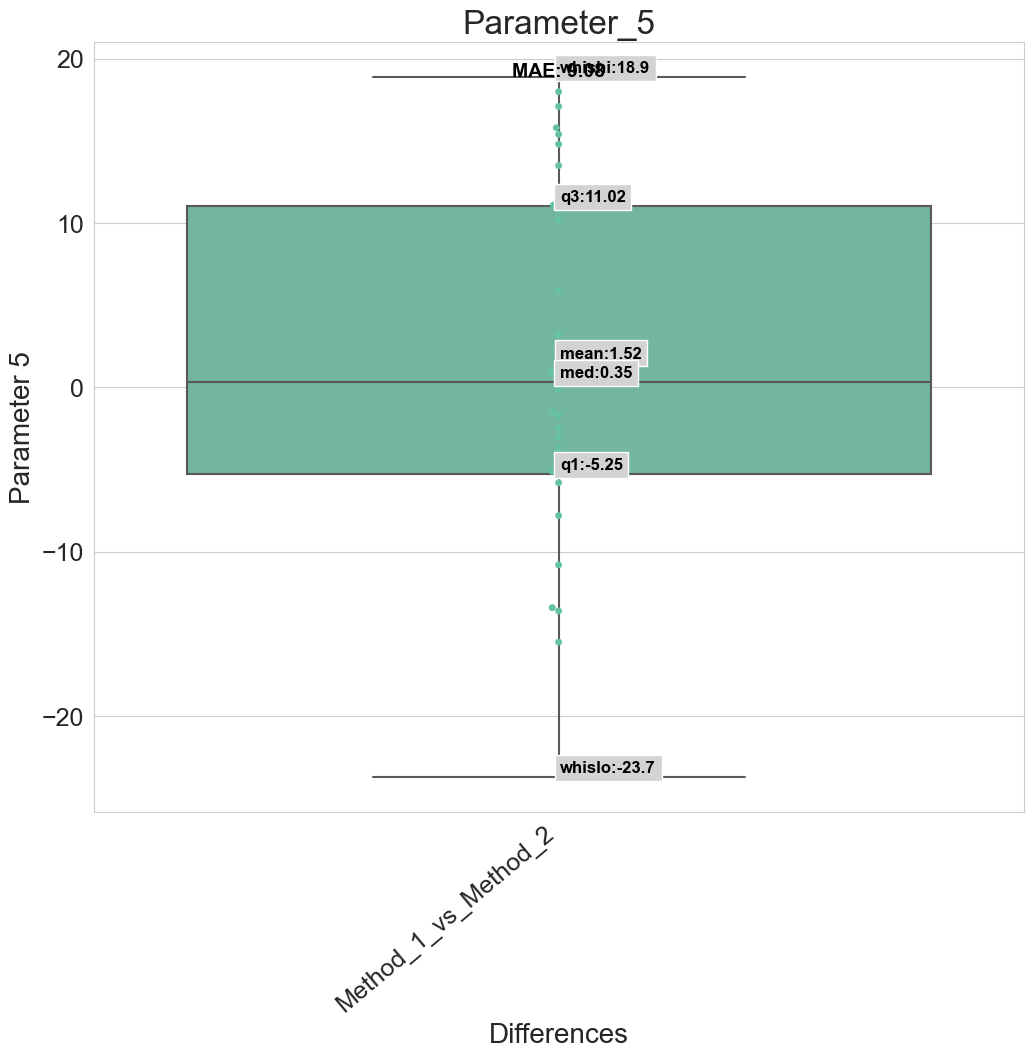

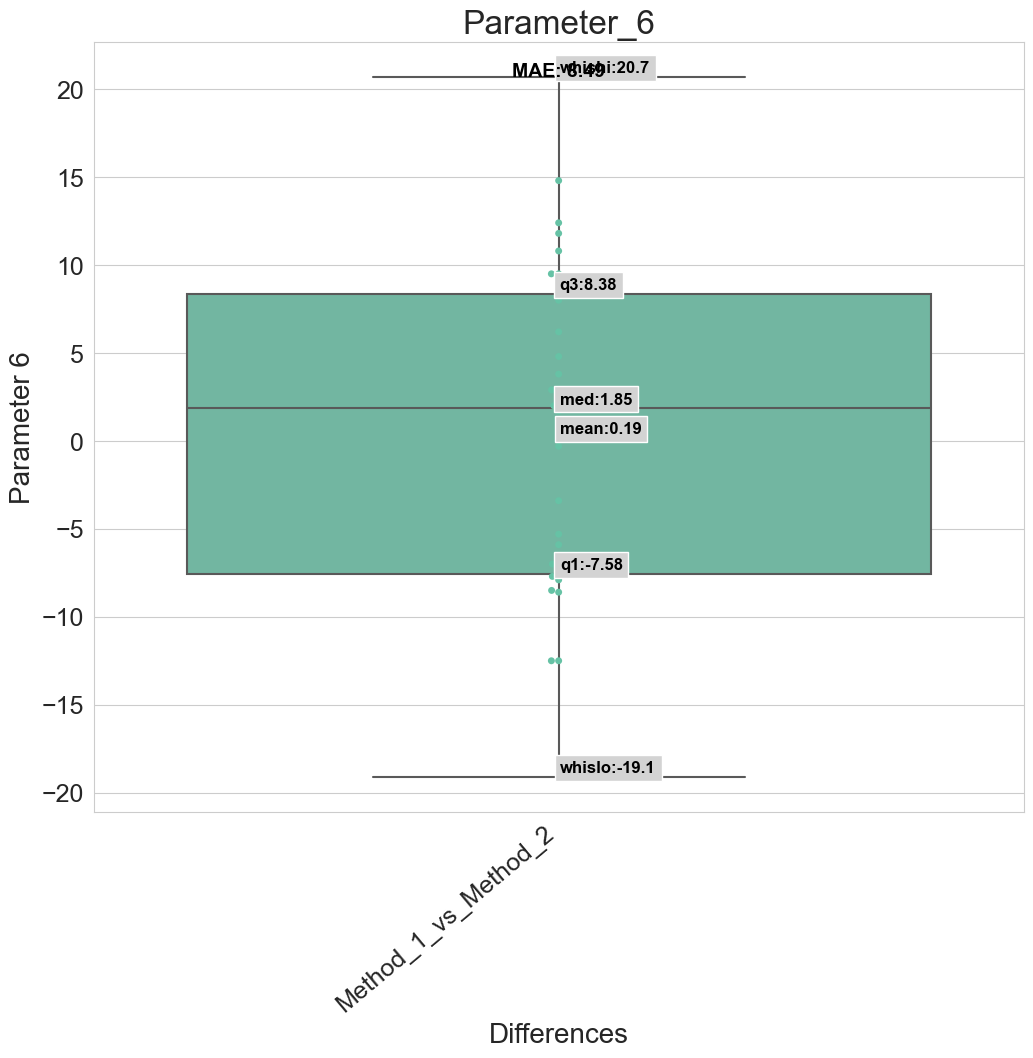

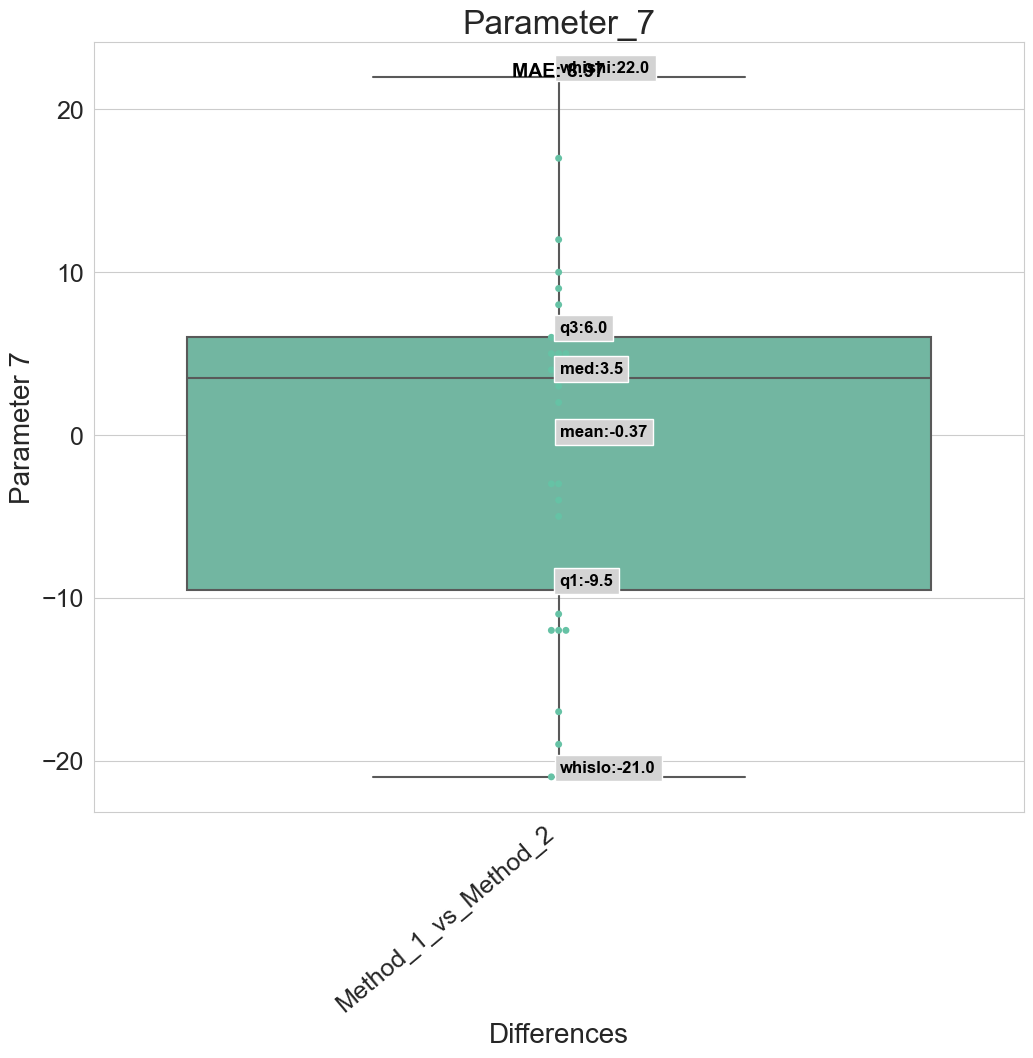

In [17]:
dsg.boxplot(data=diff, x='Differences', categories=list_variables, mae_data=diff_abs,
            save=True, folder=f'{fold}/{data_to_pull}/box_plot_diff')

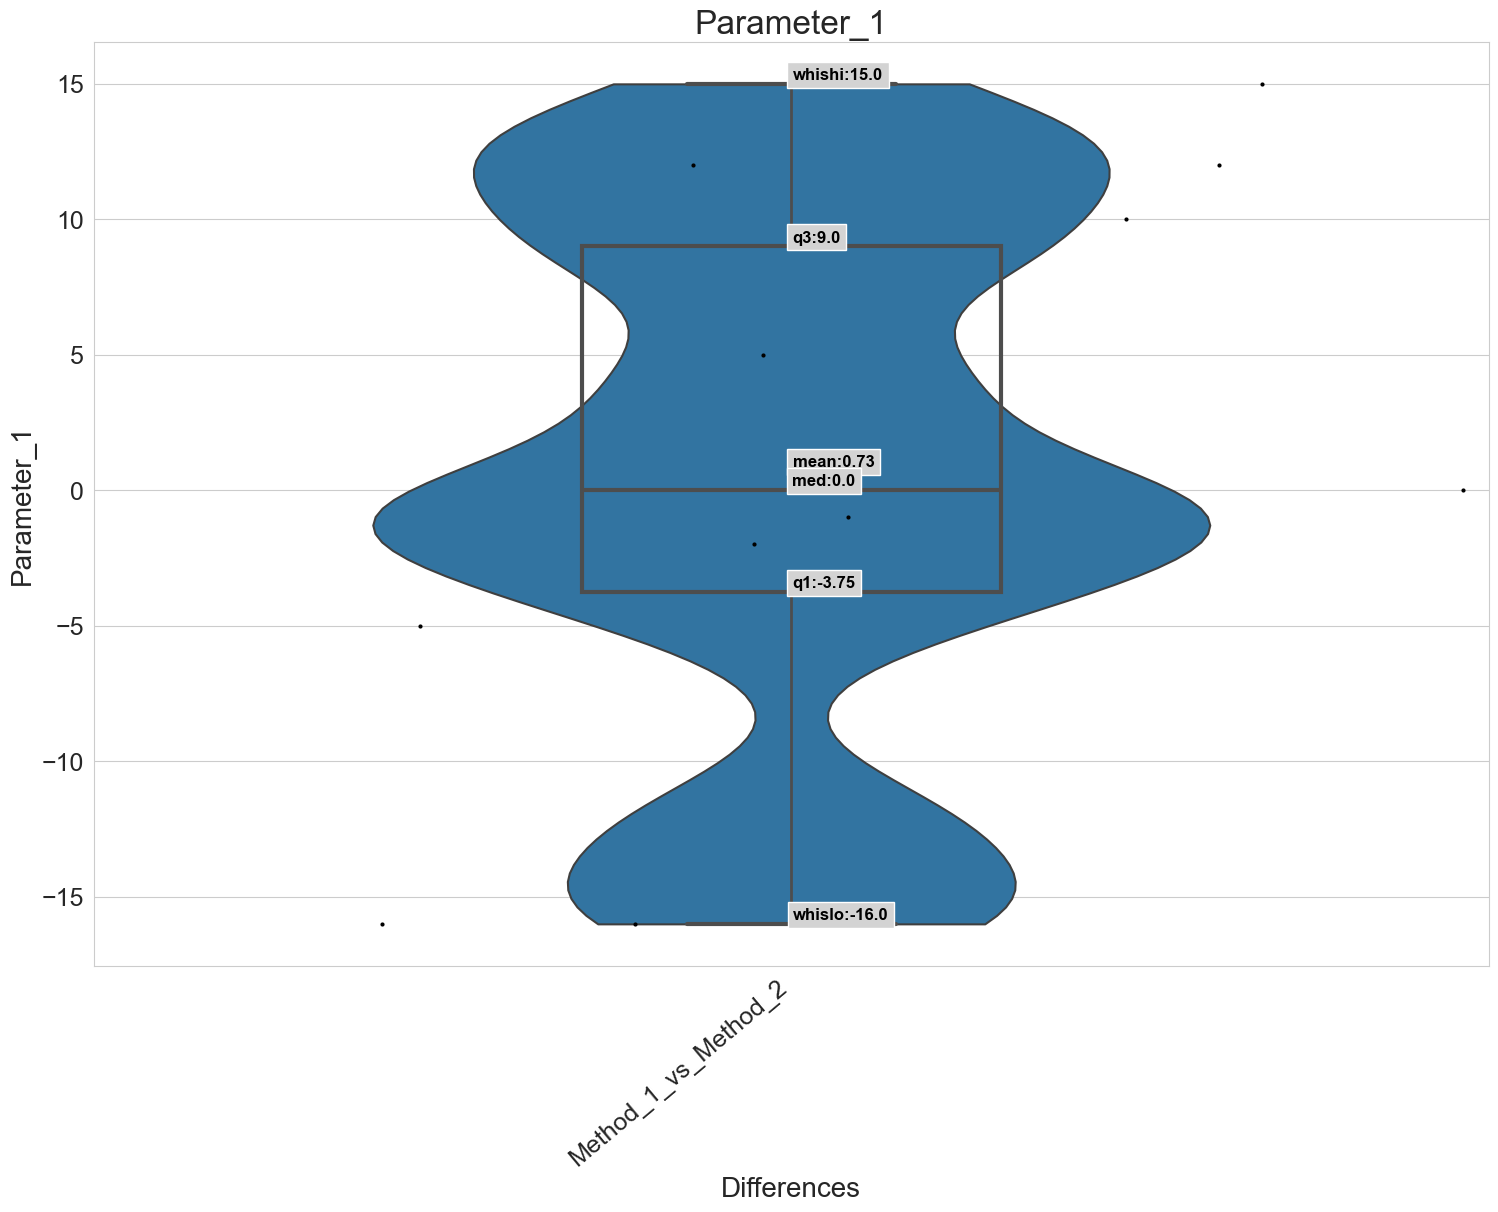

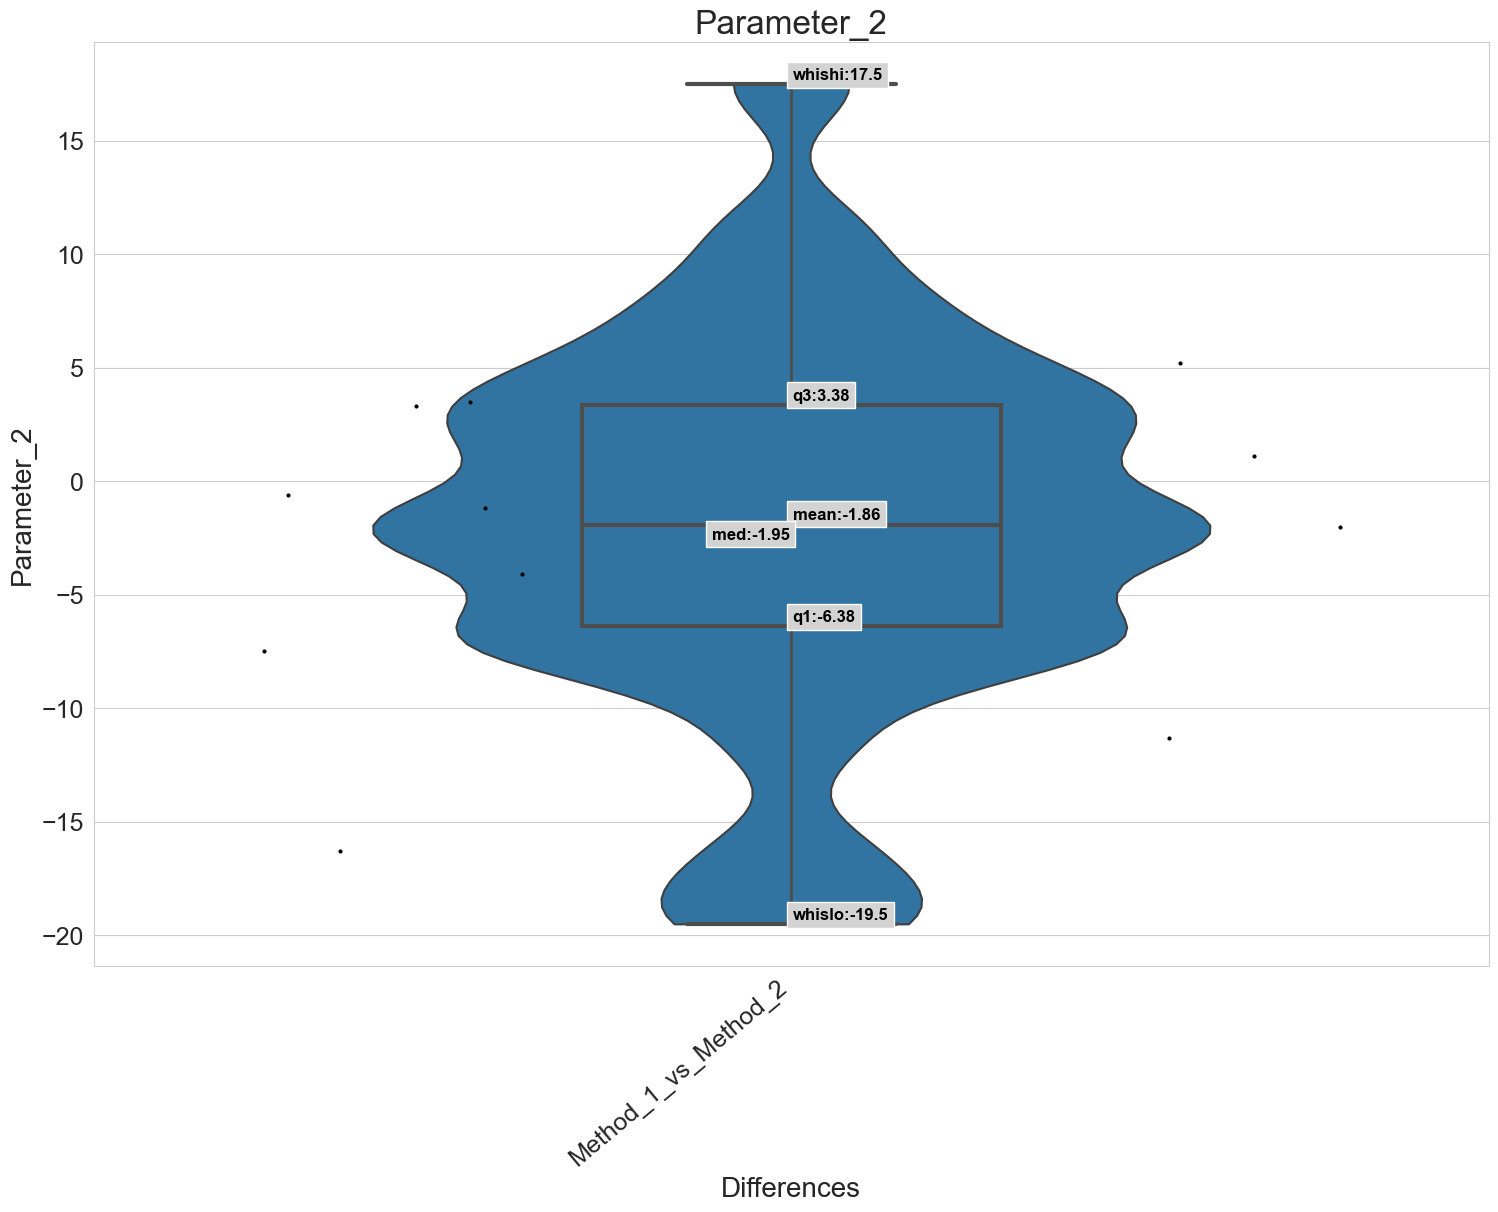

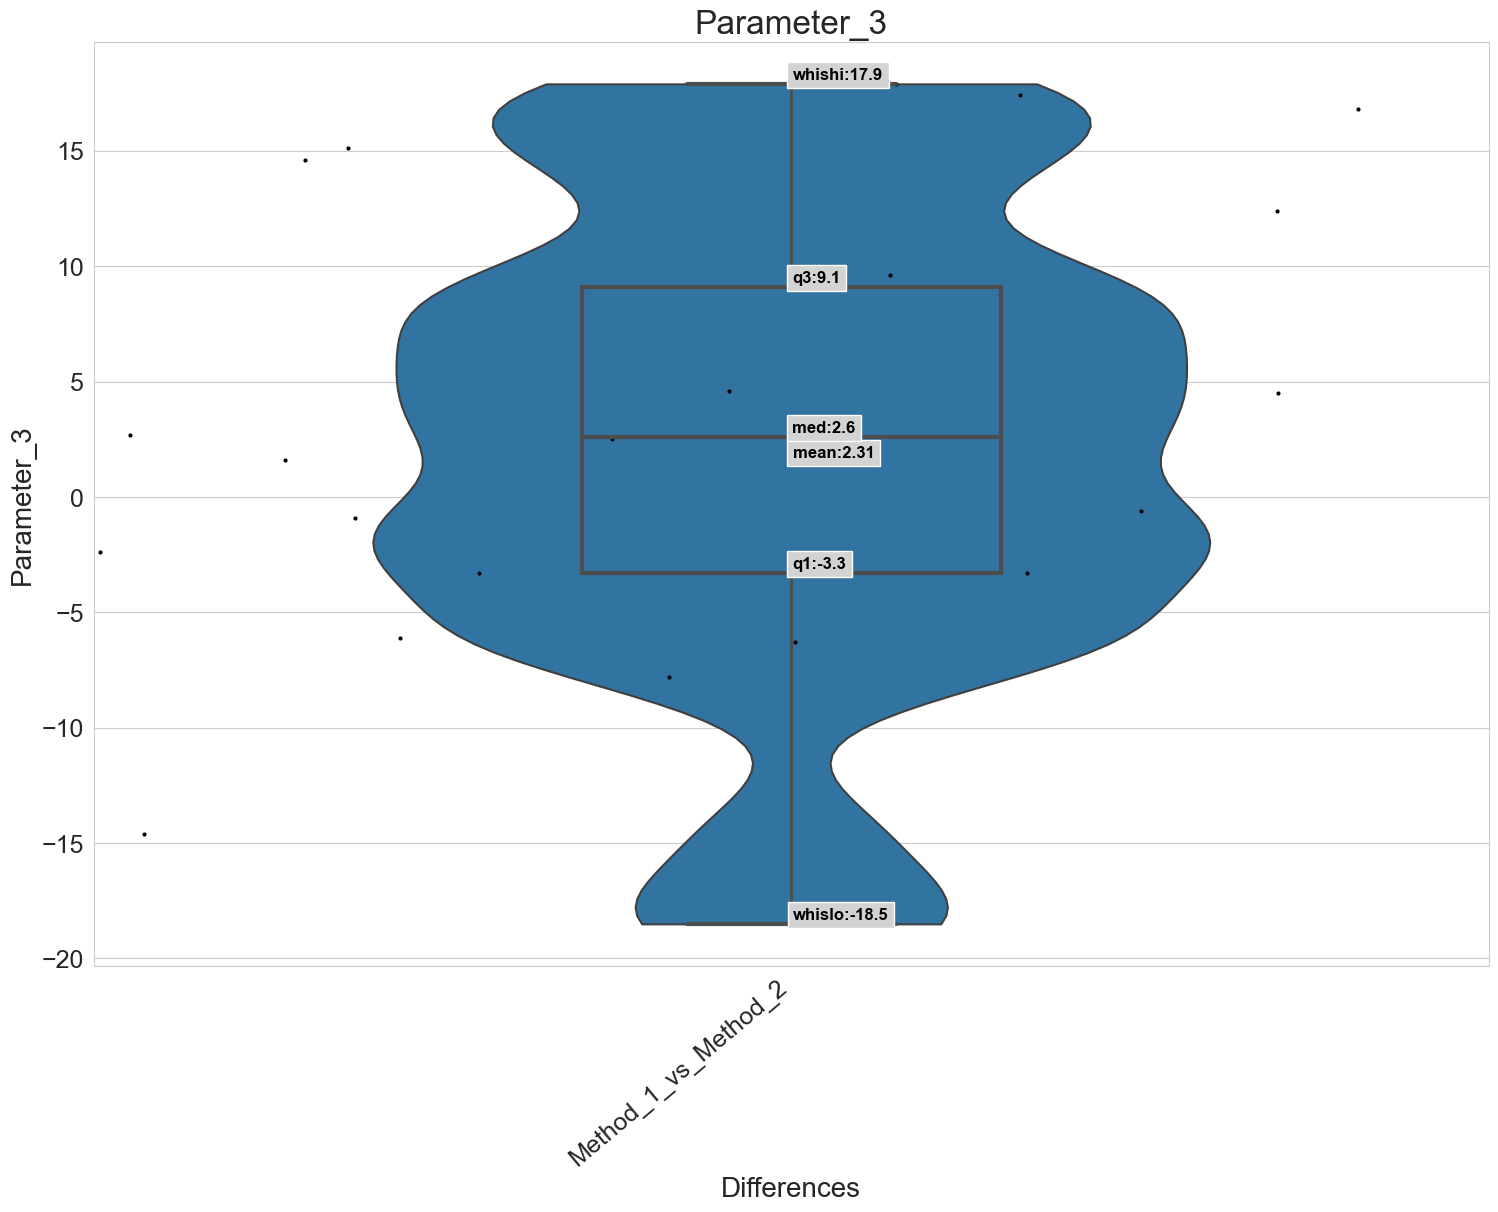

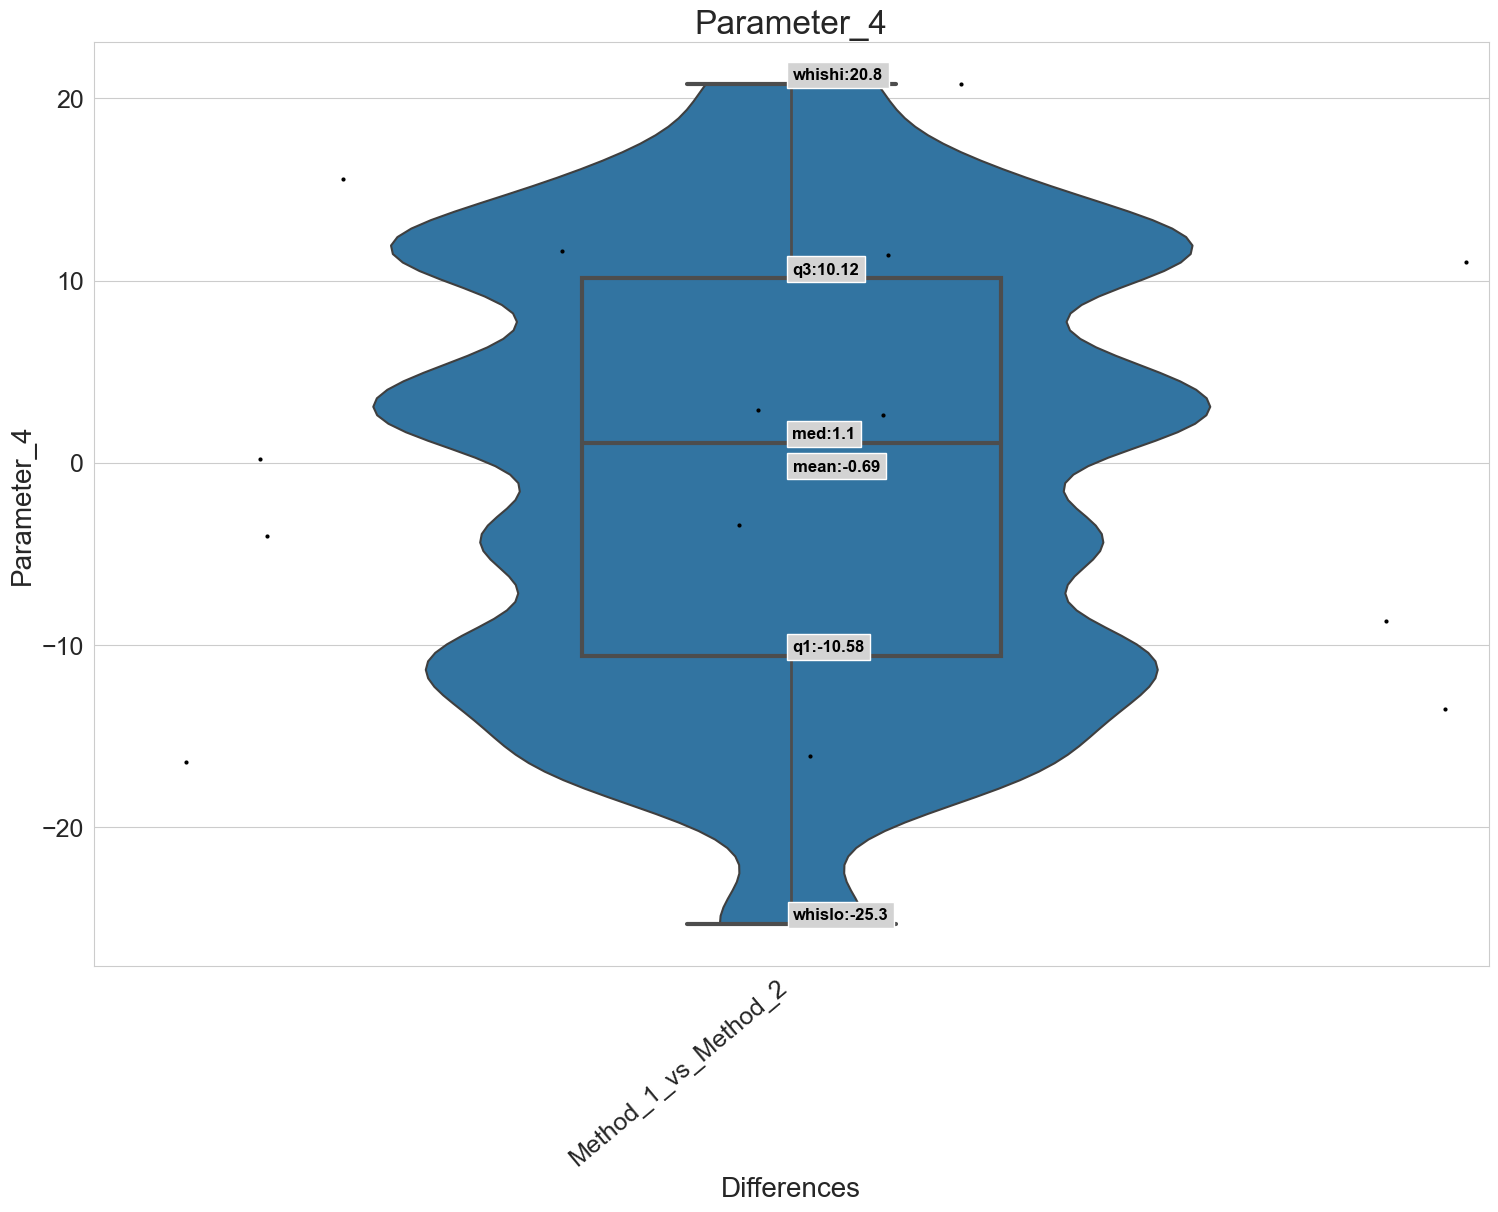

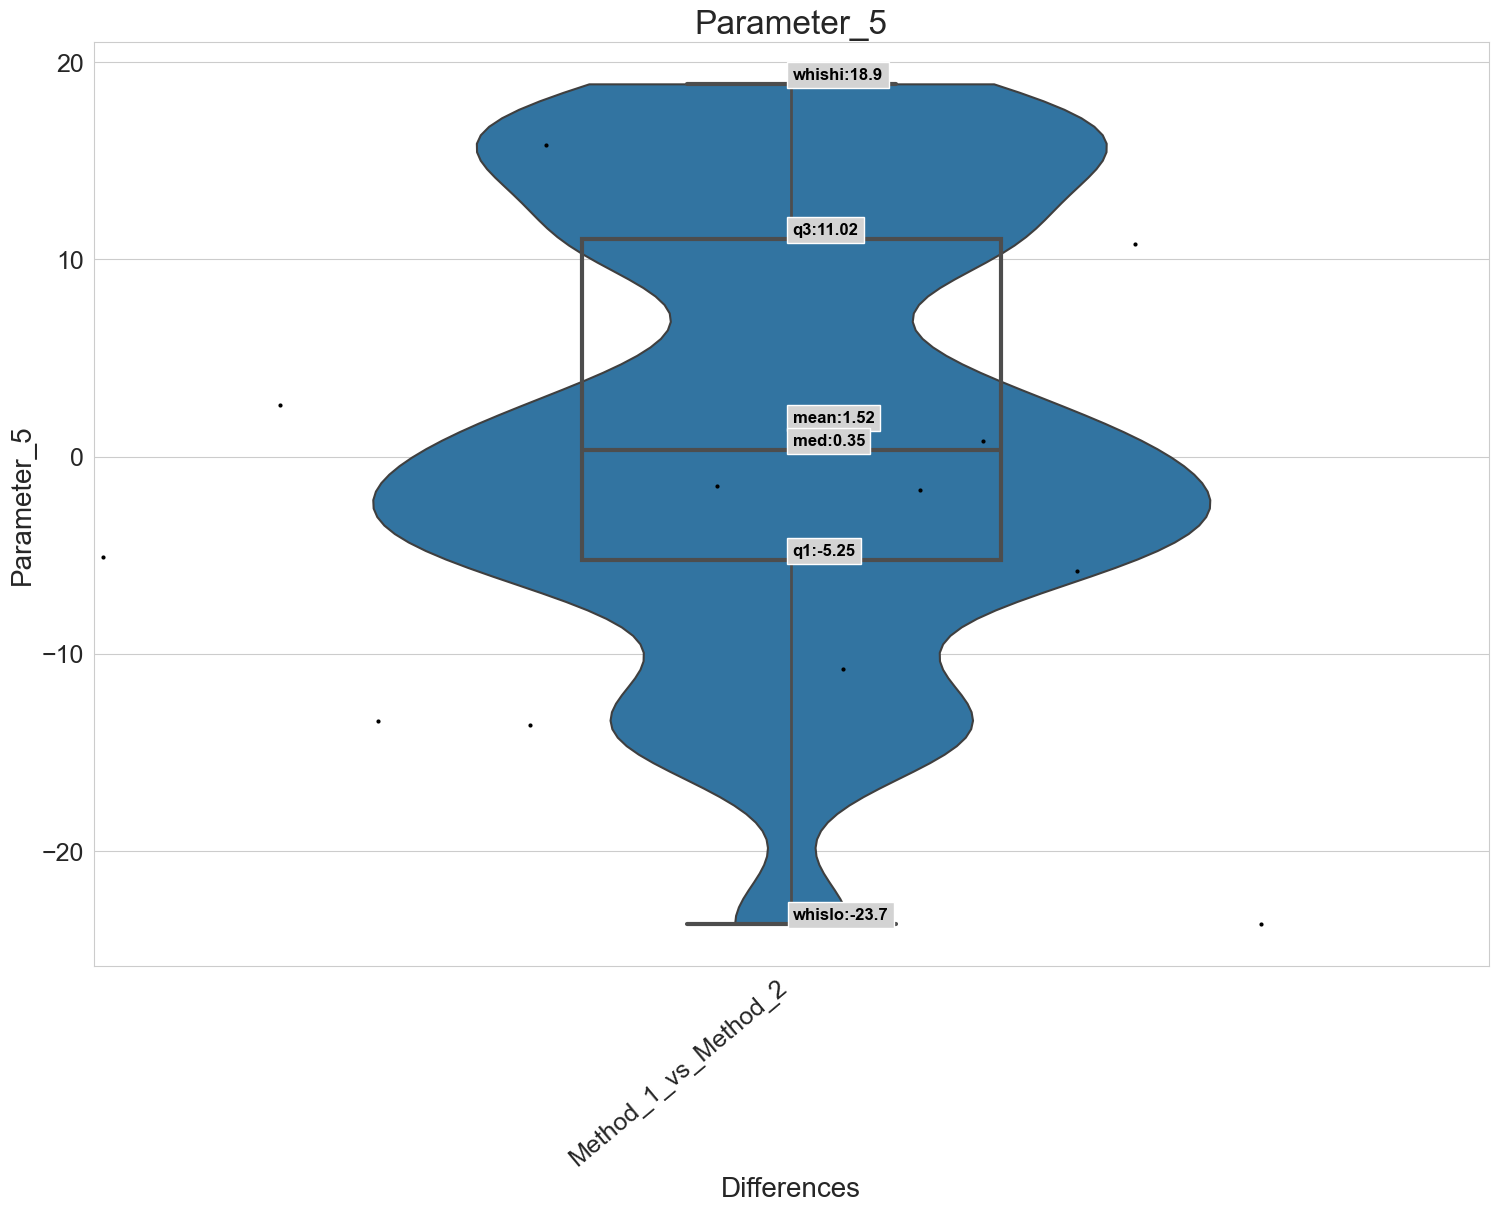

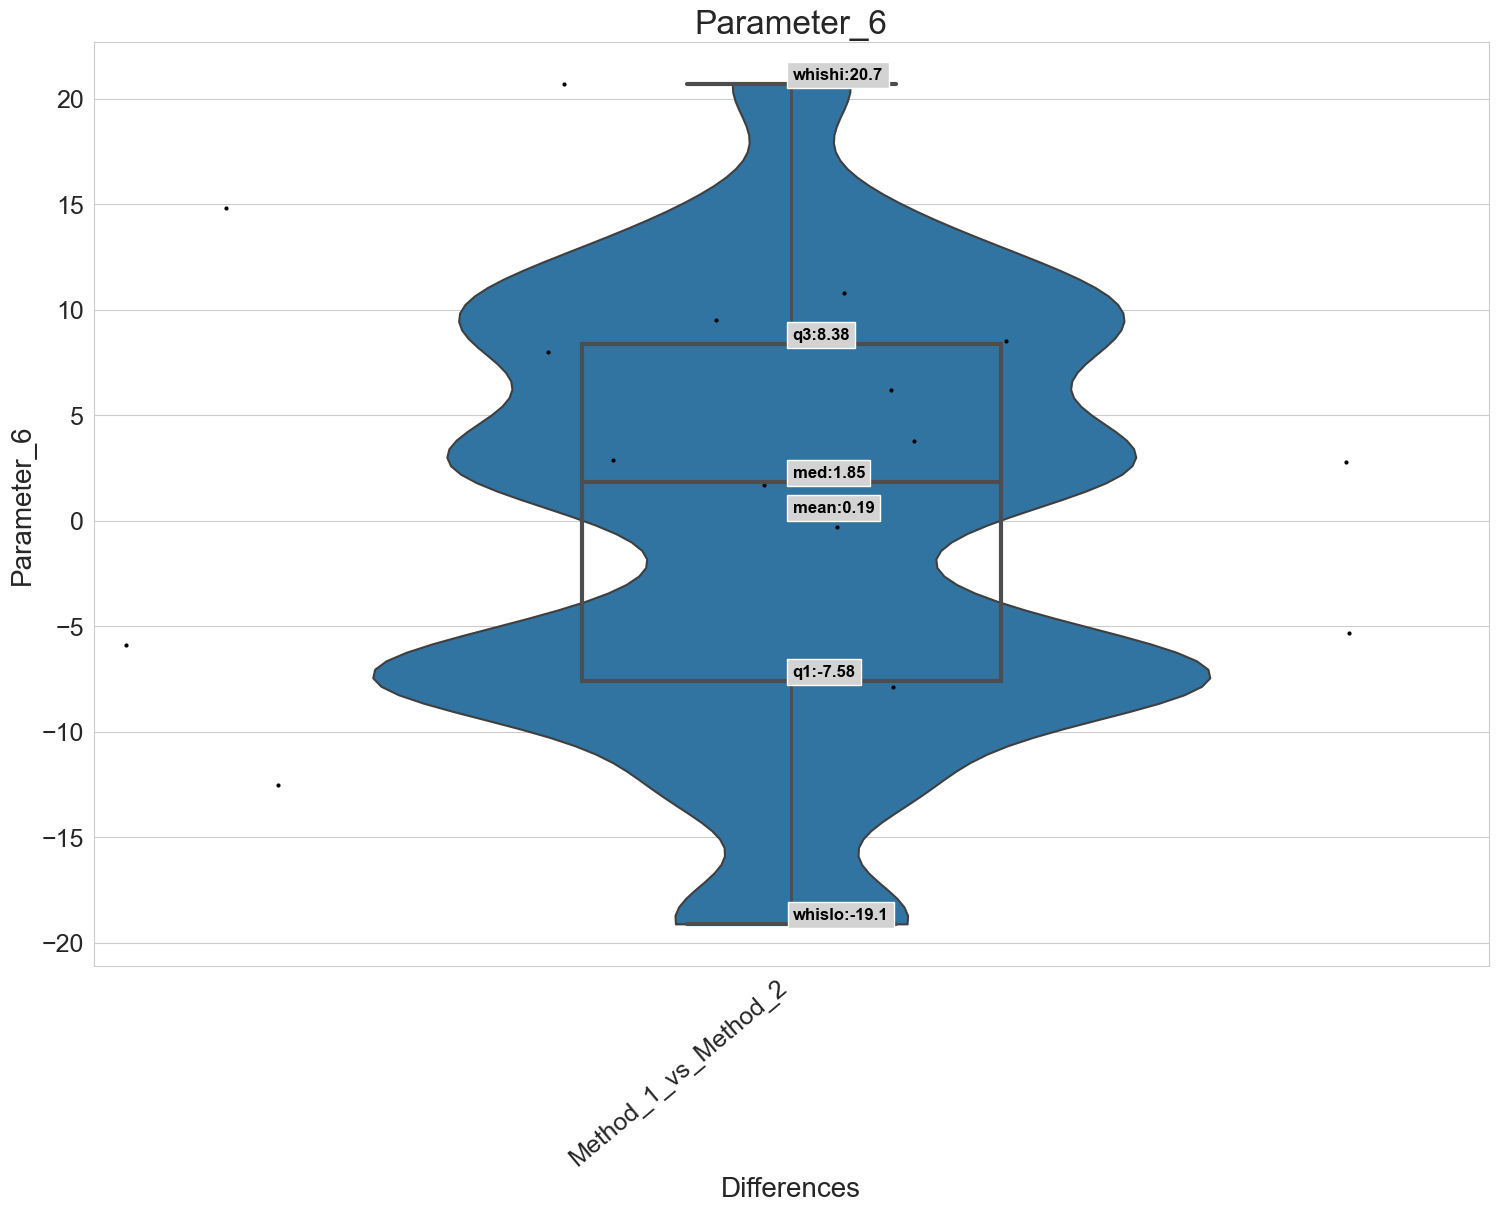

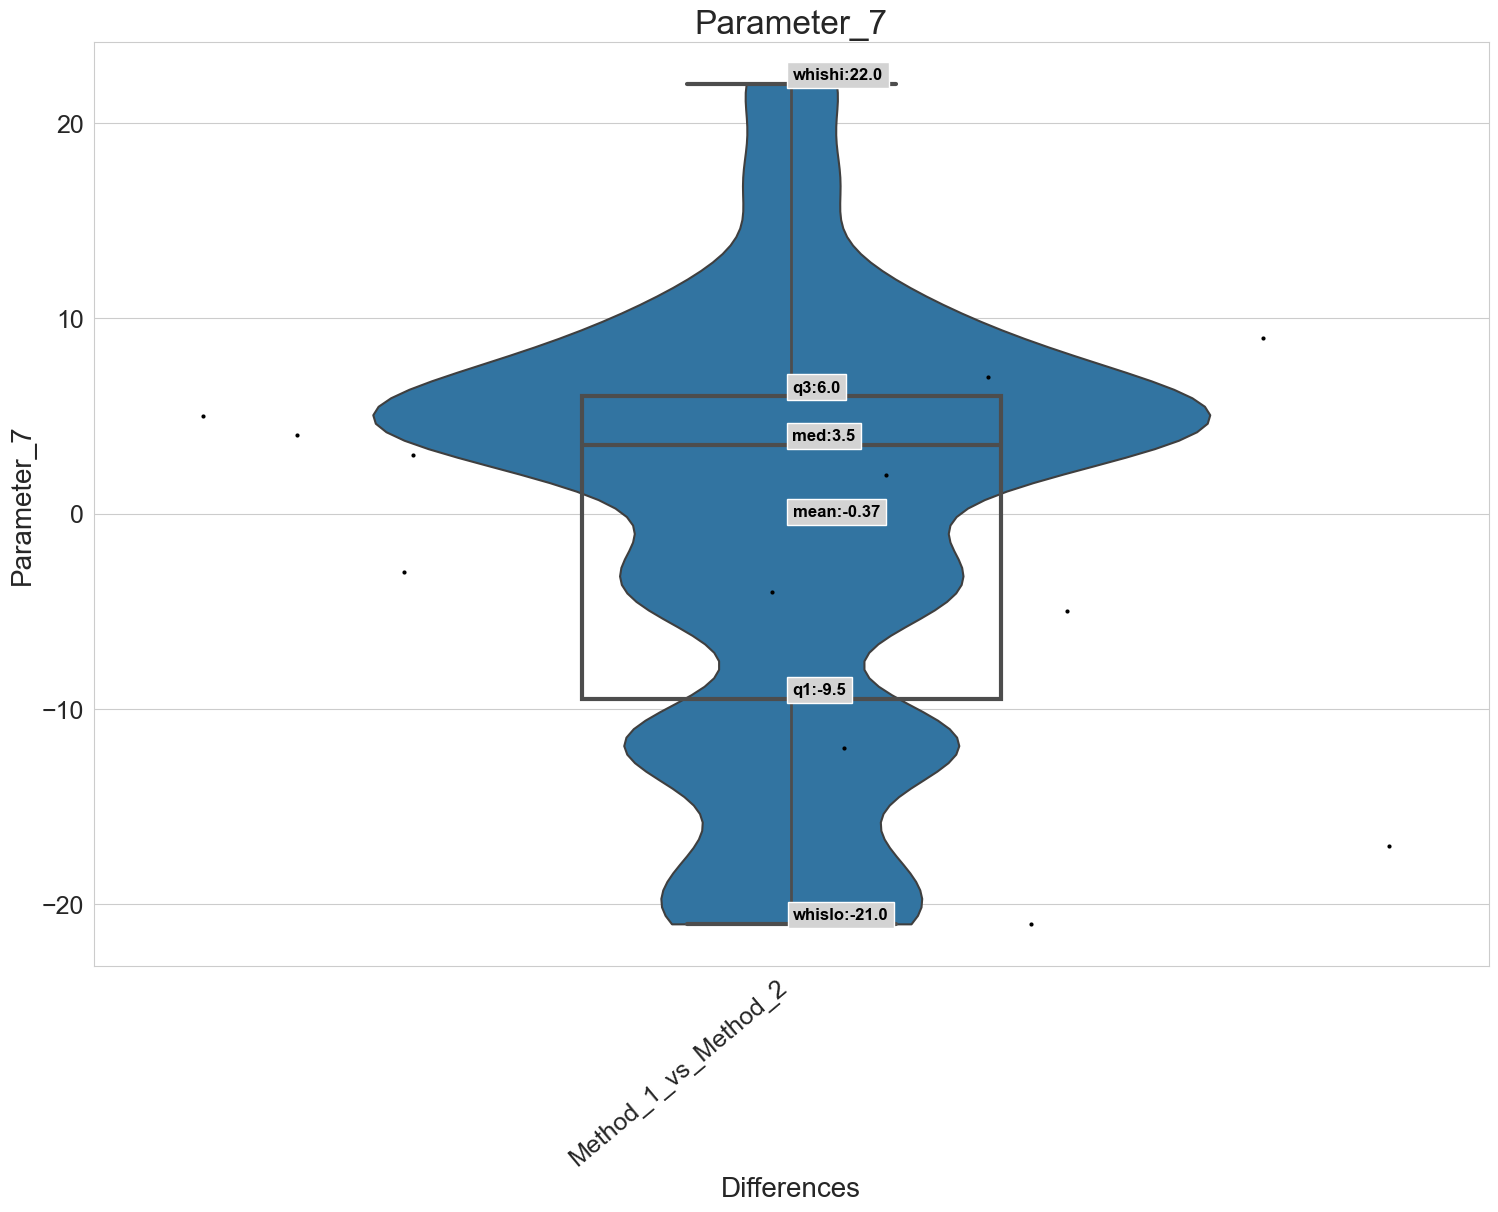

In [18]:
dsg.dist_plot(data=diff, dx='Differences', dy=list_variables, title=None ,
                hue=None, size =(18, 12), 
                save=True, folder=f'{fold}/{data_to_pull}/Differences_distribution')

##### Differences Distribution

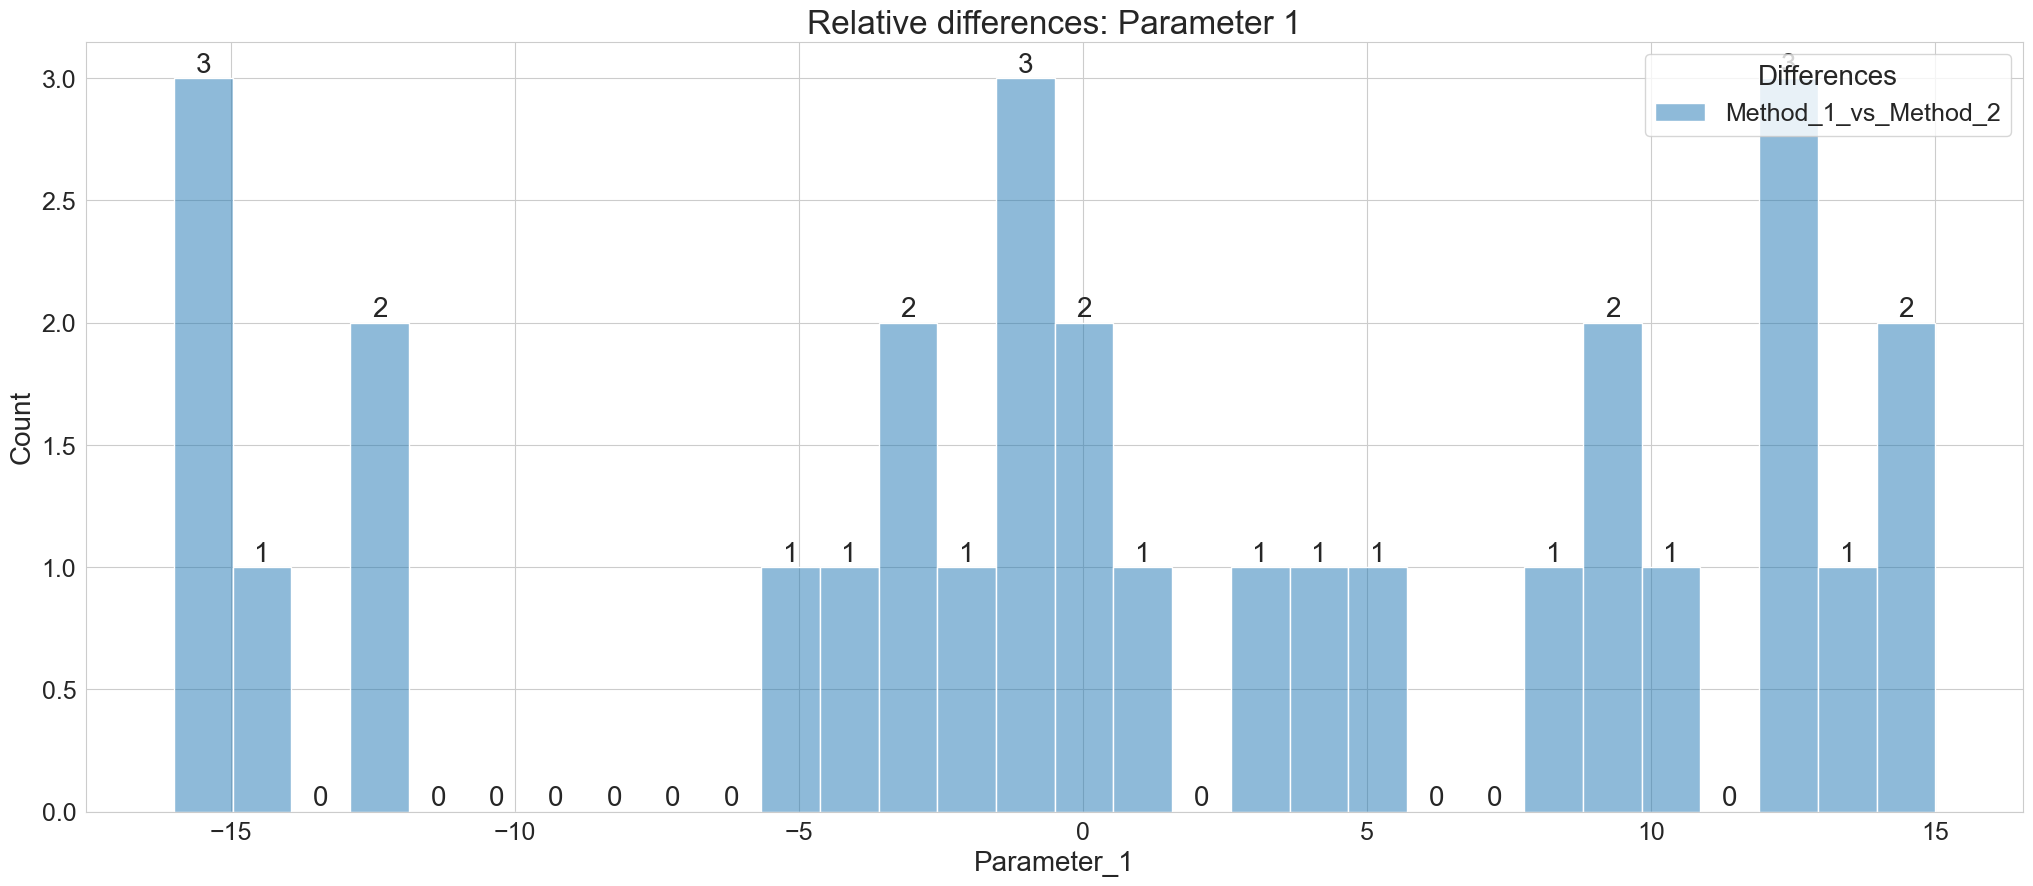

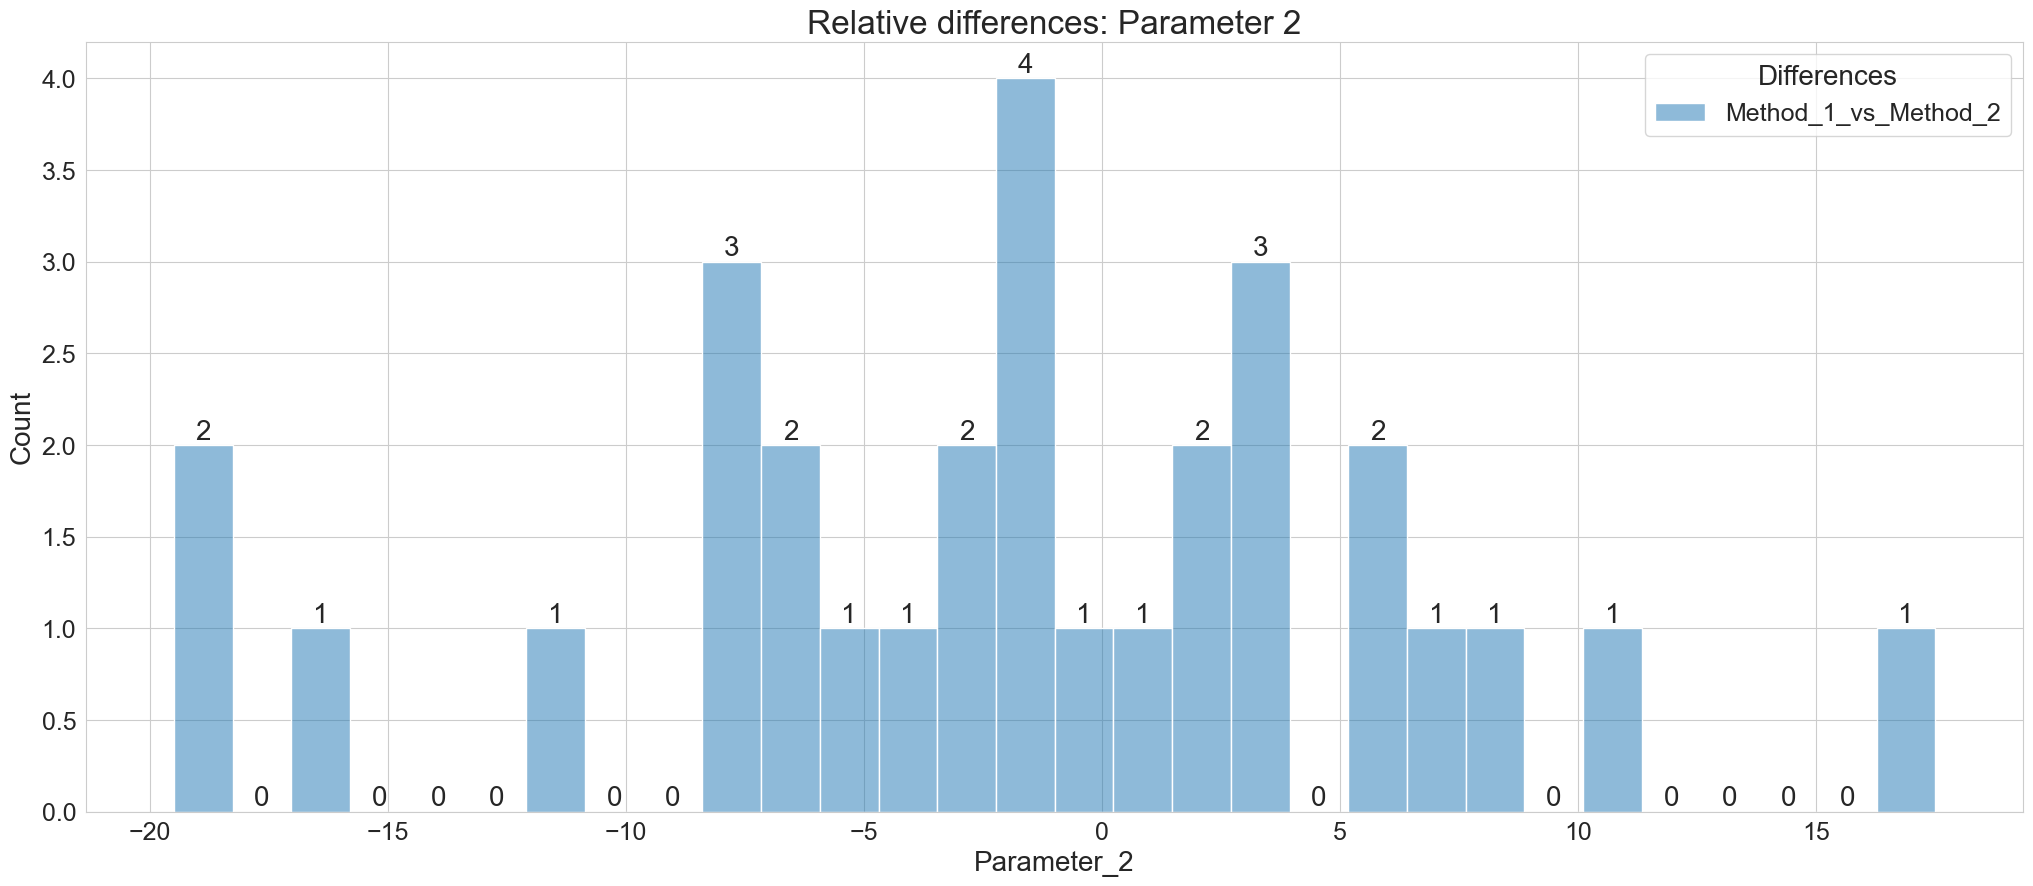

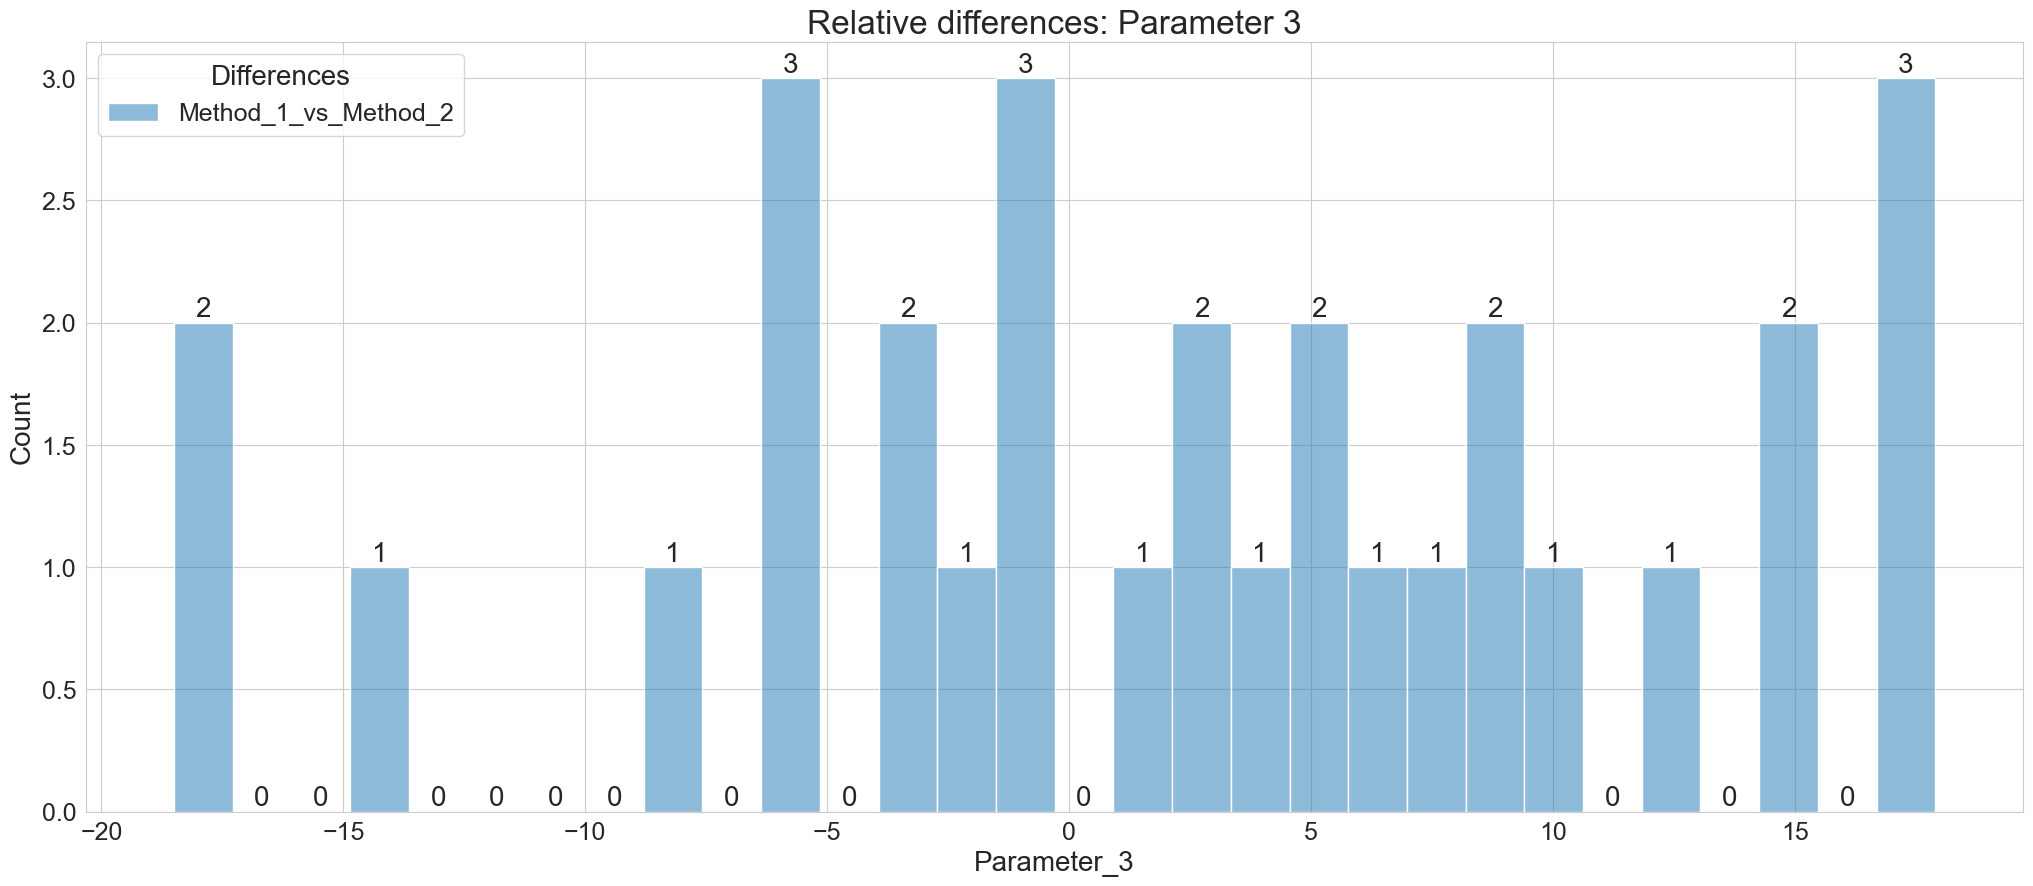

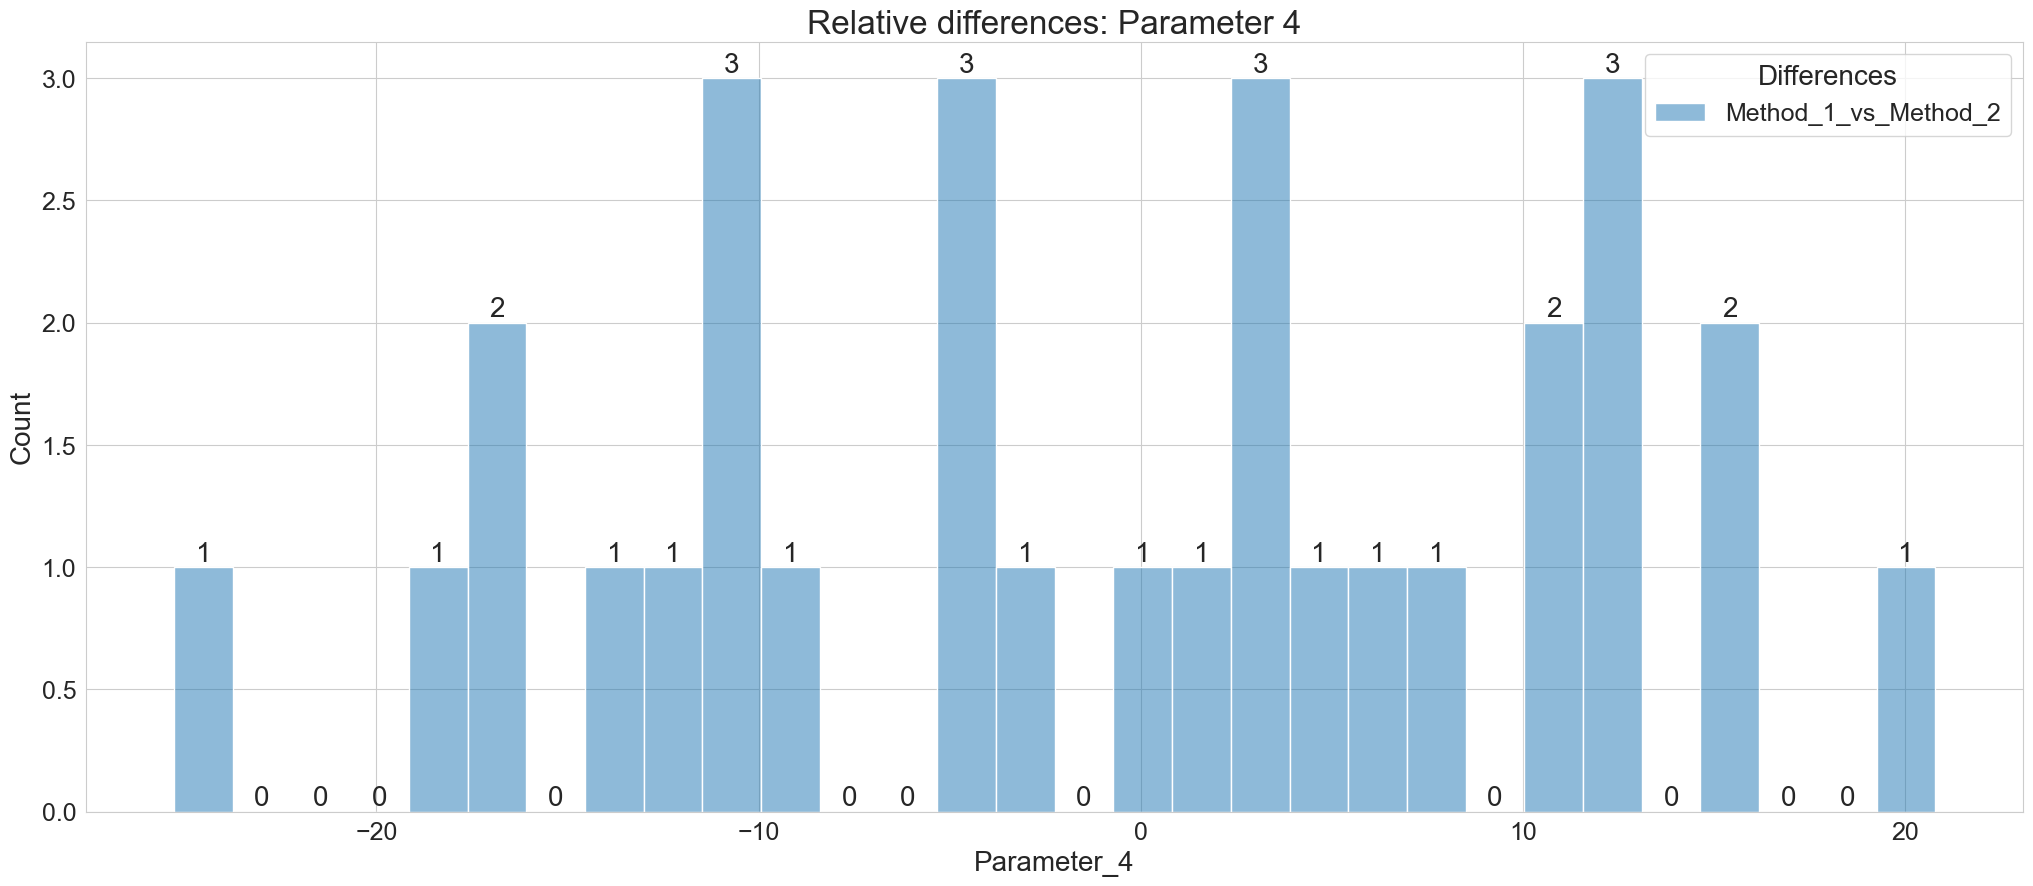

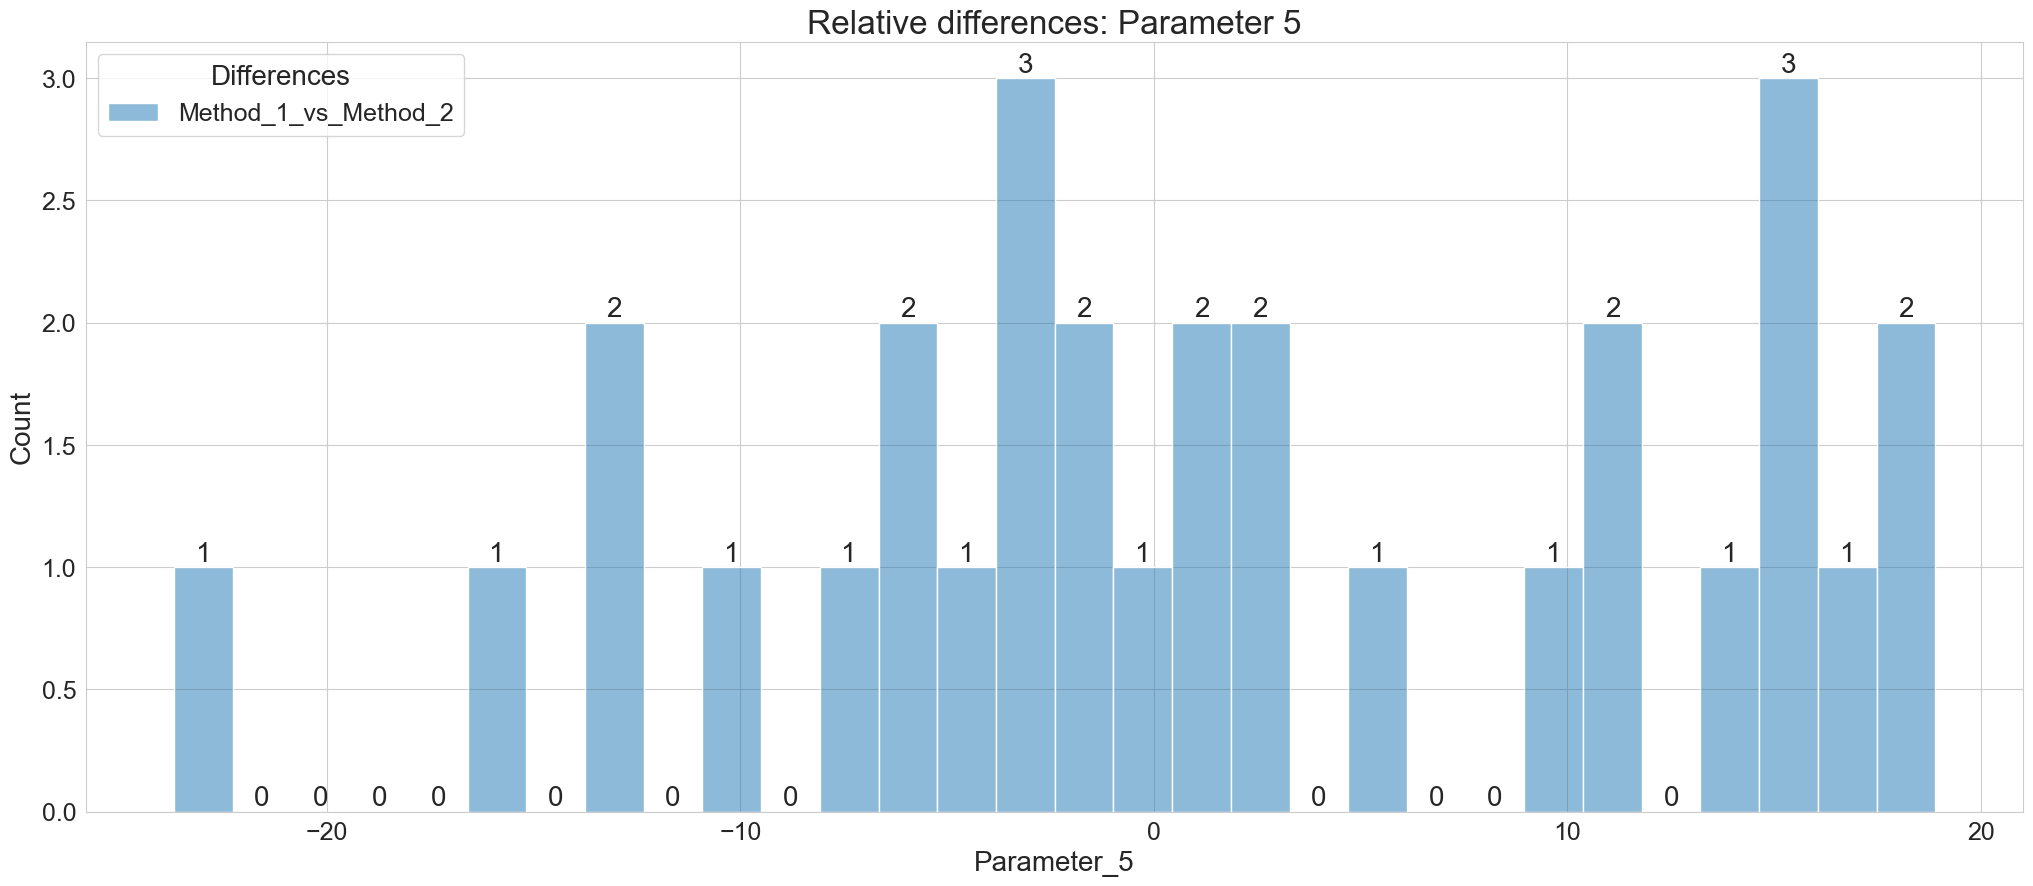

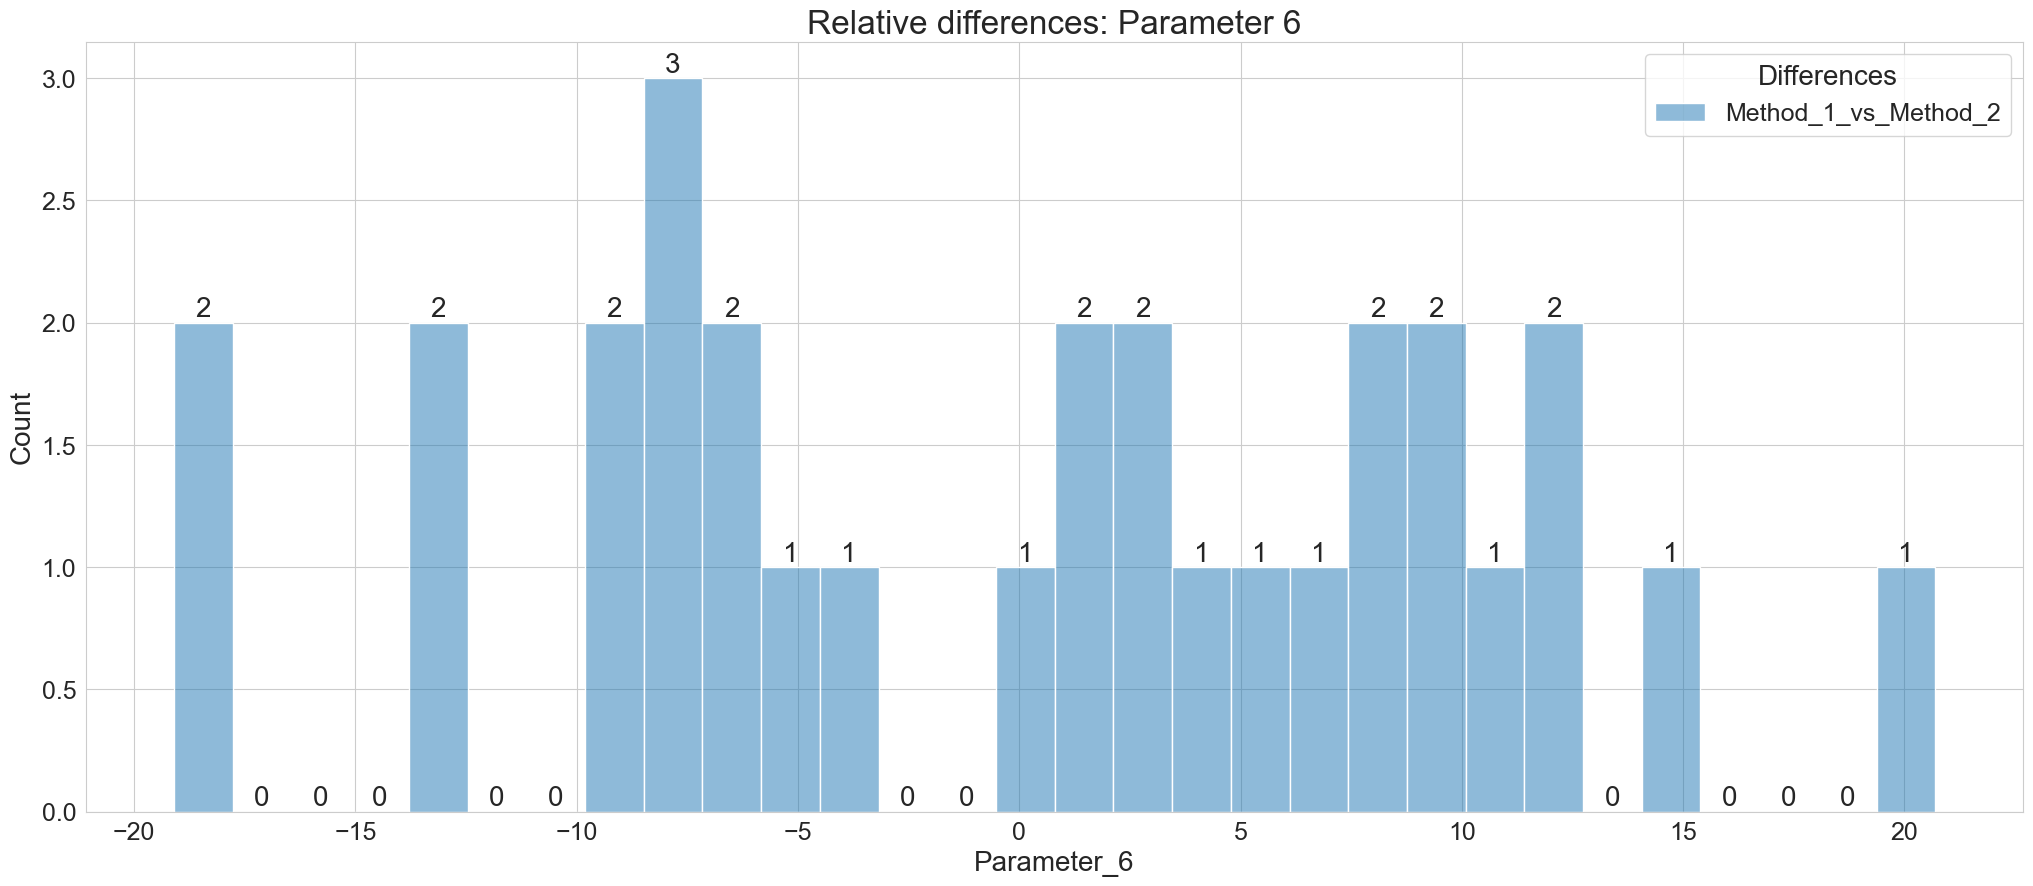

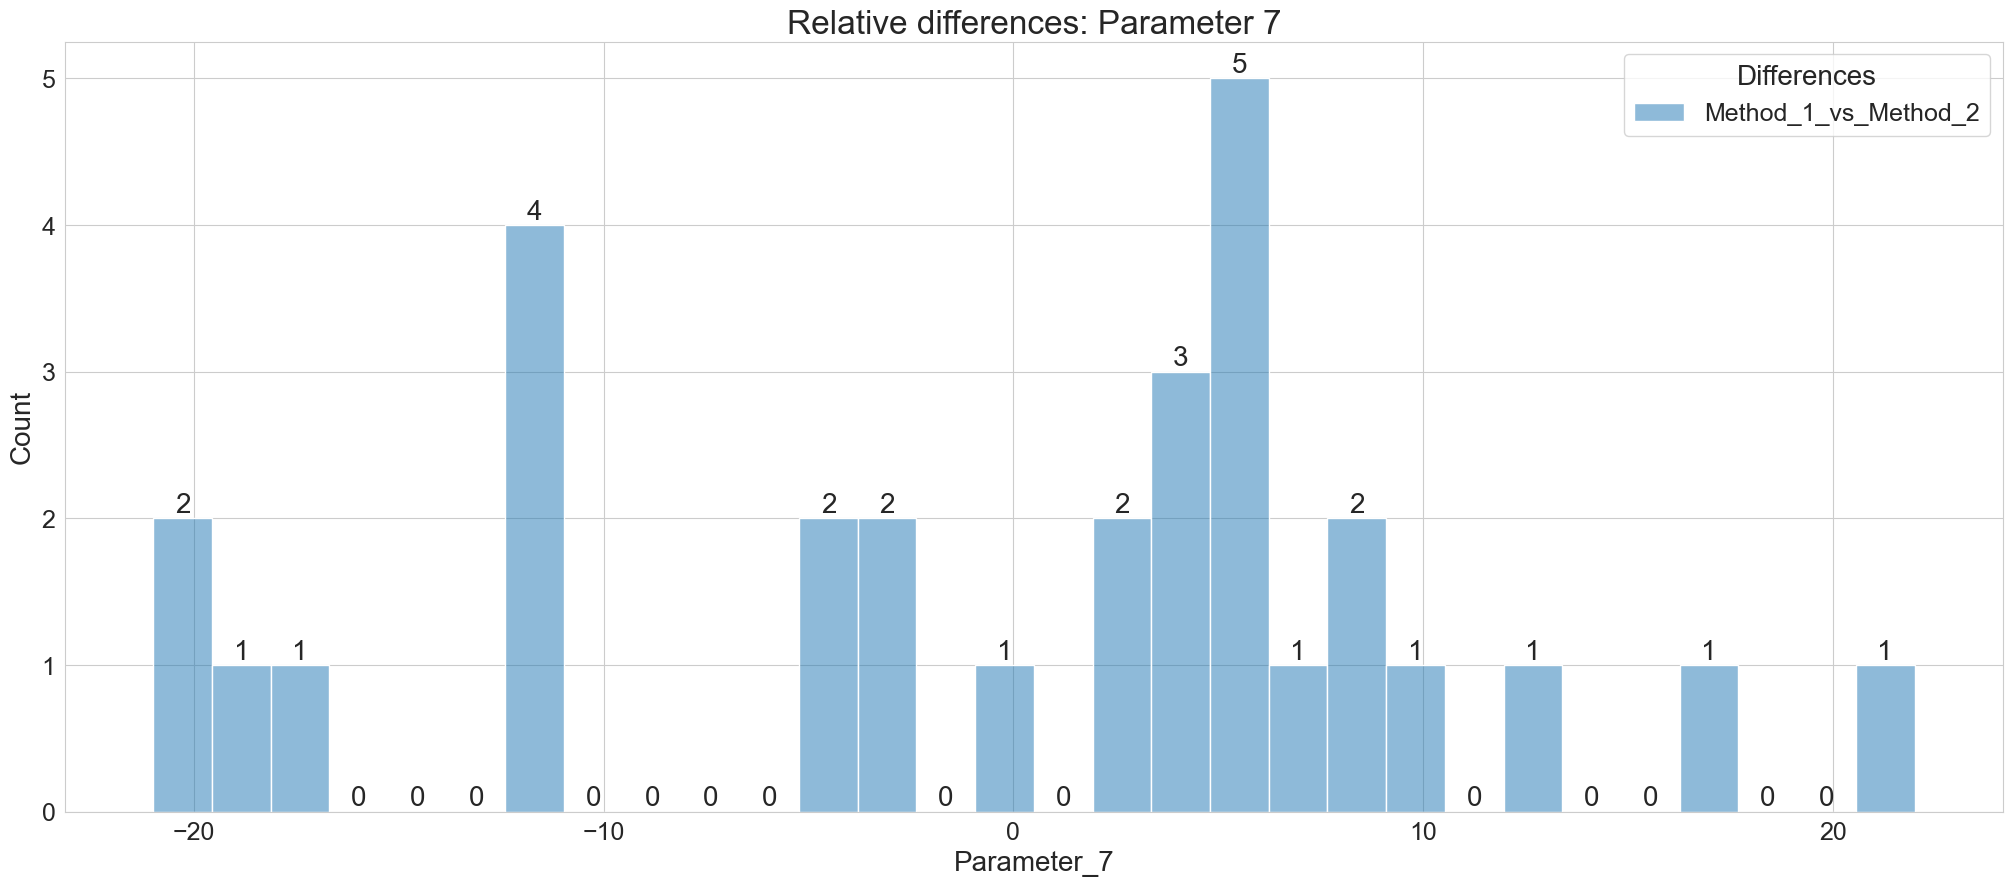

In [19]:
dsg.histogram_plot(data=diff, categories=list_variables, bins=30, 
                hue='Differences', kde=False, 
                save=True, folder=f'{fold}/{data_to_pull}')

##### Intra-measurement variation

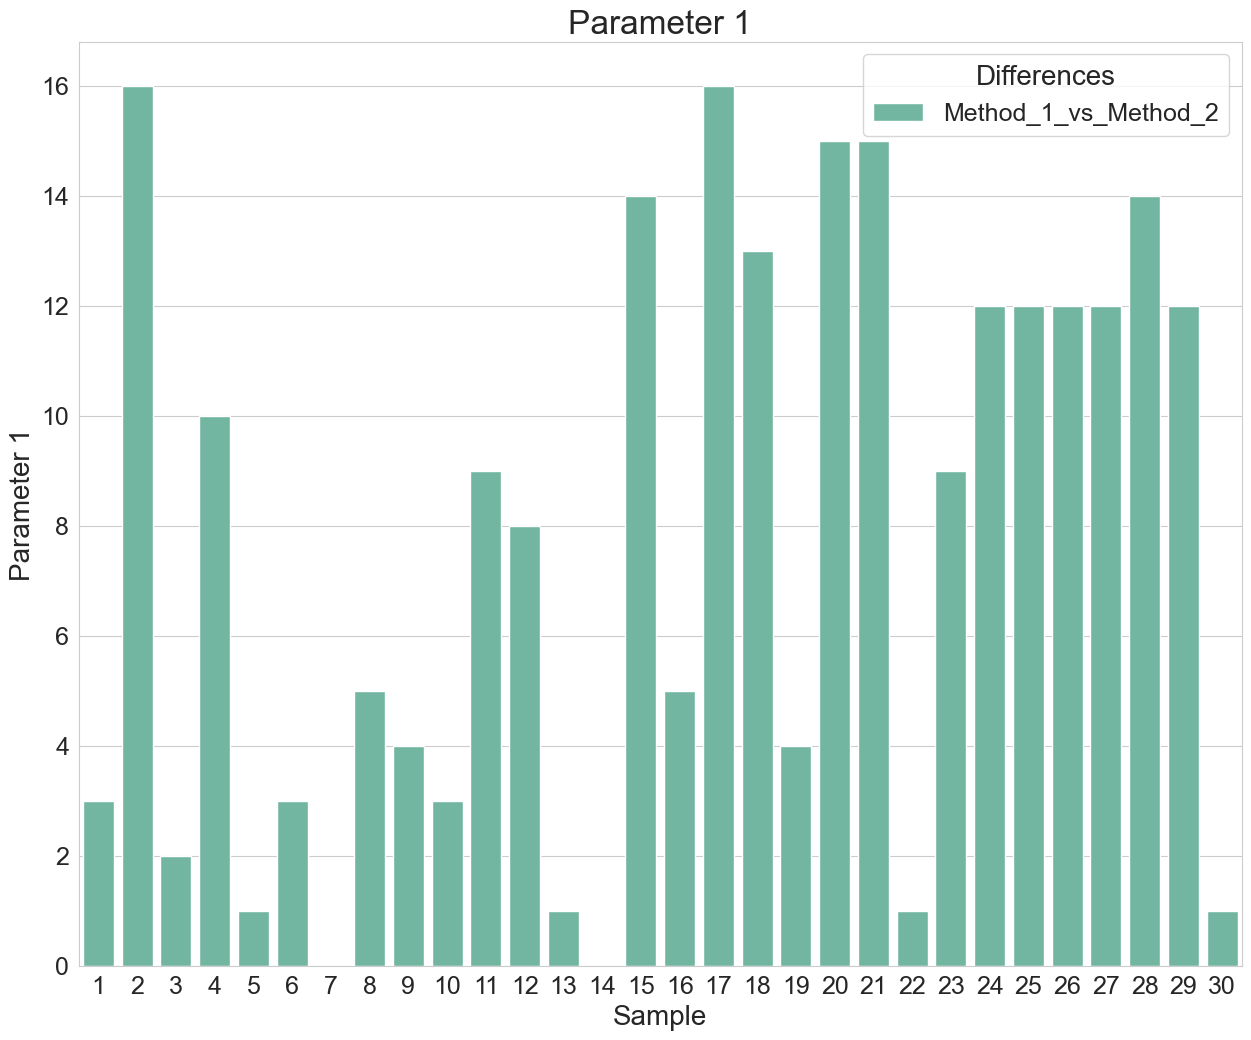

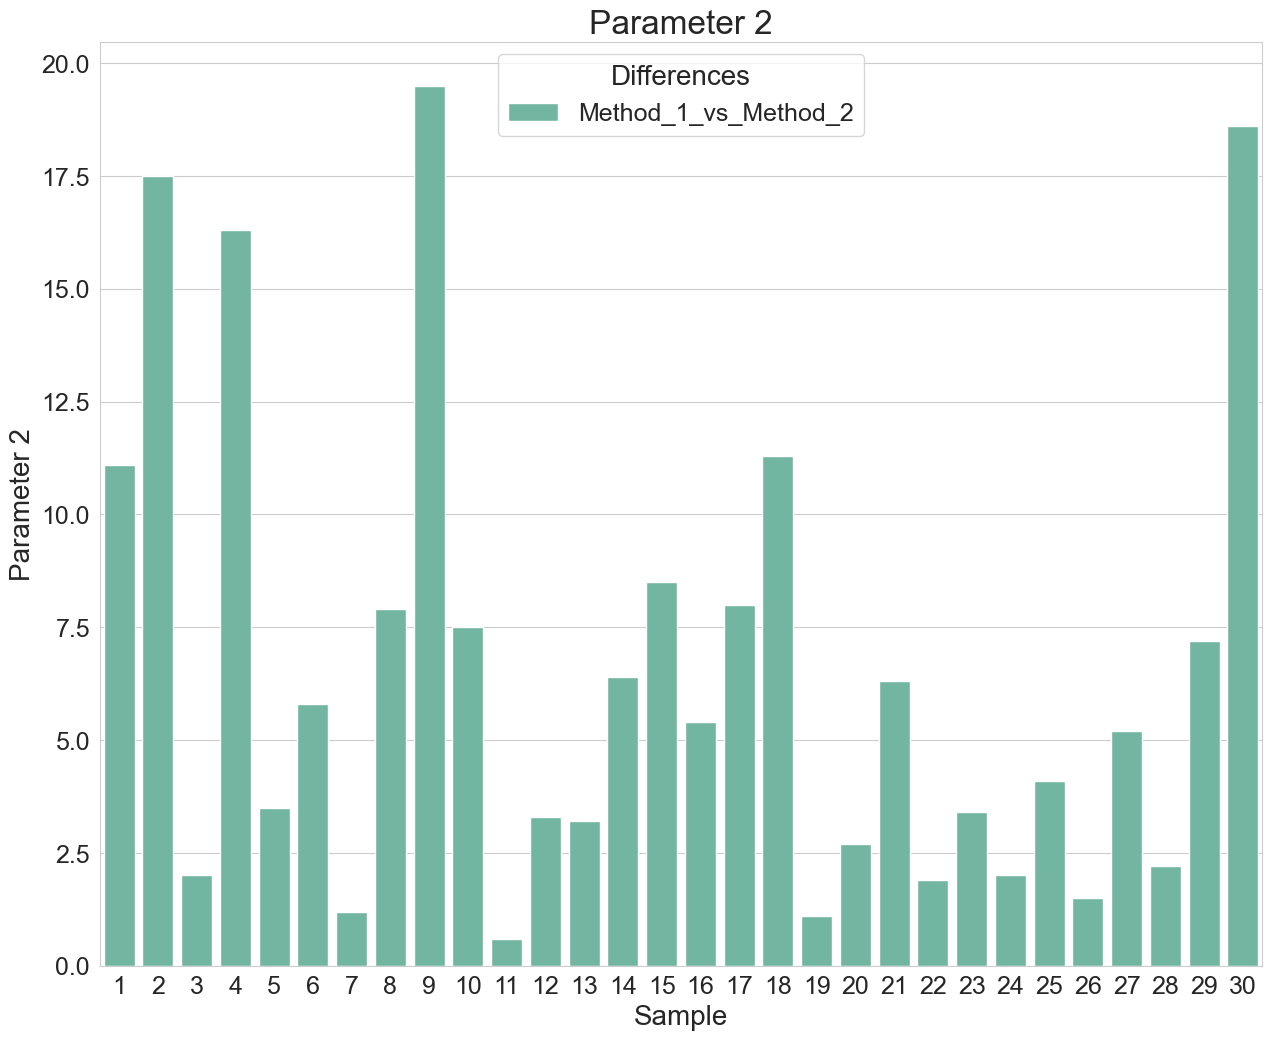

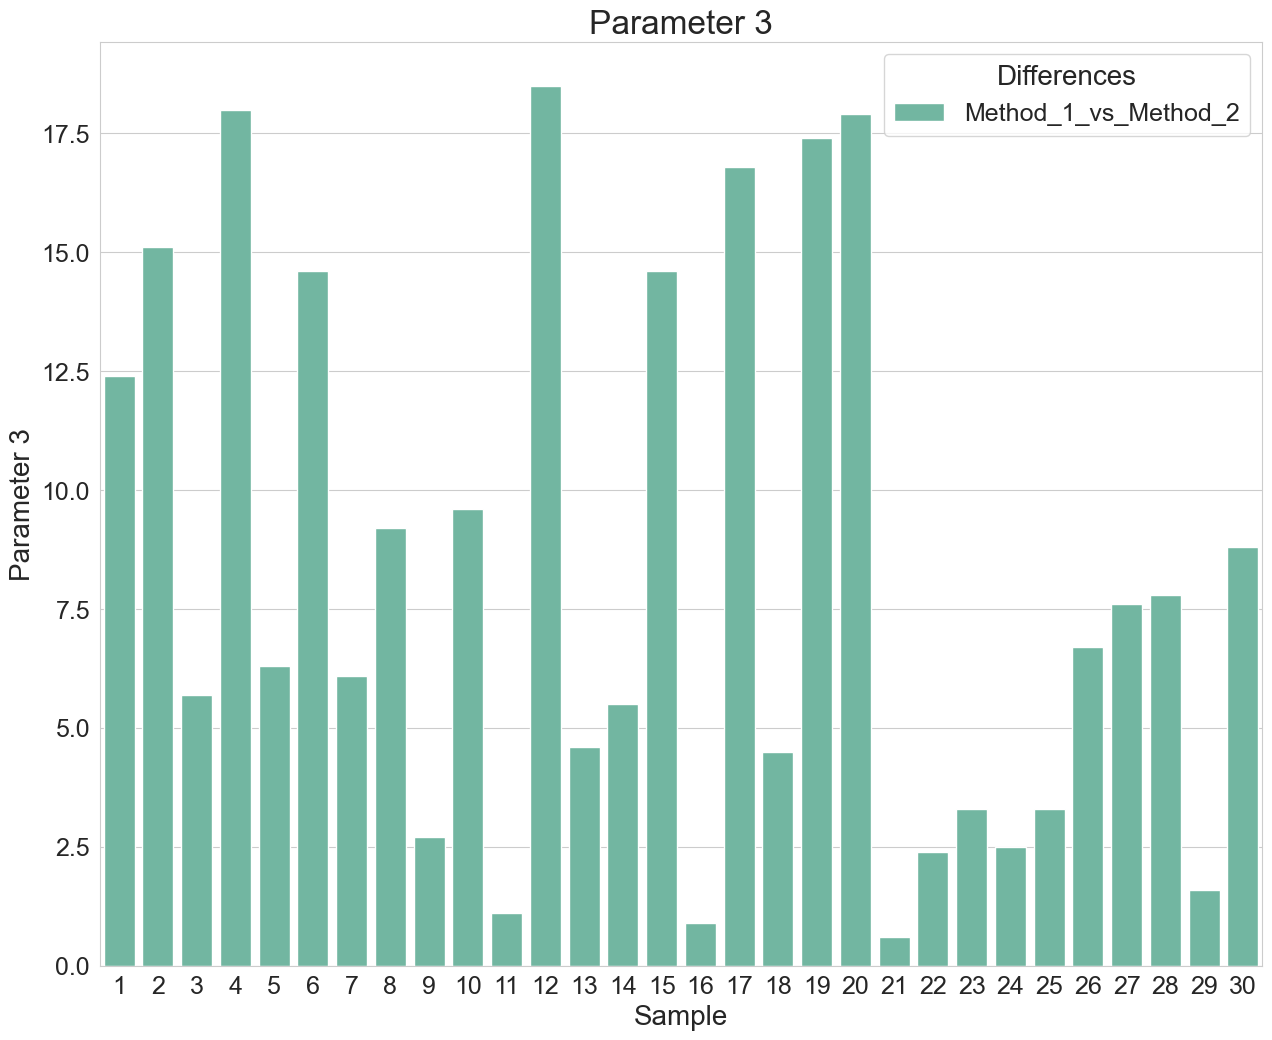

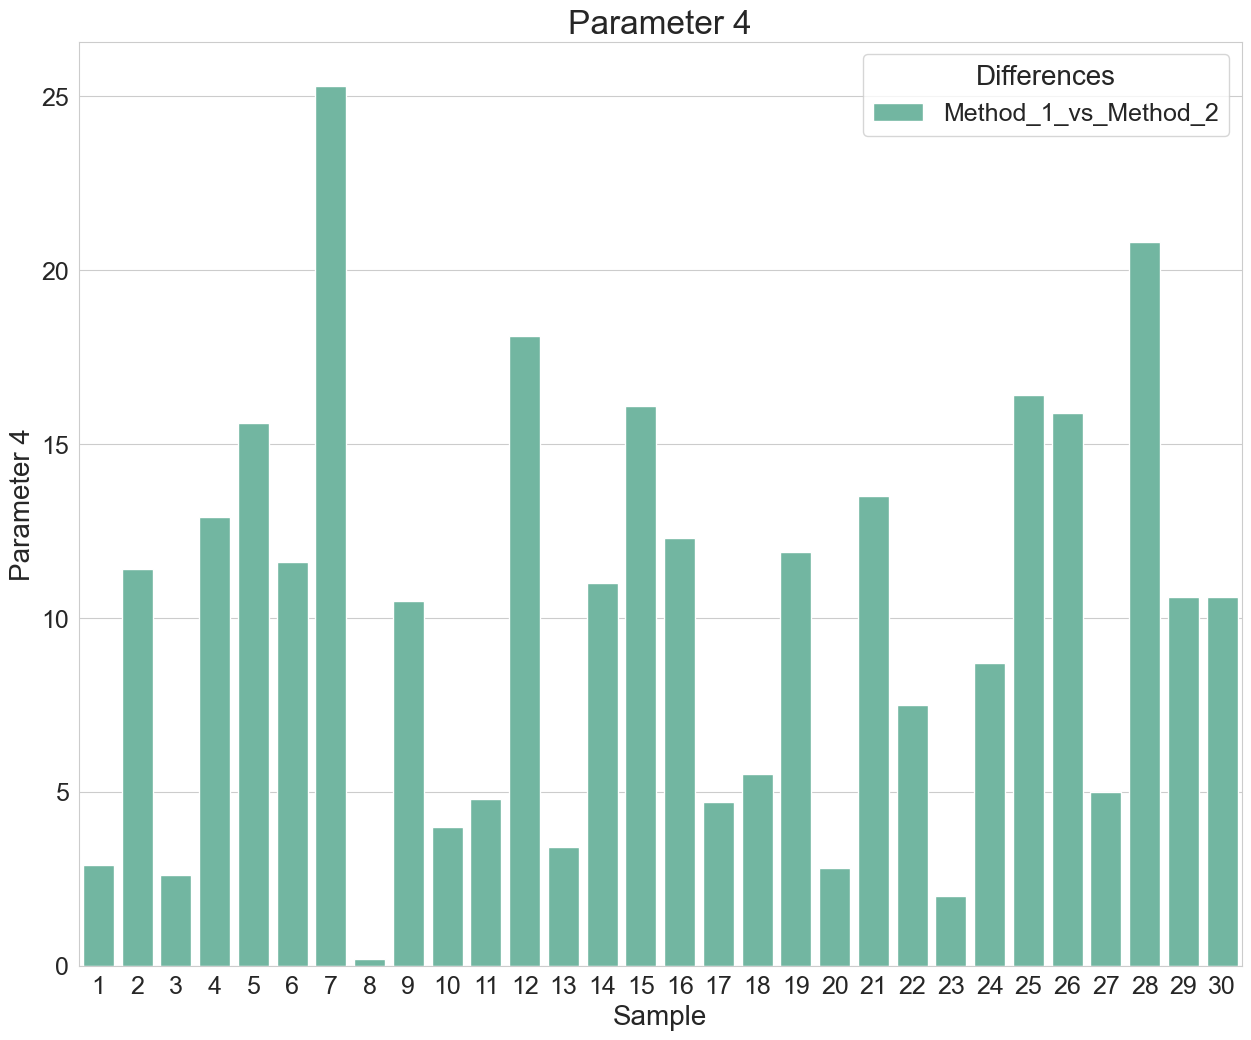

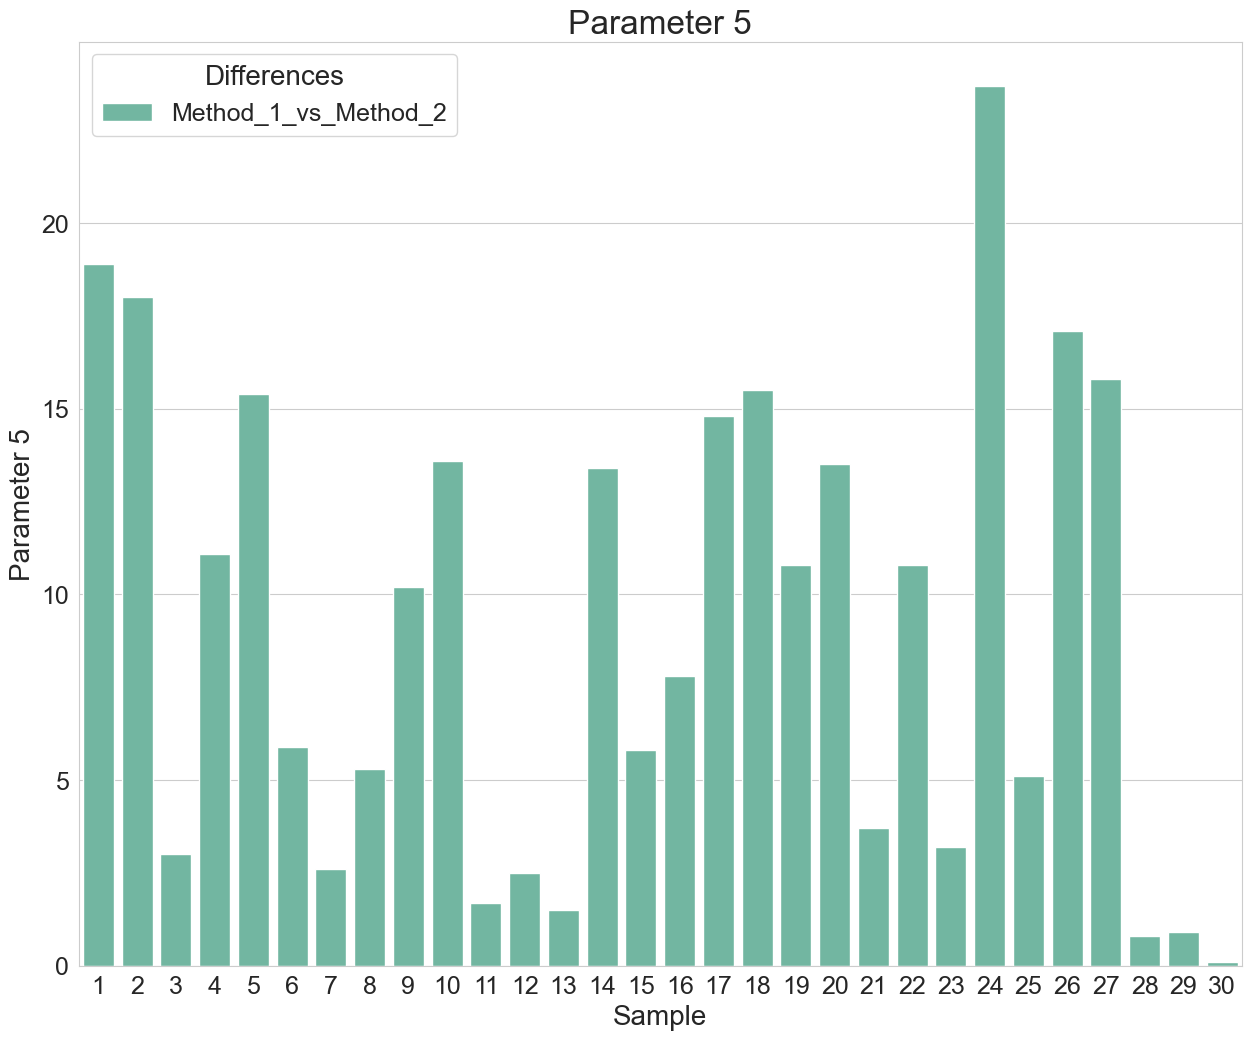

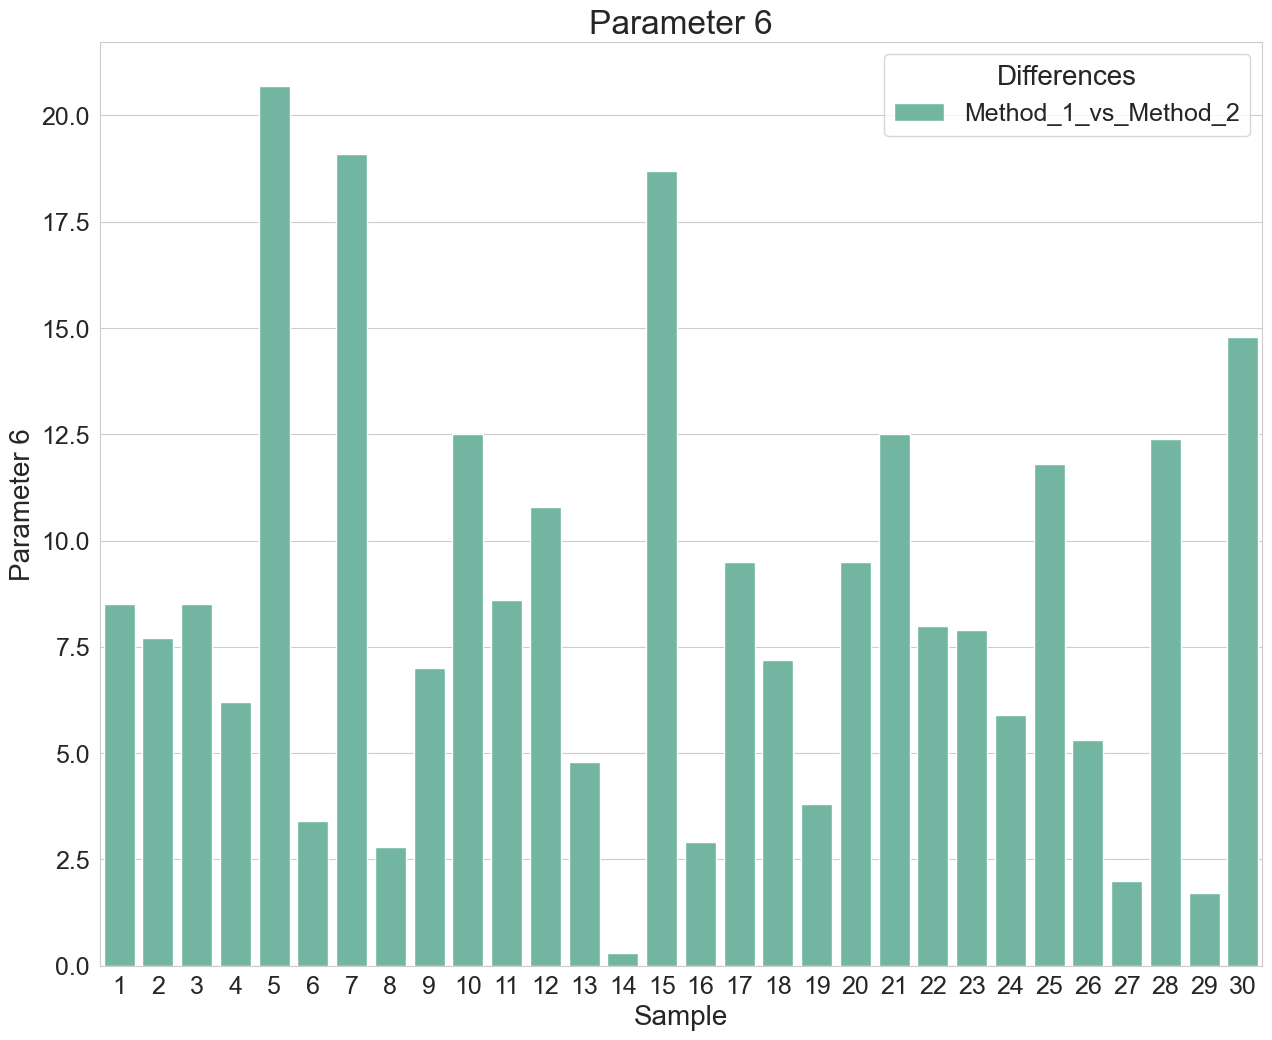

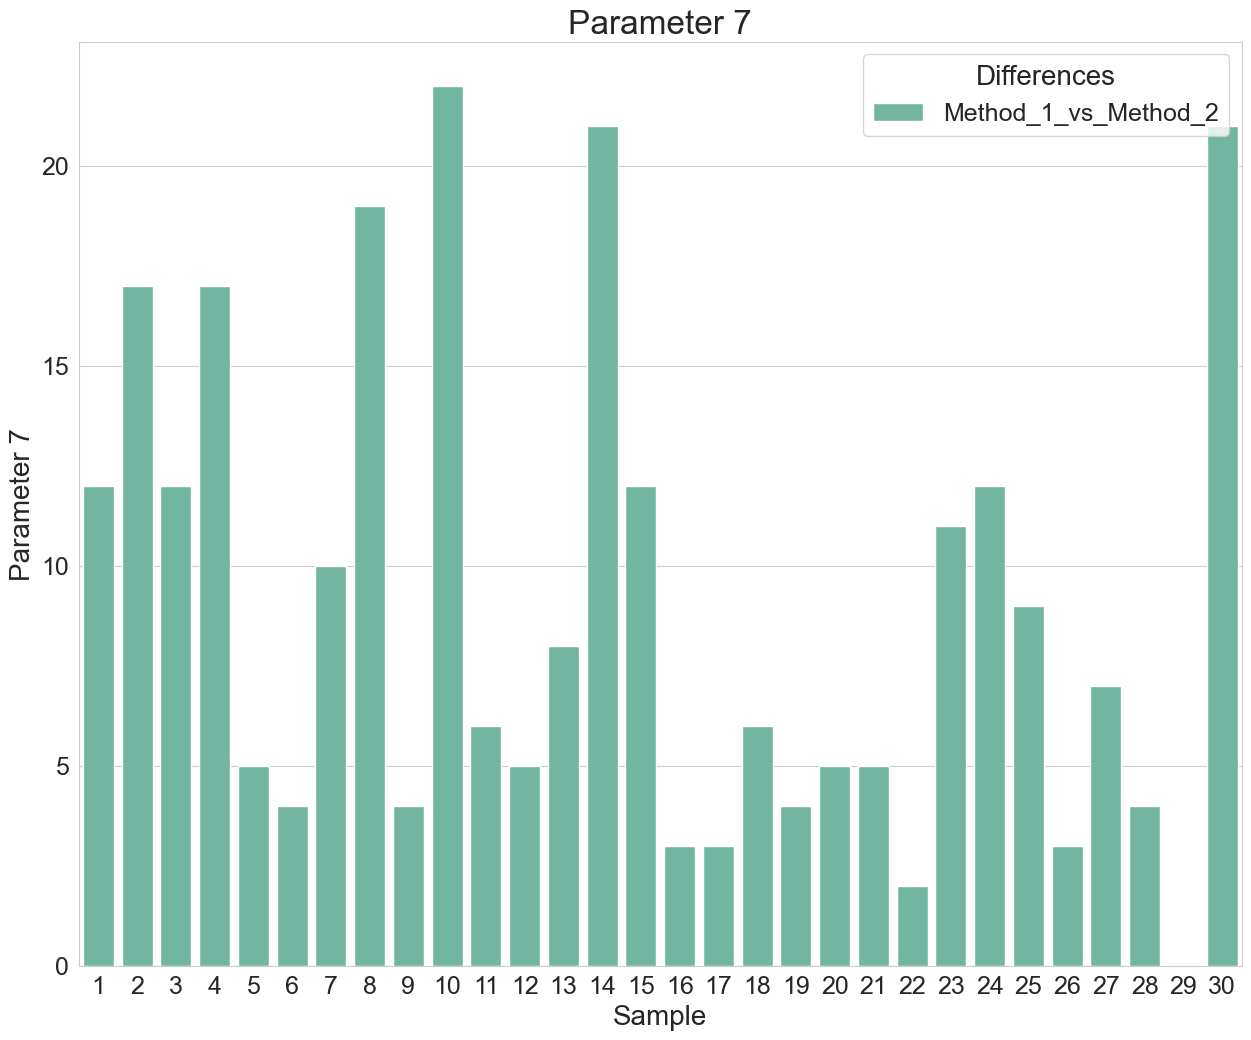

In [20]:
#review this functions
dsg.bar_plot(ci=CI, data=diff_abs, x=ad.ds_diff_bar_plot[data_to_pull], 
                categories=list_variables, hue='Differences',
                save=True, folder=f'{fold}/{data_to_pull}/bar_plot')

##### Outliers representation

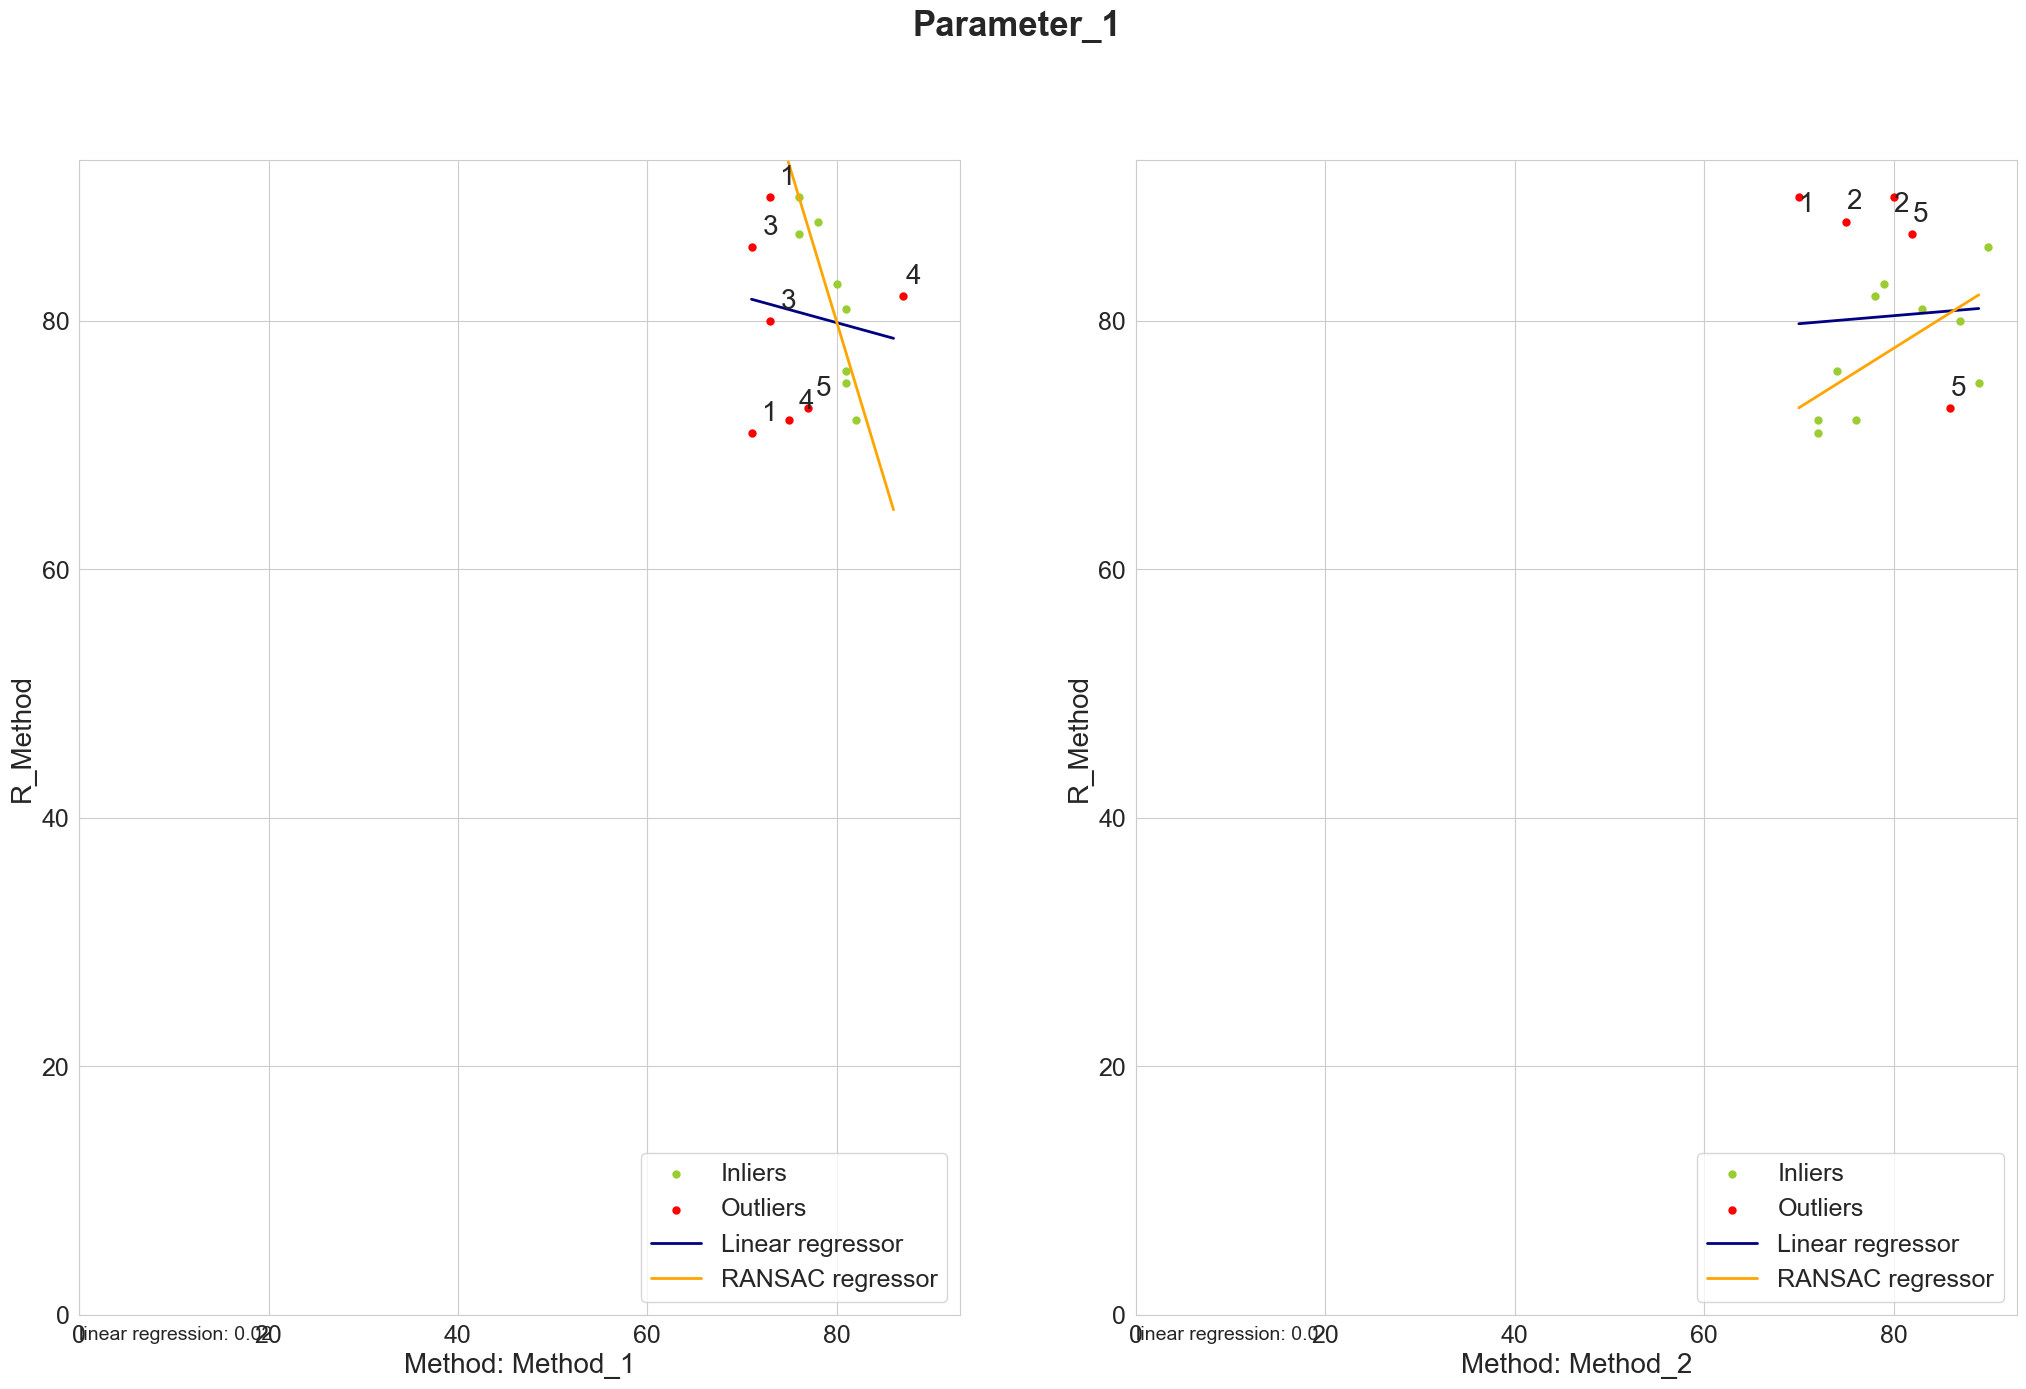

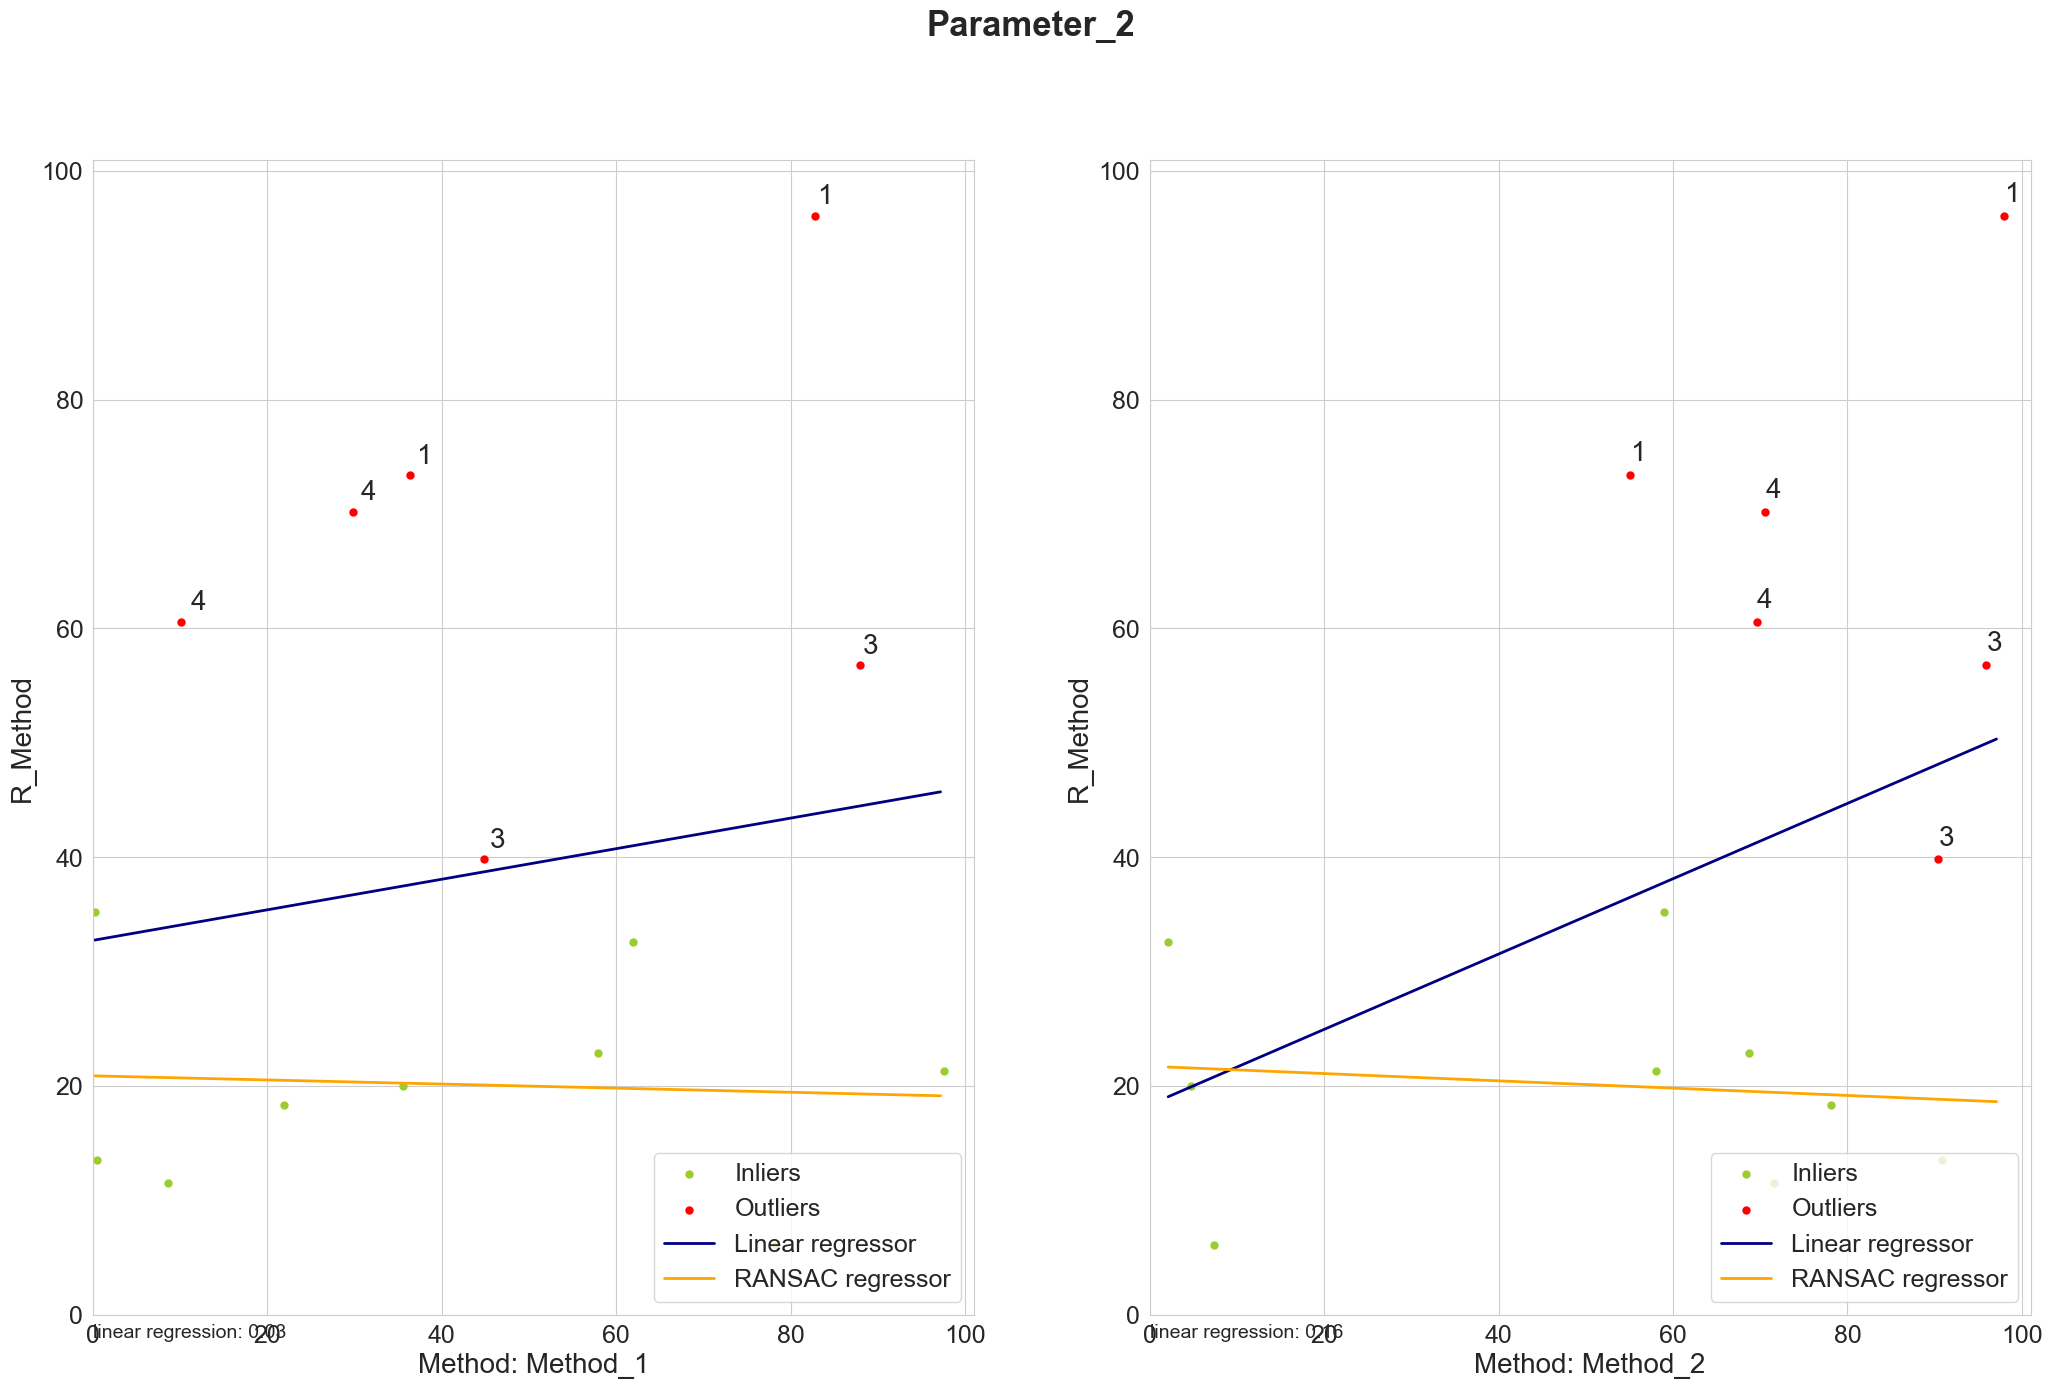

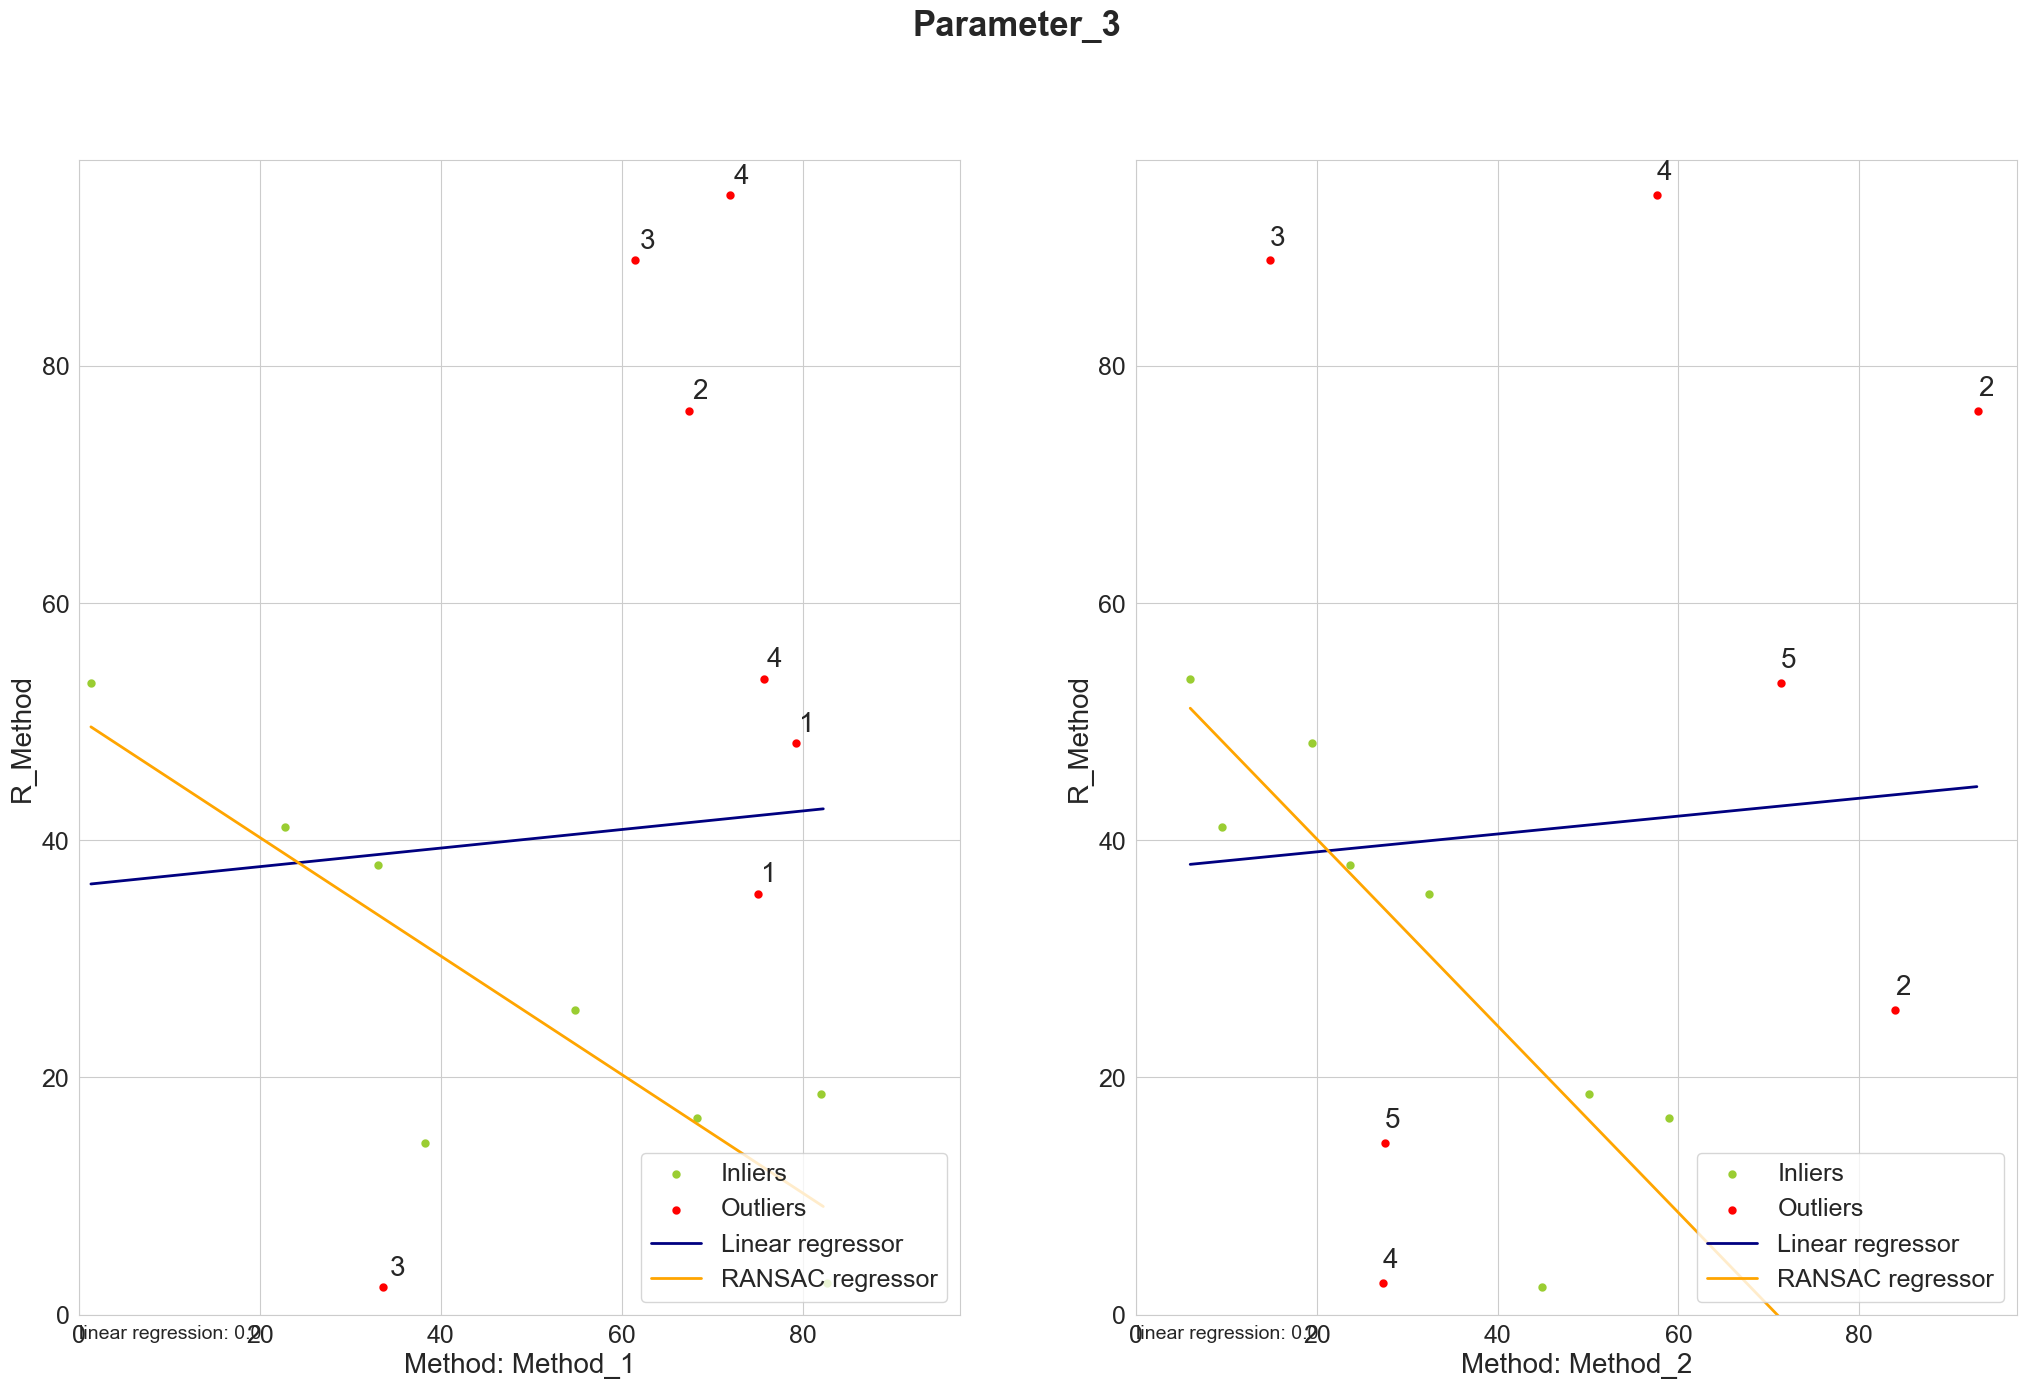

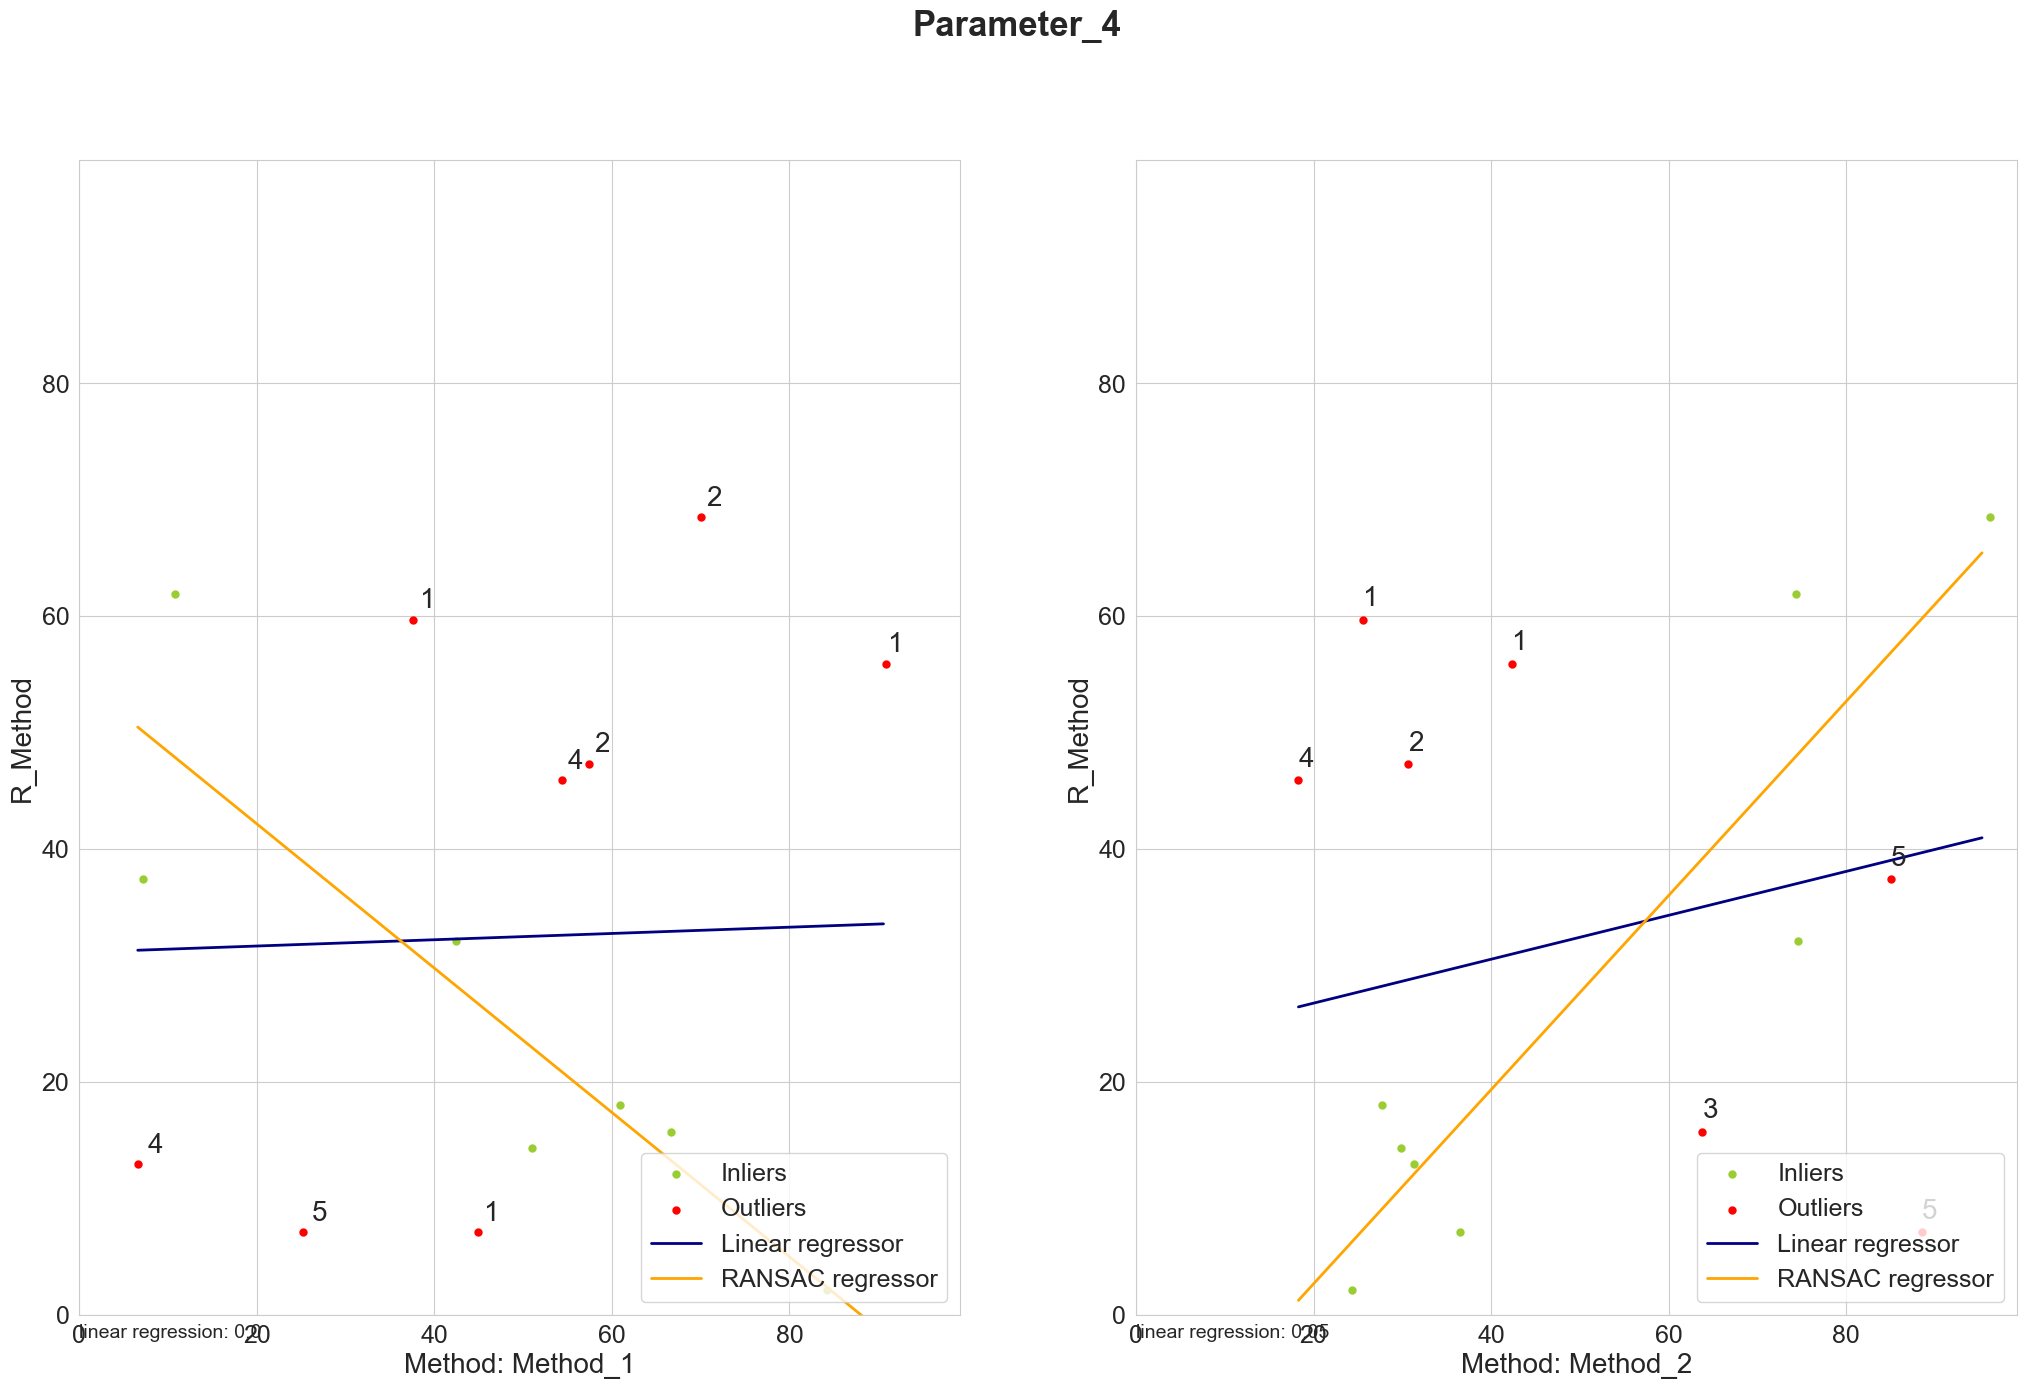

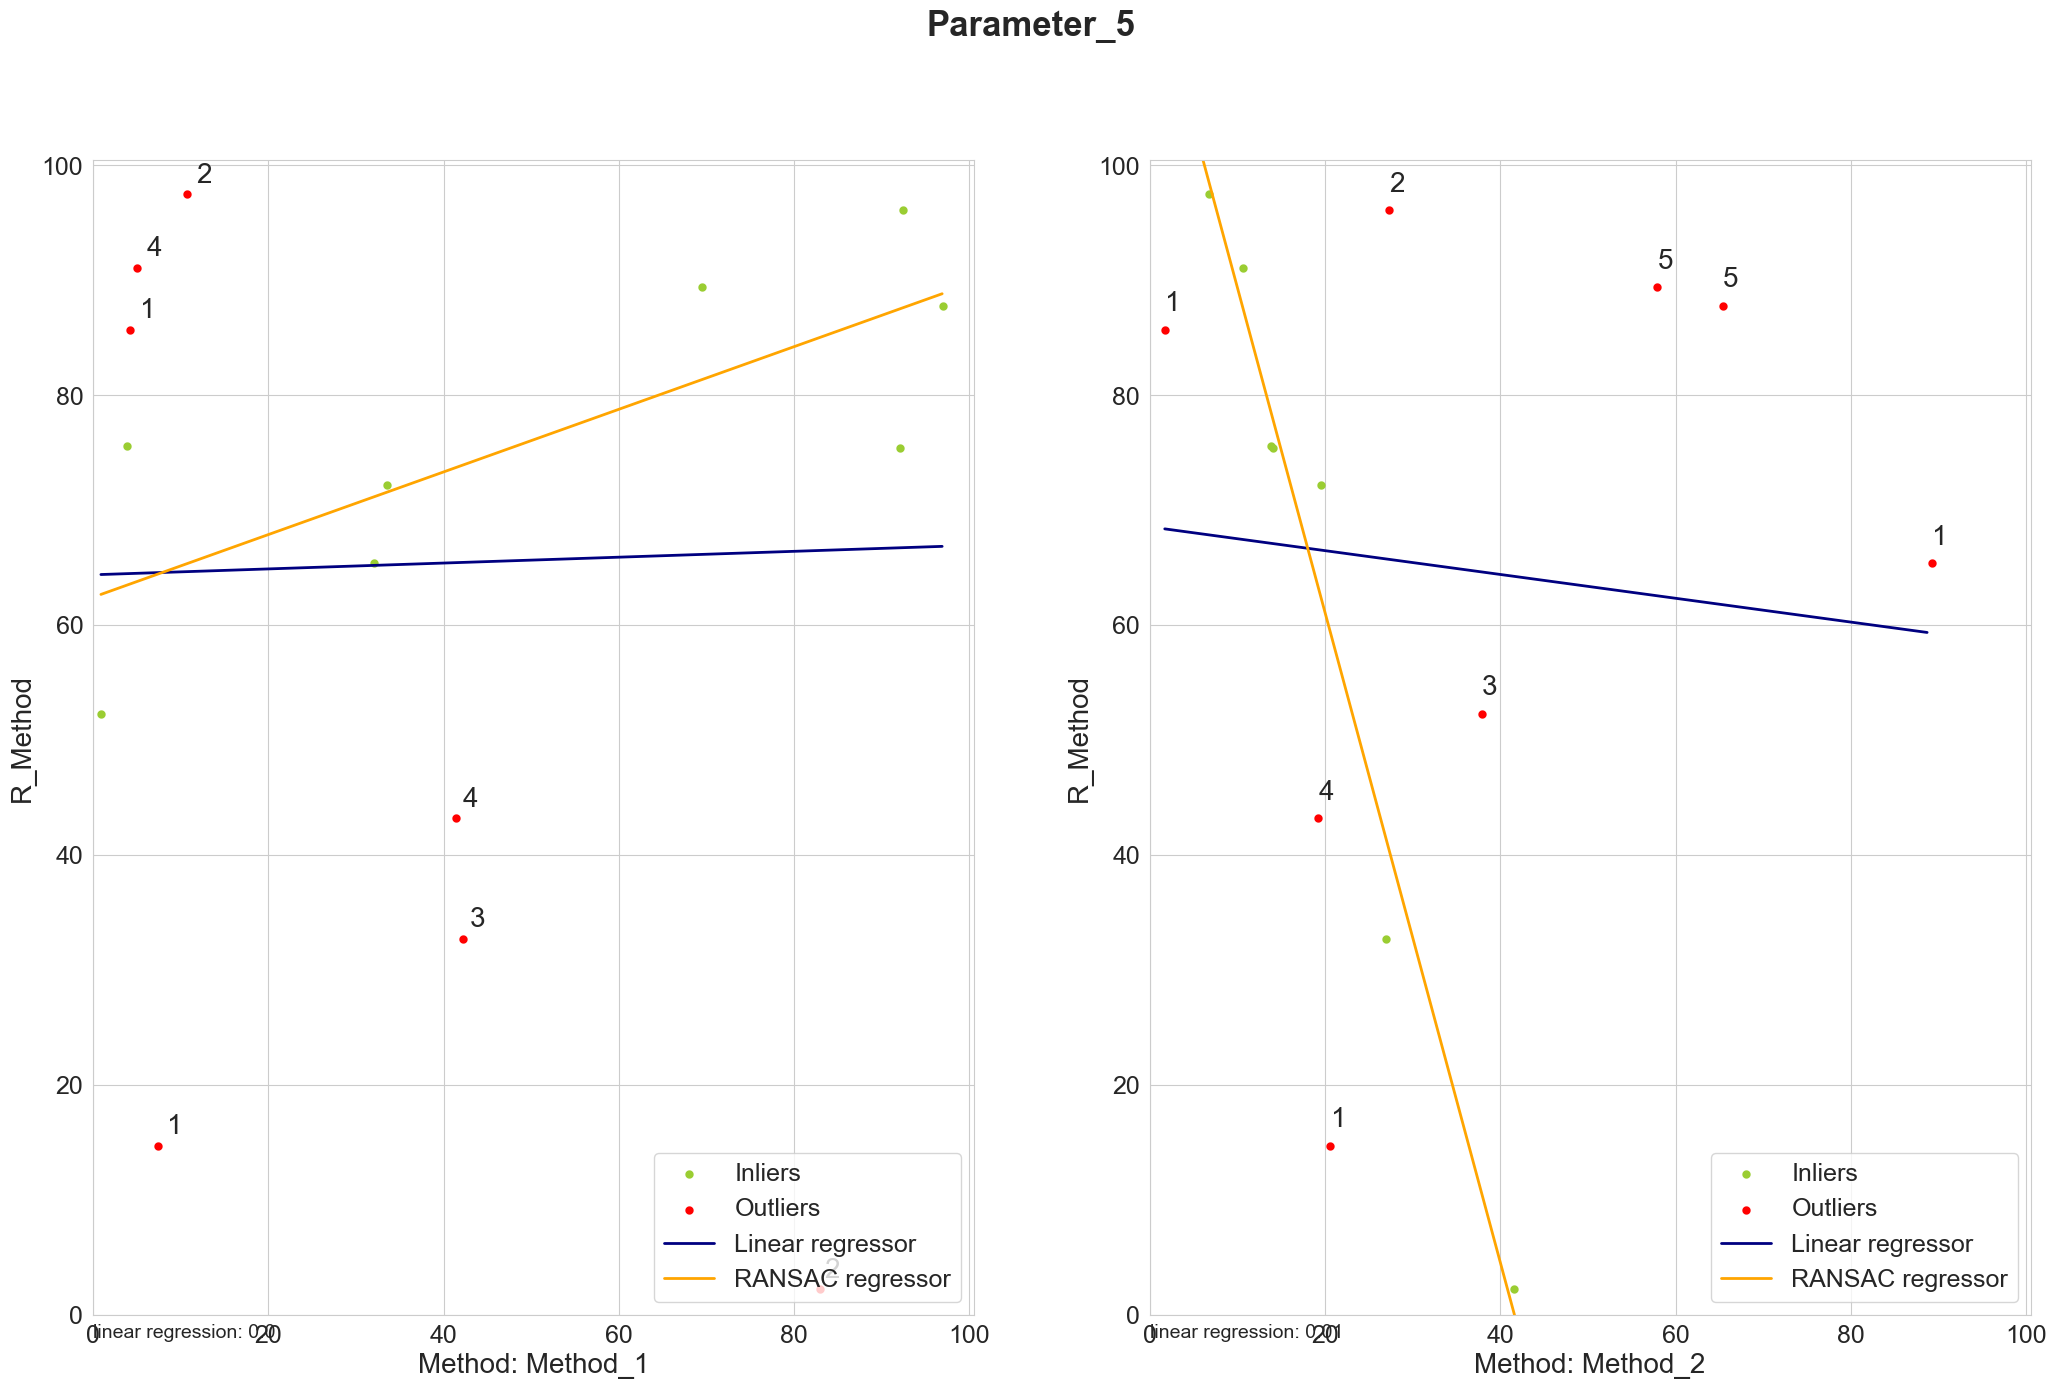

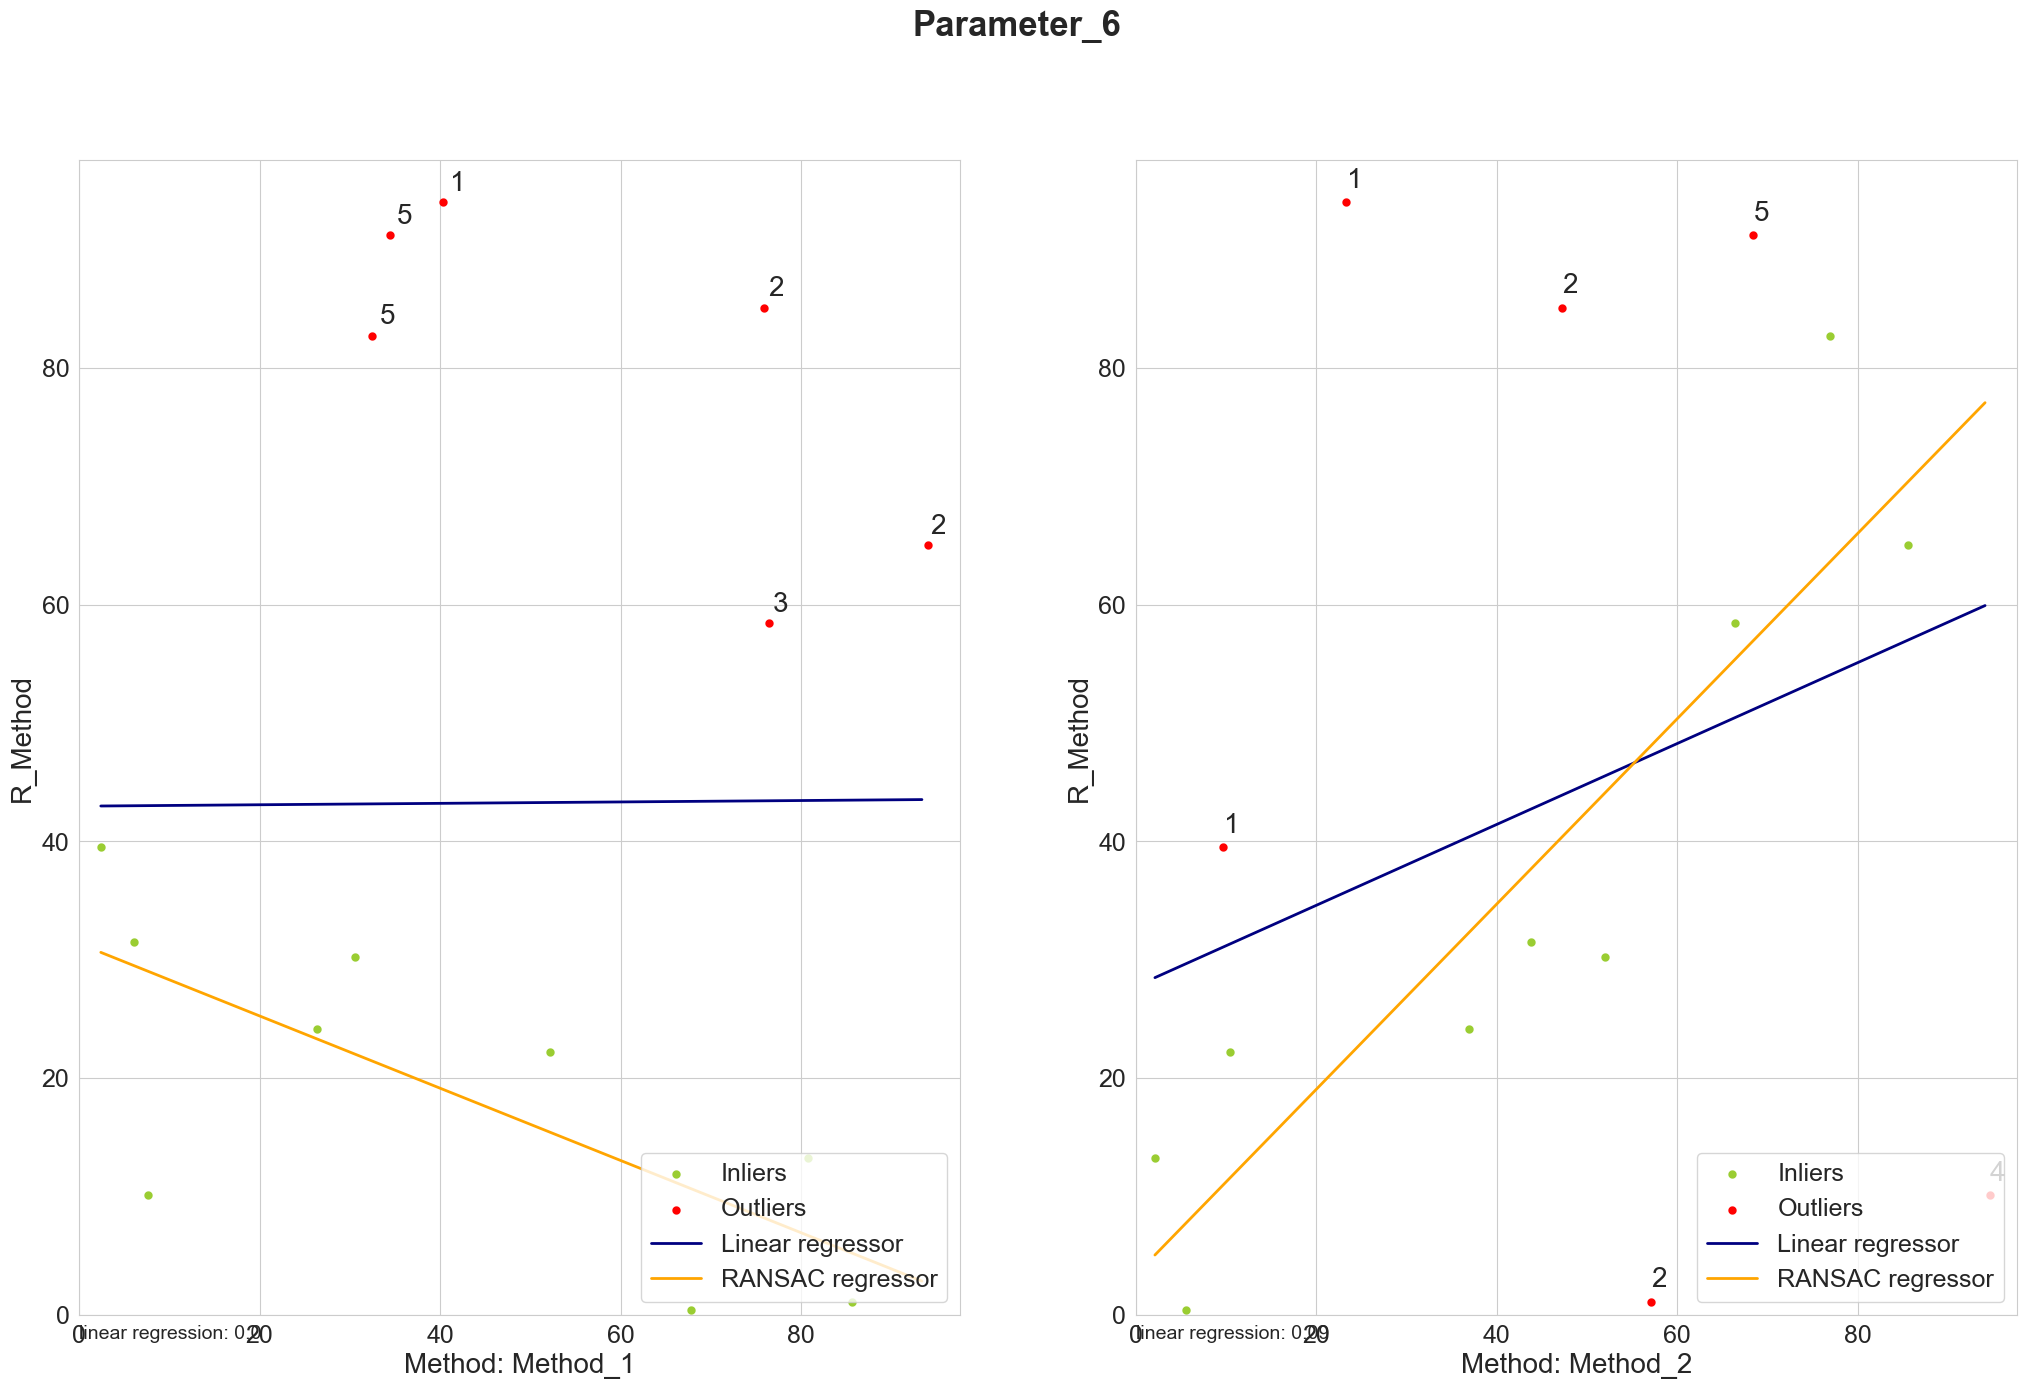

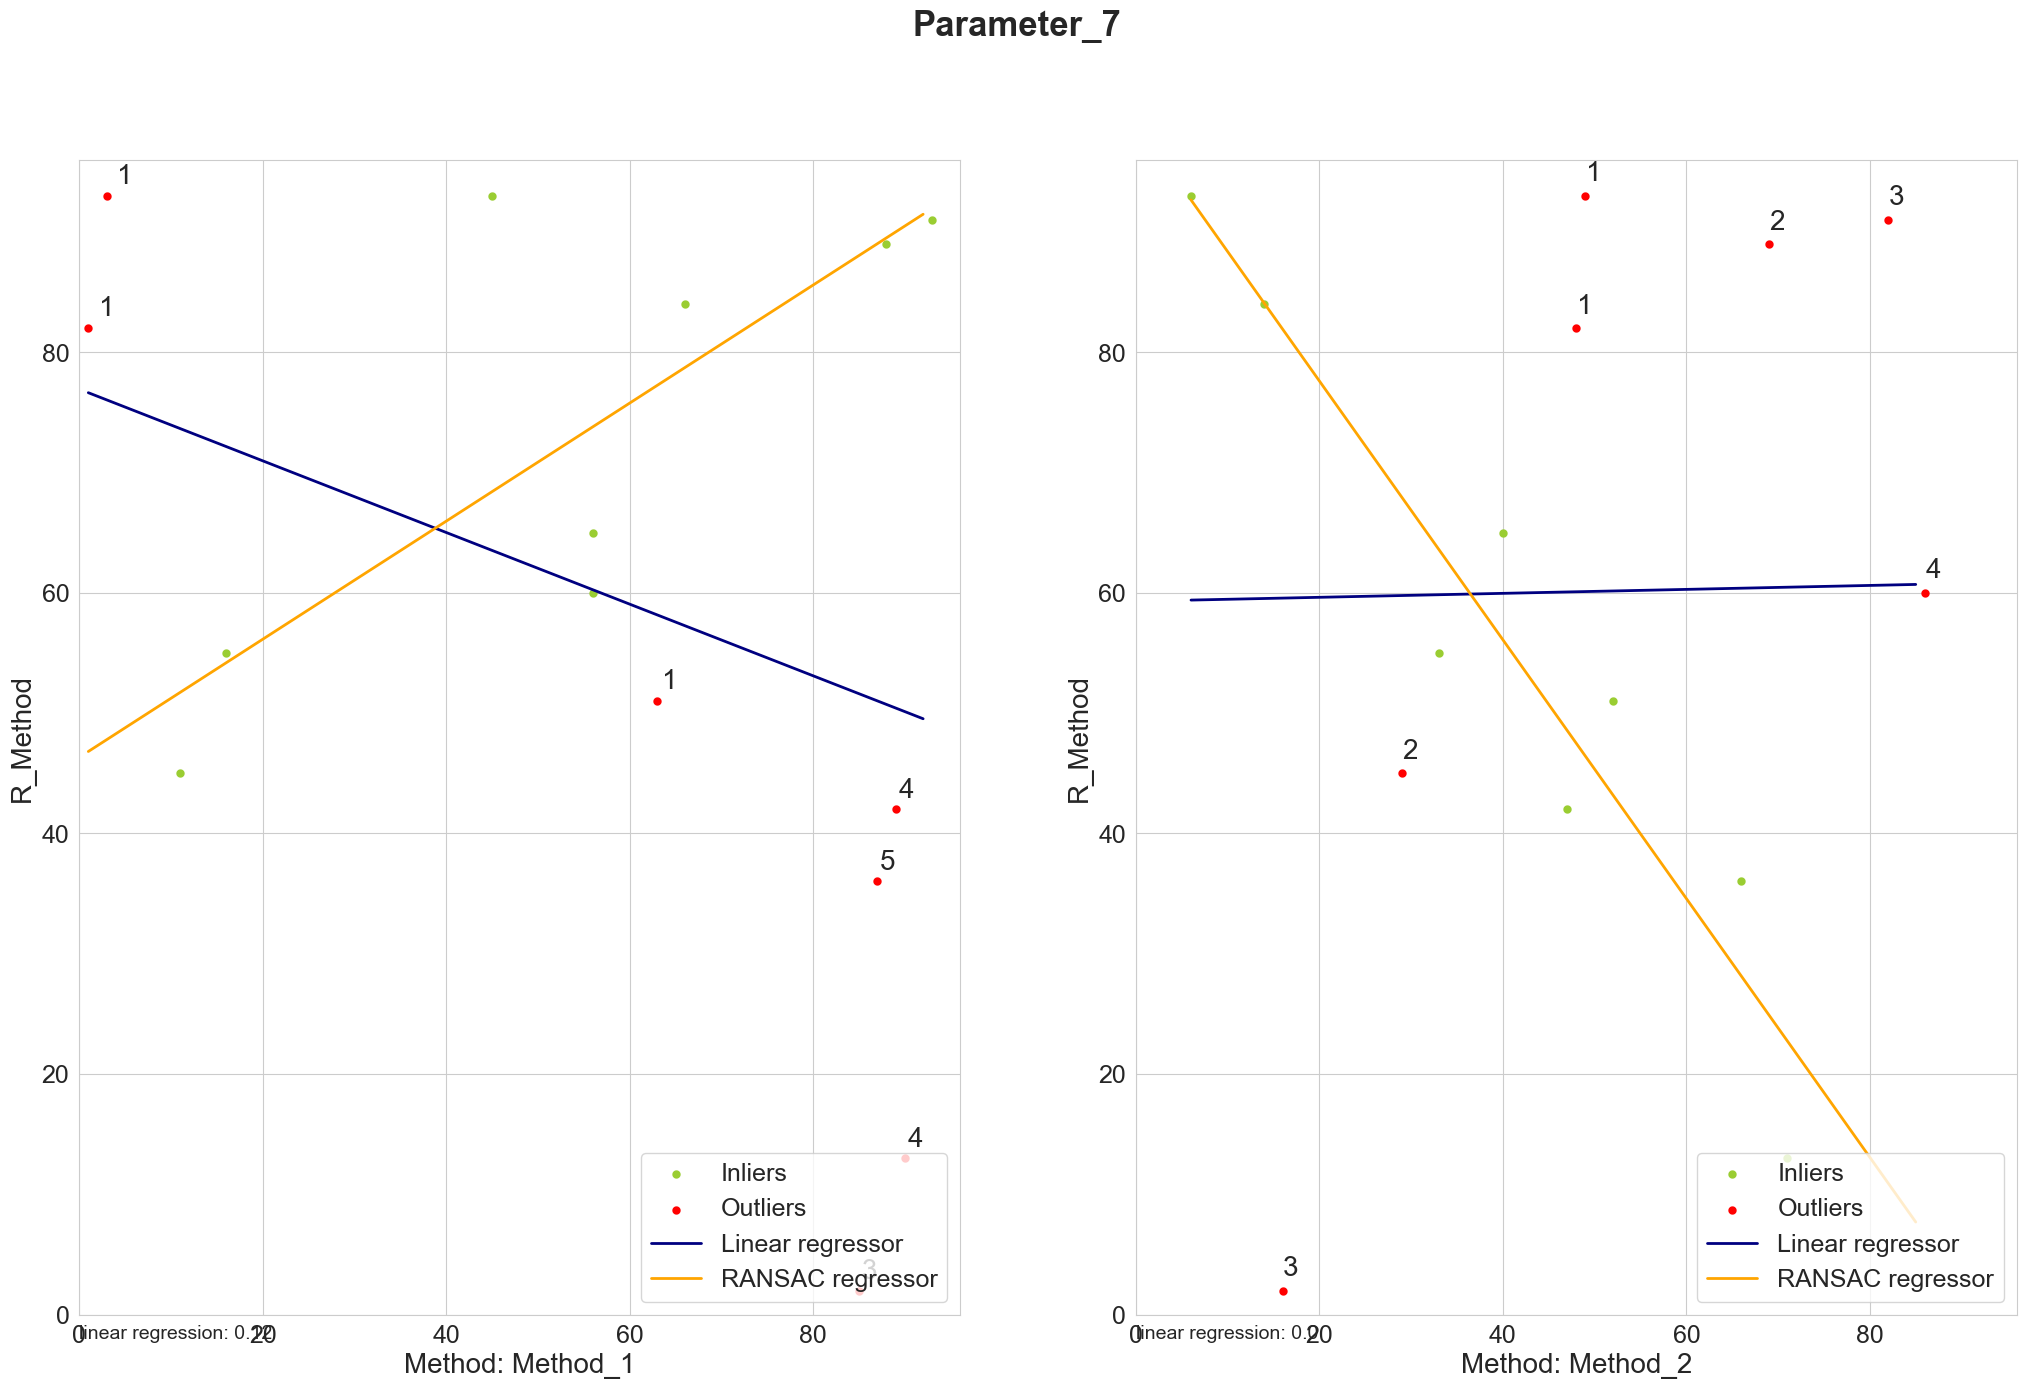

In [33]:
# if all data has the same value and include comp not in classificators value,
# the funtion its not going to show any value or ghaph.
outliers = dsg.outliers_comp_graph(data=df, classificators='Methodology', 
                            categories=list_variables, include_comp='R_Method', 
                            identifier='Sample', legend=True , ransac=True, 
                            save=True, folder=f'{fold}/{data_to_pull}')

### Data Analysis

#### Analisis. Anova

======Accuracy_w_rep - Parameter_1====== 
 

============OLS model report============
                            OLS Regression Results                            
Dep. Variable:            Parameter_1   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                 -0.025
Method:                 Least Squares   F-statistic:                    0.9332
Date:                Mon, 20 Feb 2023   Prob (F-statistic):              0.545
Time:                        14:20:15   Log-Likelihood:                -134.63
No. Observations:                  45   AIC:                             303.3
Df Residuals:                      28   BIC:                             334.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
--------------

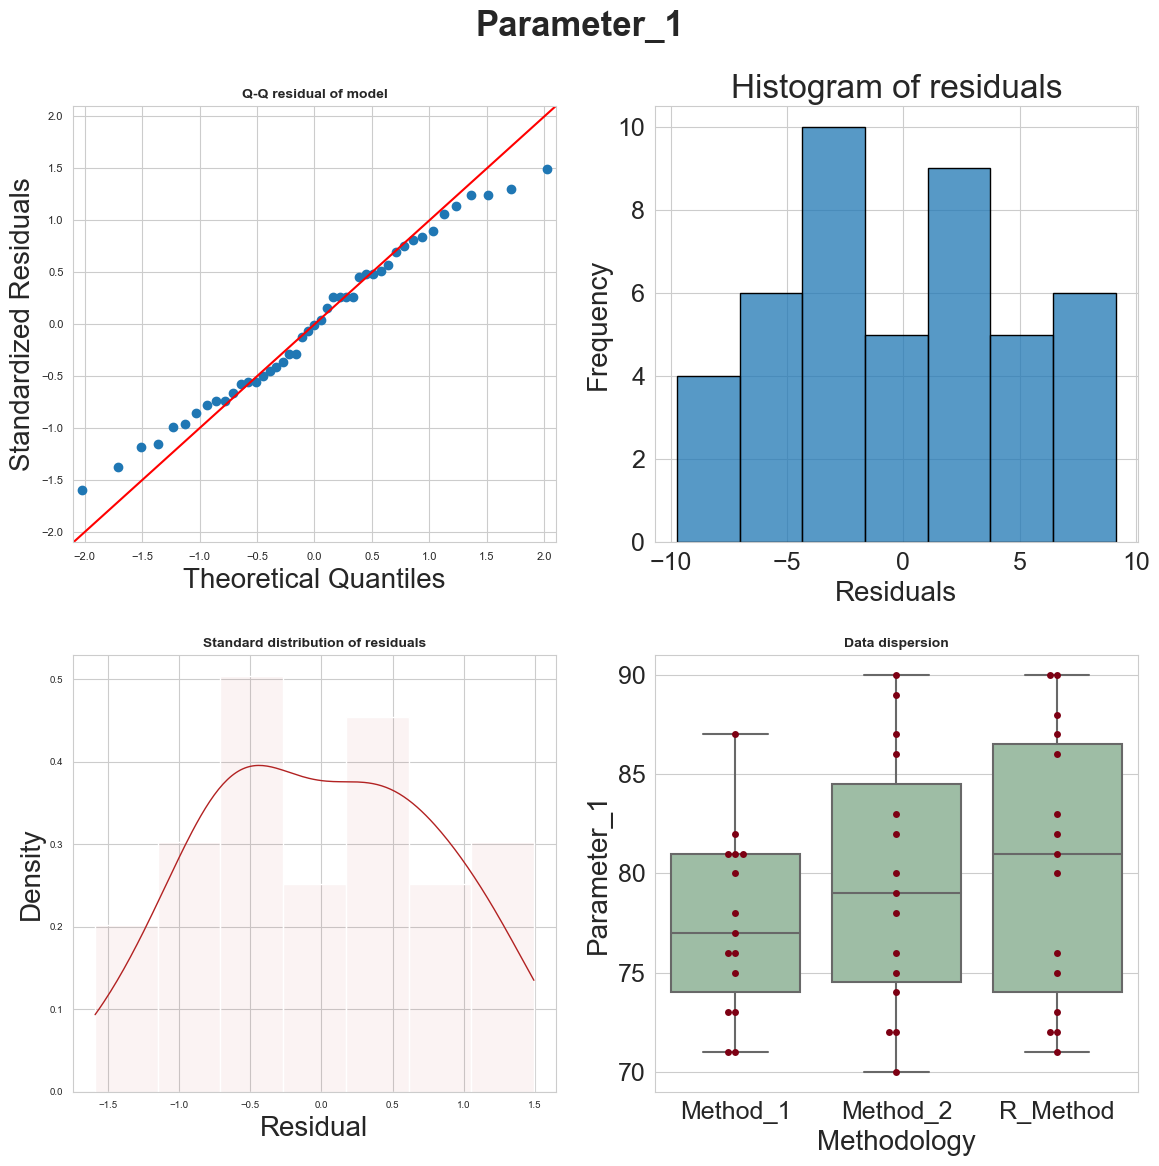

======Accuracy_w_rep - Parameter_2====== 
 

============OLS model report============
                            OLS Regression Results                            
Dep. Variable:            Parameter_2   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     2.062
Date:                Mon, 20 Feb 2023   Prob (F-statistic):             0.0454
Time:                        14:20:17   Log-Likelihood:                -201.24
No. Observations:                  45   AIC:                             436.5
Df Residuals:                      28   BIC:                             467.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
--------------

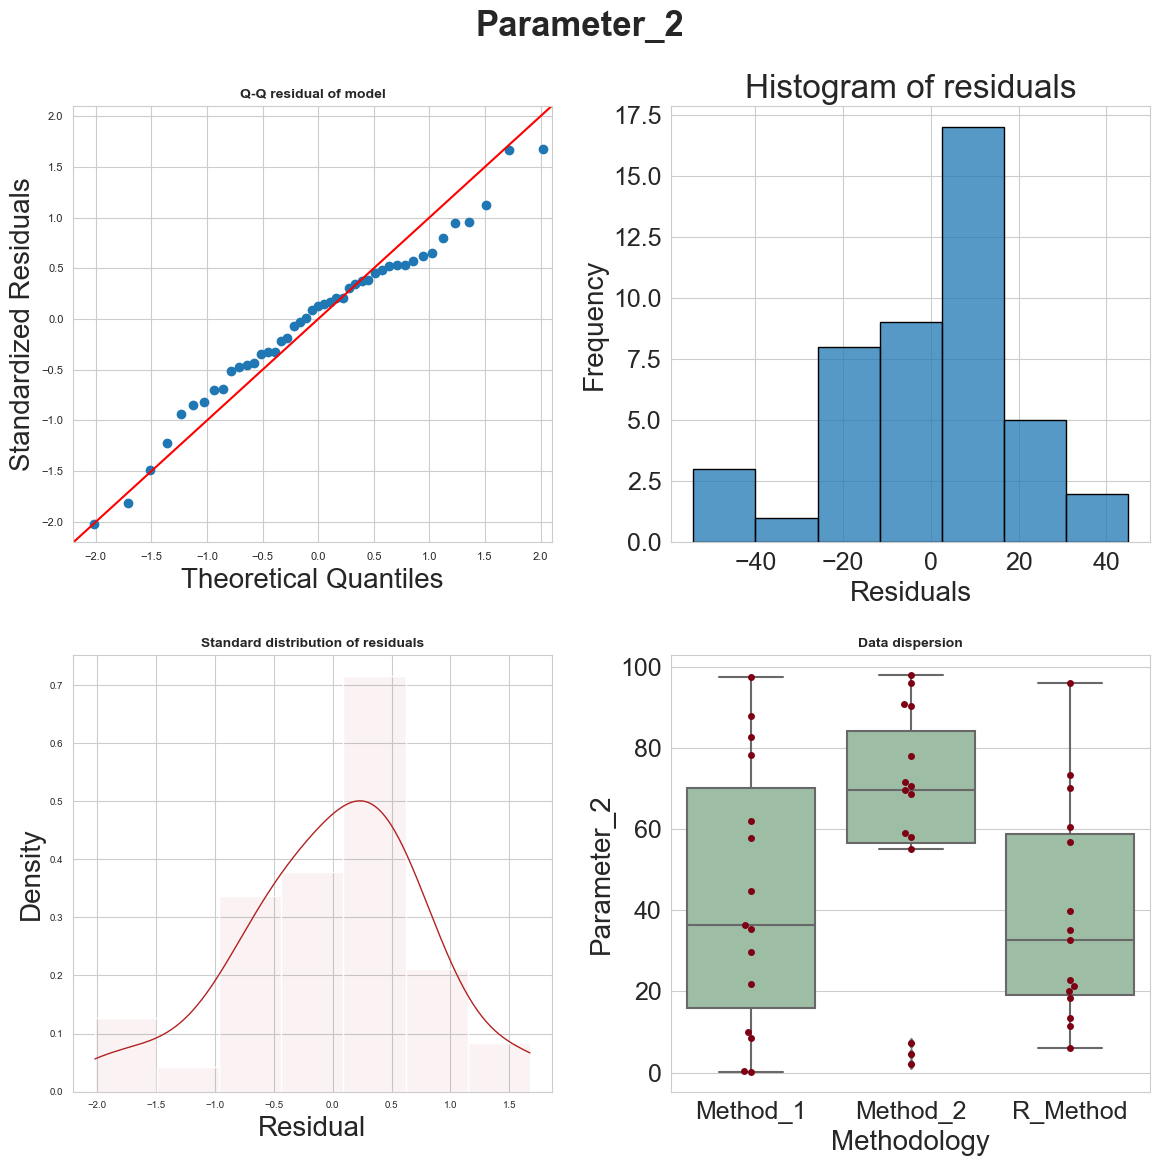

======Accuracy_w_rep - Parameter_3====== 
 

============OLS model report============
                            OLS Regression Results                            
Dep. Variable:            Parameter_3   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                 -0.089
Method:                 Least Squares   F-statistic:                    0.7749
Date:                Mon, 20 Feb 2023   Prob (F-statistic):              0.699
Time:                        14:20:19   Log-Likelihood:                -204.16
No. Observations:                  45   AIC:                             442.3
Df Residuals:                      28   BIC:                             473.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
--------------

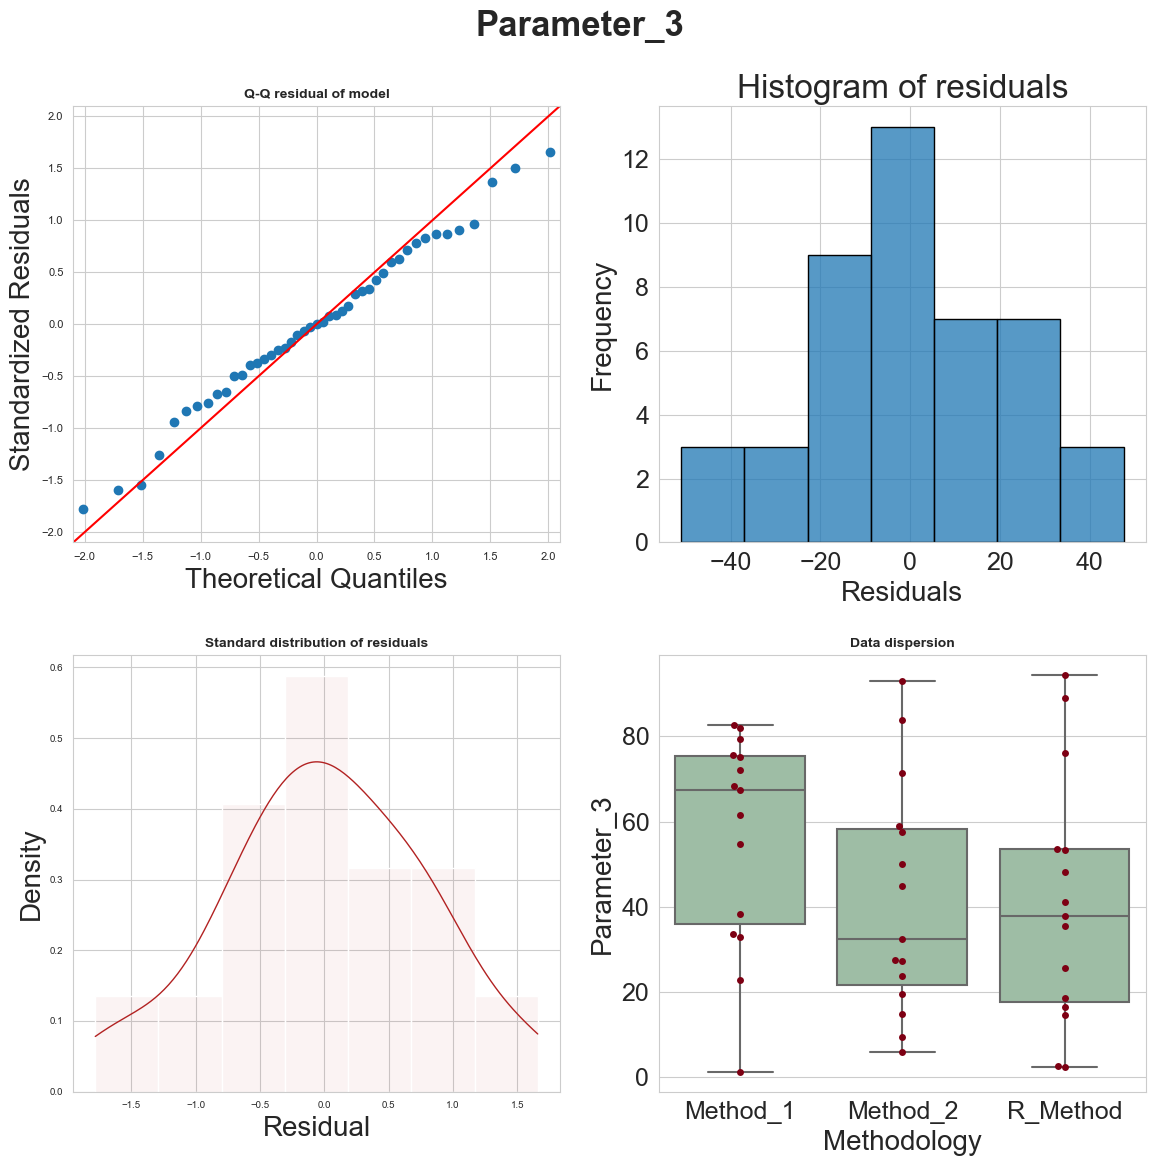

======Accuracy_w_rep - Parameter_4====== 
 

============OLS model report============
                            OLS Regression Results                            
Dep. Variable:            Parameter_4   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     1.073
Date:                Mon, 20 Feb 2023   Prob (F-statistic):              0.422
Time:                        14:20:21   Log-Likelihood:                -199.44
No. Observations:                  45   AIC:                             432.9
Df Residuals:                      28   BIC:                             463.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
--------------

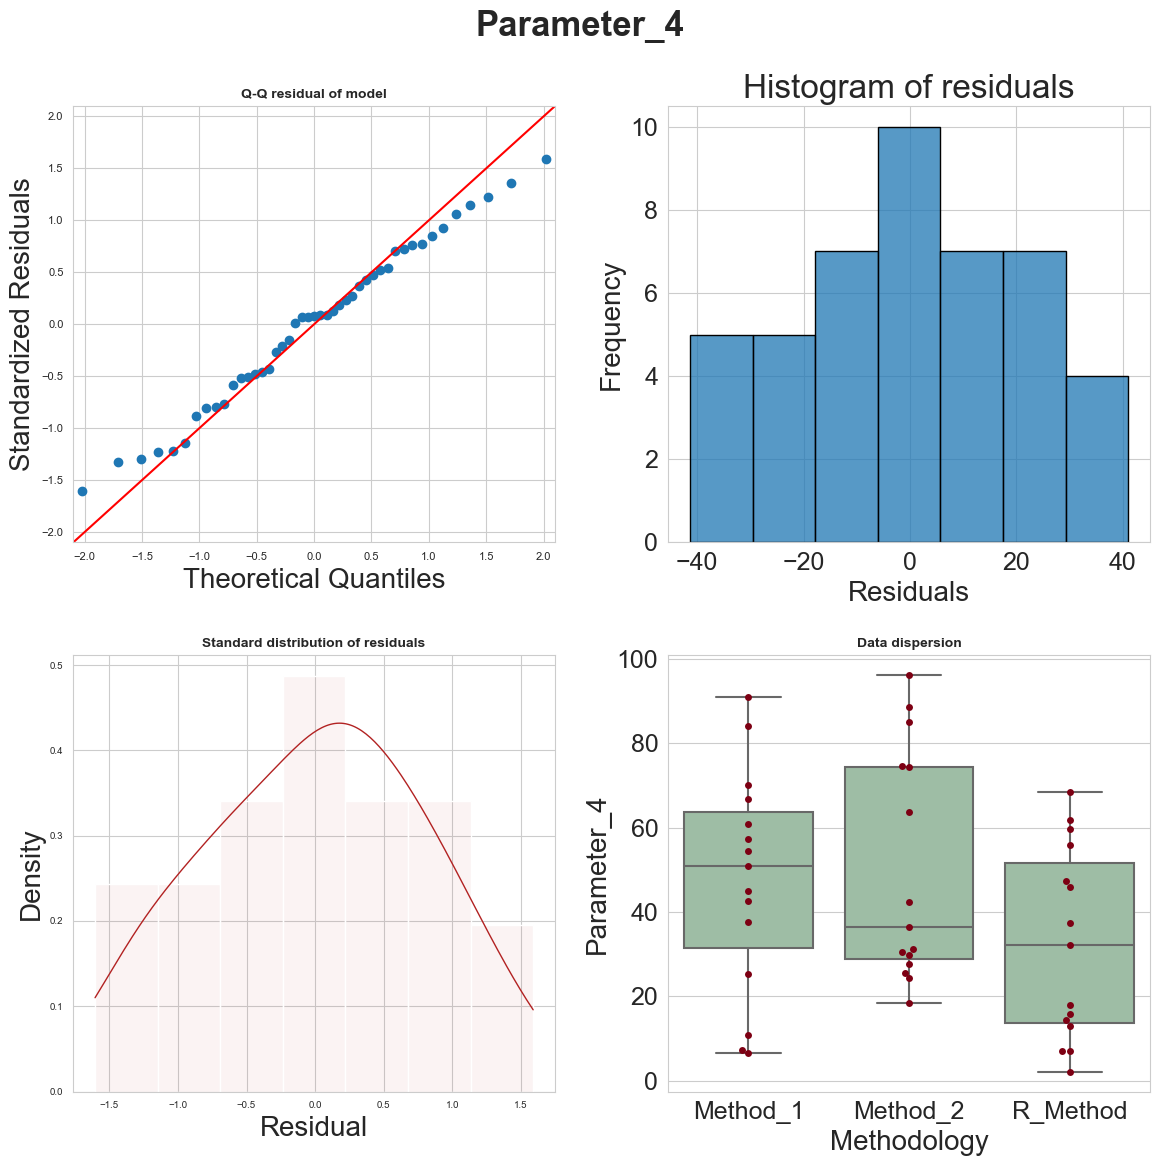

======Accuracy_w_rep - Parameter_5====== 
 

============OLS model report============
                            OLS Regression Results                            
Dep. Variable:            Parameter_5   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     1.942
Date:                Mon, 20 Feb 2023   Prob (F-statistic):             0.0602
Time:                        14:20:23   Log-Likelihood:                -204.64
No. Observations:                  45   AIC:                             443.3
Df Residuals:                      28   BIC:                             474.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
--------------

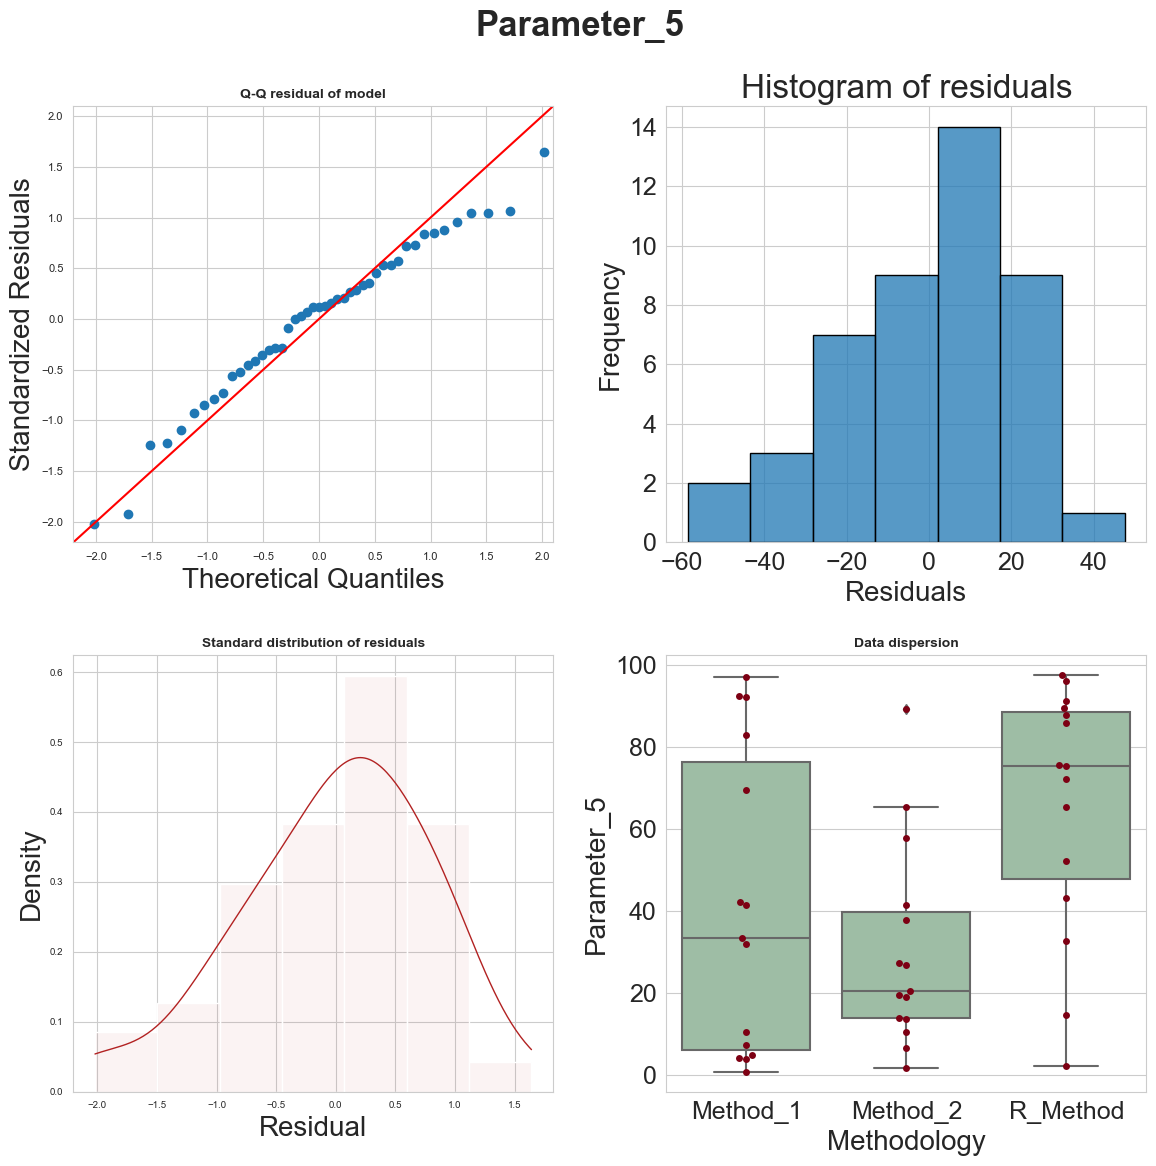

======Accuracy_w_rep - Parameter_6====== 
 

============OLS model report============
                            OLS Regression Results                            
Dep. Variable:            Parameter_6   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     1.069
Date:                Mon, 20 Feb 2023   Prob (F-statistic):              0.425
Time:                        14:20:25   Log-Likelihood:                -206.90
No. Observations:                  45   AIC:                             447.8
Df Residuals:                      28   BIC:                             478.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
--------------

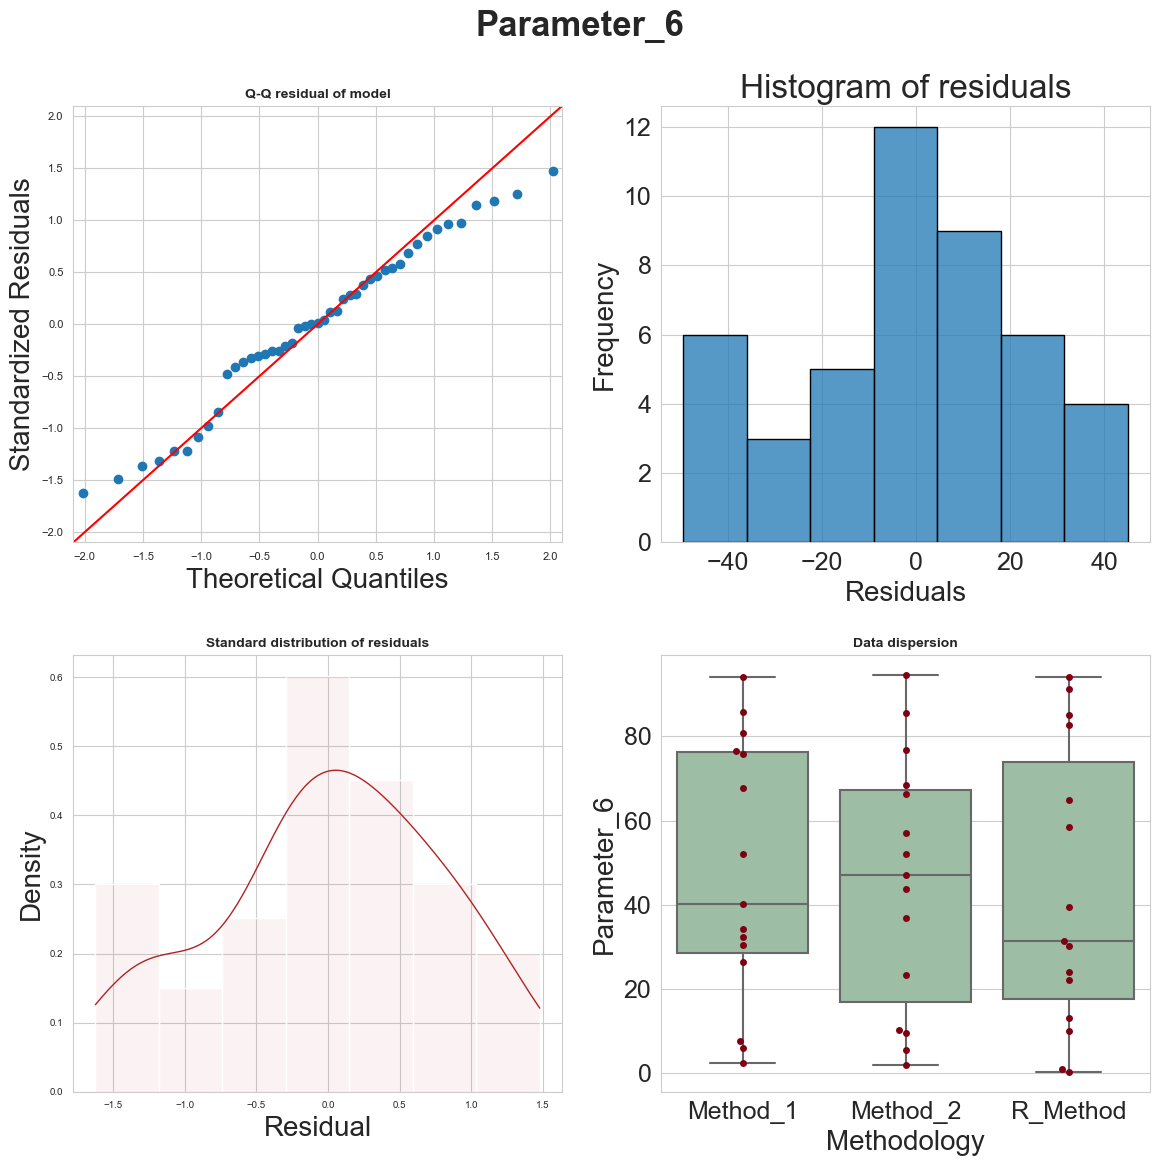

======Accuracy_w_rep - Parameter_7====== 
 

============OLS model report============
                            OLS Regression Results                            
Dep. Variable:            Parameter_7   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     1.133
Date:                Mon, 20 Feb 2023   Prob (F-statistic):              0.374
Time:                        14:20:26   Log-Likelihood:                -204.16
No. Observations:                  45   AIC:                             442.3
Df Residuals:                      28   BIC:                             473.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
--------------

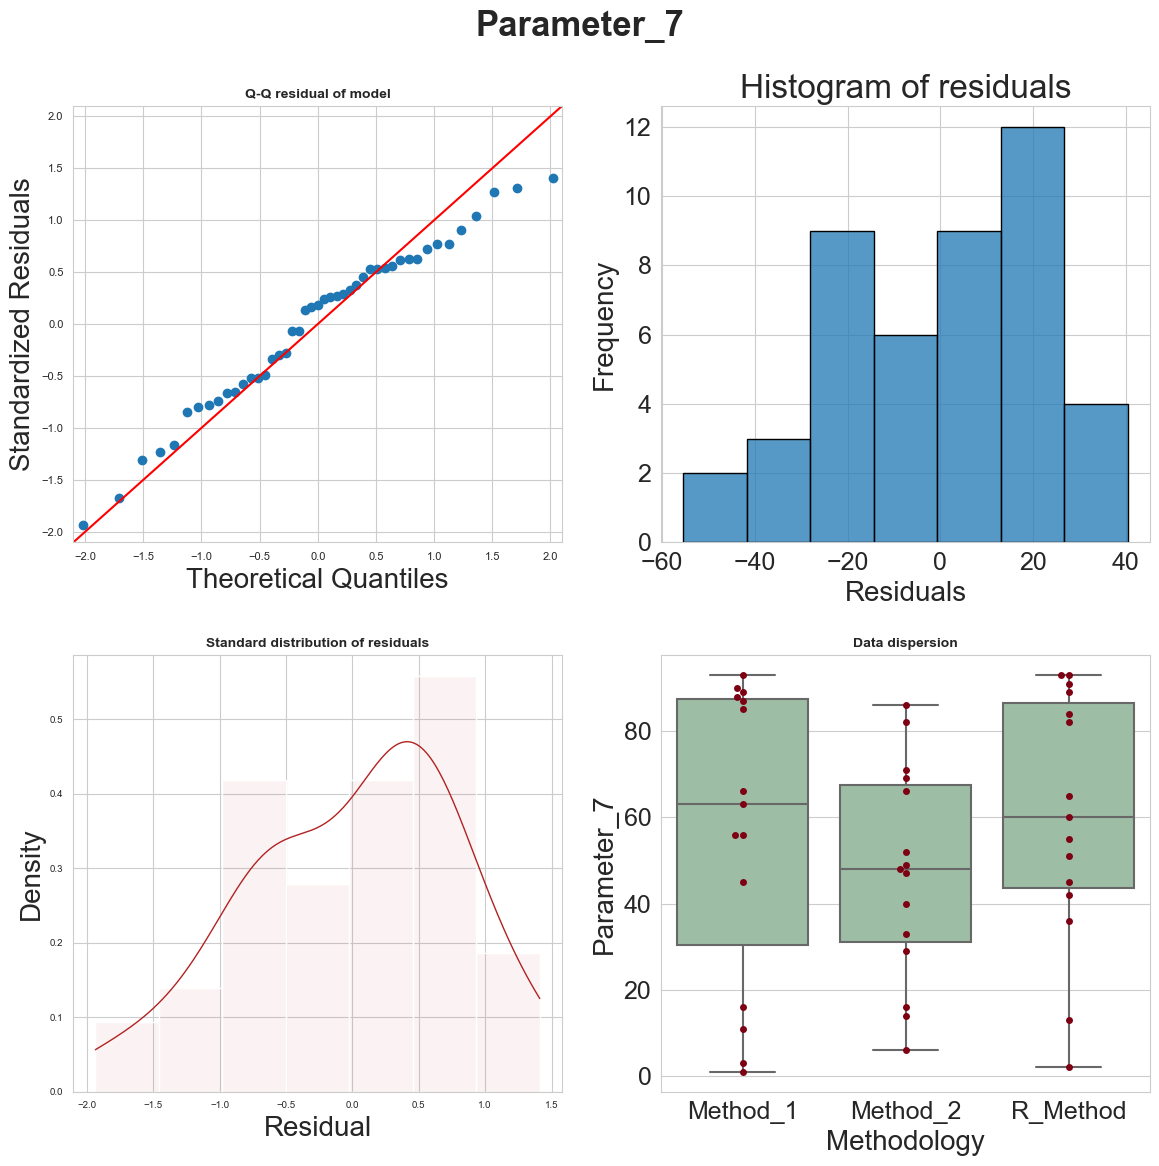

In [21]:
anova.anova_generator(dataframe=df, data_to_pull=data_to_pull, 
                di = ad.variables[data_to_pull], formula = ad.formulas[data_to_pull],  
                Interaccion = False, alpha = alpha, 
                categories = list_variables, ols_r = True, folder = fold) 

#### Analysis. Limits

Requires having at least one methodology that is used as a reference value

In [22]:
# use base or acceptance, In-between and above_tolerance
df_lim = la.limits_clasification(data=df, categories=list_variables, limits_data=df_limits, 
                                eval=data_to_pull, save=False, 
                                name='Threshold_clasification', 
                                folder=f'{fold}/{data_to_pull}')
df_lim

Methodology  id  Sample     Category  Results                     Status
0      R_Method   1       1  Parameter_1     71.0            Below tolerance
1      R_Method   2       1  Parameter_1     90.0                 Above base
2      R_Method   3       1  Parameter_1     81.0  In between base-tolerance
3      R_Method   4       2  Parameter_1     88.0                 Above base
4      R_Method   5       2  Parameter_1     90.0                 Above base
..          ...  ..     ...          ...      ...                        ...
310    Method_2  11       4  Parameter_7     47.0            Above tolerance
311    Method_2  12       4  Parameter_7     71.0            Above tolerance
312    Method_2  13       5  Parameter_7     33.0            Above tolerance
313    Method_2  14       5  Parameter_7     40.0            Above tolerance
314    Method_2  15       5  Parameter_7     66.0            Above tolerance

[315 rows x 6 columns]

In [23]:
df_lim2 = la.limits_desicion(data=df_lim, rv=ad.rvalue_selector(dataframe=df, eval=data_to_pull), 
                                classifier='Methodology', 
                                merger=[ad.merger_dict[data_to_pull], 'Category'])
df_lim2

Methodology  id  Sample_x     Category  Results  \
0      Method_1   1         1  Parameter_1     71.0   
1      Method_1   2         1  Parameter_1     73.0   
2      Method_1   3         1  Parameter_1     81.0   
3      Method_1   4         2  Parameter_1     78.0   
4      Method_1   5         2  Parameter_1     76.0   
..          ...  ..       ...          ...      ...   
205    Method_2  11         4  Parameter_7     47.0   
206    Method_2  12         4  Parameter_7     71.0   
207    Method_2  13         5  Parameter_7     33.0   
208    Method_2  14         5  Parameter_7     40.0   
209    Method_2  15         5  Parameter_7     66.0   

                        Status  Sample_y  Results_rv  \
0              Below tolerance         1        71.0   
1              Below tolerance         1        90.0   
2    In between base-tolerance         1        81.0   
3              Below tolerance         2        88.0   
4              Below tolerance         2        90.0   
..                         ...       ...         ...   
205            Above tolerance         4        42.0   
206            Above tolerance         4        13.0   
207            Above tolerance         5        55.0   
208            Above tolerance         5        65.0   
209            Above tolerance         5        36.0   

                     Status_rv            Accuracy  Differences  
0              Below tolerance       Same decision          0.0  
1                   Above base  Different decision         17.0  
2    In between base-tolerance       Same decision          0.0  
3                   Above base  Different decision         10.0  
4                   Above base  Different decision         14.0  
..                         ...                 ...          ...  
205            Above tolerance       Same decision          5.0  
206            Above tolerance       Same decision         58.0  
207            Above tolerance       Same decision         22.0  
208            Above tolerance       Same decision         25.0  
209            Above tolerance       Same decision         30.0  

[210 rows x 11 columns]

In [24]:
decision = la.status_analysis(data=df_lim2, group_total=['Methodology', 'Category'],
                                group_parcial=['Status_rv', 'Accuracy'], 
                                save=True, name=f'status_analysis-{data_to_pull}', 
                                folder=f'{fold}/{data_to_pull}')
decision

Category                  Status_rv Methodology            Accuracy  \
0    Parameter_1                 Above base    Method_1  Different decision   
1    Parameter_1                 Above base    Method_1       Same decision   
2    Parameter_1            Above tolerance    Method_1  Different decision   
3    Parameter_1            Above tolerance    Method_1       Same decision   
4    Parameter_1            Below tolerance    Method_1  Different decision   
..           ...                        ...         ...                 ...   
135  Parameter_7            Below tolerance    Method_2       Same decision   
136  Parameter_7                 Below_base    Method_2  Different decision   
137  Parameter_7                 Below_base    Method_2       Same decision   
138  Parameter_7  In between base-tolerance    Method_2  Different decision   
139  Parameter_7  In between base-tolerance    Method_2       Same decision   

     Results_parcial  Results_total  Porcetage  
0                  5             15  33.333333  
1                  0             15   0.000000  
2                  0             15   0.000000  
3                  0             15   0.000000  
4                  3             15  20.000000  
..               ...            ...        ...  
135                0             15   0.000000  
136                0             15   0.000000  
137                0             15   0.000000  
138                0             15   0.000000  
139                0             15   0.000000  

[140 rows x 7 columns]

## Dashboard

### Compiler of tables

In [28]:
# If you wanna use a diferent folder for compile. 
# Then change the path in compile result folder variable.
compile_results(folder=fold)

Results compiled. Check compile folder, in your results folder.
